### 1. Introduction

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


### 2. Business Understanding

1. You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

1. The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. **The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.**

1. In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

1. When a person applies for a loan, there are two types of decisions that could be taken by the company:
    1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:
        1. **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
        1. **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
        1. **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
    1. **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

 
### 3. Business Objectives

1. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

1. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

1. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. **Identification of such applicants using EDA is the aim of this case study.**

1. In other words, the company wants to understand **the driving factors (or driver variables) behind loan default**, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

1. To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

 
### 4. Results Expected
1. Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
1. Present the overall approach of the analysis in a presentation: 
    1. Mention the problem statement and the analysis approach briefly 
    1. Explain the results of univariate, bivariate analysis etc. in business terms
    1. Include visualisations and summarise the most important results in the presentation

### 5. Importing libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels
import sklearn


### 6. Reading dataset

In [130]:
# Load the Dataset CSV file
lendingCaseStudyDataFrame = pd.read_csv('loan.csv')

# Load the metadata file
lendingCaseStudyMetadata = pd.read_excel('Data_Dictionary.xlsx', sheet_name='LoanStats')

/var/folders/kl/lhs7mp5s1ml8g684db055ckm0000gq/T/ipykernel_46429/1161814571.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lendingCaseStudyDataFrame = pd.read_csv('loan.csv')


### 7. DATA CLEANING ACTIONS


#### 7.1 FIXING ROWS AND COLUMNS


##### 7.1.1 Fixing columns
1. Some of the columns are unncessary as it does not impact the results i.e. loan descisions. It doesn't provide any variability or meaningful information that could contribute to analysis. Keeping such columns could introduce noise or redundancy, so dropping them makes your dataset cleaner and more efficient to work with.
1. Some of the columns have mixed types as described by the error when read by pandas.



In [131]:
# Listing types and unique values of each column
pd.reset_option('display.max_seq_items')
print("Columns and column types in the CSV file:")
for columnName in lendingCaseStudyDataFrame.columns:
    columnType = lendingCaseStudyDataFrame[columnName].apply(type).unique()
    uniqueColumnValues = lendingCaseStudyDataFrame[columnName].unique()
    print(f"The data type of {columnName} is: {columnType}")
    print(f"The number of unique values of {columnName} is: {uniqueColumnValues.size}")

    # List all column values if size < 10; To investigate if the column does not have any value of need.
    if (uniqueColumnValues.size < 10):
        print(f"The unique values of {columnName} is: {uniqueColumnValues}")
    print('\n')


Columns and column types in the CSV file:
The data type of id is: [<class 'int'>]
The number of unique values of id is: 39717


The data type of member_id is: [<class 'int'>]
The number of unique values of member_id is: 39717


The data type of loan_amnt is: [<class 'int'>]
The number of unique values of loan_amnt is: 885


The data type of funded_amnt is: [<class 'int'>]
The number of unique values of funded_amnt is: 1041


The data type of funded_amnt_inv is: [<class 'float'>]
The number of unique values of funded_amnt_inv is: 8205


The data type of term is: [<class 'str'>]
The number of unique values of term is: 2
The unique values of term is: [' 36 months' ' 60 months']


The data type of int_rate is: [<class 'str'>]
The number of unique values of int_rate is: 371


The data type of installment is: [<class 'float'>]
The number of unique values of installment is: 15383


The data type of grade is: [<class 'str'>]
The number of unique values of grade is: 7
The unique values of grade

In [132]:
# Dropping 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'open_acc_6m',
# 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
# 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 
# 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
# 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 
# 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
# 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
# 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'tot_cur_bal'
# as all values are 'nan'
columnsListWithAllValuesNan = ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'open_acc_6m',
'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 
'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 
'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 
'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'tot_cur_bal']

# Dropping 'policy_code' column as all values are 1.
# Dropping 'application_type' column as all values are individual
# Dropping 'acc_now_delinq', 'delinq_amnt', column as all values are 0
# Dropping 'pymnt_plan' column as all values are 'n'.
# Dropping 'initial_list_status' as all values are 'f'.
columnsListWithAllSameValues = ['policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'initial_list_status']

# Dropping 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens' as all values are either 'nan or 0'
columnsListWithEitherNanOrOs = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'delinq_amnt']

# Dropping irrelvant columns not useful for analysis
columnsWithNoRelevancyForResults = ['url']

lendingCaseStudyDataFrameCleaned = lendingCaseStudyDataFrame.drop(columns=columnsListWithAllValuesNan + columnsListWithAllSameValues + columnsListWithEitherNanOrOs
                                                                 + columnsWithNoRelevancyForResults)

lendingCaseStudyDataFrameCleaned.head()




id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0               0.00        0.00                    0.00       Jan-15   
1               0.00      117.08                    1.11       Apr-13   
2               0.00        0.00                    0.00       Jun-14   
3              16.97        0.00                    0.00       Jan-15   
4               0.00        0.00                    0.00       May-16   

  last_pymnt_amnt next_pymnt_d last_credit_pull_d pub_rec_bankruptcies  
0          171.62          NaN             May-16                  0.0  
1          119.66          NaN             Sep-13                  0.0  
2          649.91          NaN             May-16                  0.0  
3          357.48          NaN             Apr-16                  0.0  
4           67.79       Jun-16             May-16                  0.0  

[5 rows x 47 columns]

In [133]:
# Printing the List all column names individually and its type again after removal of non-important and empty columns.
print("Info and types of datasets after dropping unncessary columns: ")
print(lendingCaseStudyDataFrameCleaned.info())
print("\n")
print("Columns and column types in the Cleaned CSV file:")
for columnName in lendingCaseStudyDataFrameCleaned.columns:
    columnType = lendingCaseStudyDataFrameCleaned[columnName].apply(type).unique()
    uniqueColumnValues = lendingCaseStudyDataFrameCleaned[columnName].unique()
    print(f"The data type of {columnName} is: {columnType}")
    print(f"The number of unique values of {columnName} is: {uniqueColumnValues.size}")

    # List all column values if size < 10; To investigate if the column does not have any value of need.
    if (uniqueColumnValues.size < 10):
        print(f"The unique values of {columnName} is: {uniqueColumnValues}")
    print('\n')


Info and types of datasets after dropping unncessary columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc   

In [134]:
# Fixing data types of each column.

from datetime import datetime
from enum import Enum
import math

# Define conversion functions
def toString(value):
    return str(value)

def toFloat(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return the None.
    elif isinstance(value, str) or isinstance(value, int) or isinstance(value, float):
        return float(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

def toInt(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return None.
    elif isinstance(value, str) or isinstance(value, int) or isinstance(value, float):
        return int(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

    
def termToInt(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return None.
    elif isinstance(value, str):
        value = value.rstrip(' months')
        return int(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

def interestToFloat(value):
    if isinstance(value, float) and math.isnan(value):
        return None  # Return None.
    elif isinstance(value, str):
        value = value.strip()  # Remove any leading/trailing spaces
        if value.endswith('%'):
            value = value.rstrip('%')
        try:
            return float(value) / 100.0
        except ValueError:
            raise ValueError(f"Cannot convert '{value}' to a float.")
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")


def toDatetimeParsingMonthYear(dateTimeStr) -> datetime:
    if dateTimeStr is None or (isinstance(dateTimeStr, float) and math.isnan(dateTimeStr)):
        return None  # return None.
    if not isinstance(dateTimeStr, str):
        raise TypeError(f"Expected a string for dateTimeStr, but got {type(dateTimeStr).__name__}")
    try:
        return datetime.strptime(dateTimeStr, "%b-%y")
    except ValueError as e:
        raise ValueError(f"Error parsing date string '{dateTimeStr}': {e}")

# Define a conversion map (like a case switch)
conversionMap = {
    'id': toString,    # Convert 'id' column to string
    'member_id': toString, # Convert 'member_id' column to string
    'loan_amnt': toFloat, # Convert 'loan_amnt' column to float.
    'funded_amnt': toFloat,  # Convert 'funded_amnt' column to float.
    'funded_amnt_inv' : toFloat, # Convert 'funded_amnt_inv' column to float.
    'term' : termToInt, # Convert 'term' column to int to enable calculations.
    'int_rate' : interestToFloat, # Convert 'int_rate' column to float to enable calculations.
    'installment' : toFloat, # Convert 'installment' column to float to enable calculations though it already is.
    'grade' : toString, # Convert 'grade' column to string though it already is.
    'sub_grade' : toString, # Convert 'sub_grade' column to string though it already is.
    'emp_title' : toString, # Convert 'emp_title' column to string though it already is.
    'emp_length' : toString, # Convert 'emp_length' column to string though it already is.
    'home_ownership': toString, # Convert 'home_ownership' column to string though it already is.
    'annual_inc' : toFloat, # Convert 'annual_inc' column to float to enable calculations though it already is.
    'verification_status' : toString, # Convert 'verification_status' column to string though it already is.
    'issue_d' : toDatetimeParsingMonthYear, # Convert 'issue_d' column to DateTimeStamp type.
    'loan_status' : toString, # Convert 'loan_status' column to string.
    'url' : toString, # Convert 'url' column to string though it already is.
    'desc' : toString, # Convert 'desc' column to string though it already is.
    'purpose' : toString, # Convert 'purpose' column to string though it already is.
    'title' : toString, # Convert 'title' column to string.
    'zip_code' : toString, # Convert 'zip_code' column to string though it already is.
    'addr_state' : toString, # Convert 'addr_state' column to string though it already is.
    'dti' : toFloat, # Convert 'dti' column to float though it already is.
    'delinq_2yrs' : toInt, # Convert 'delinq_2yrs' column to int though it already is.
    'earliest_cr_line' : toDatetimeParsingMonthYear, # Convert 'earliest_cr_line' column to DateTimeStamp type.
    'inq_last_6mths' : toInt, # Convert 'inq_last_6mths' column to int though it already is.
    'mths_since_last_delinq' : toInt, # Convert 'mths_since_last_delinq' column to int.
    'mths_since_last_record' : toInt, # Convert 'mths_since_last_record' column to int.
    'open_acc' : toInt, # Convert 'open_acc' column to int.
    'pub_rec' : toInt, # Convert 'pub_rec' column to int.
    'revol_bal' : toFloat, # Convert 'revol_bal' column to float.
    'revol_util' : interestToFloat, # Convert 'revol_util' column to float.
    'total_acc' : toInt, # Convert 'total_acc' column to int though it already is.
    'out_prncp' : toFloat, # Convert 'out_prncp' column to float though it already is.
    'out_prncp_inv' : toFloat, # Convert 'out_prncp_inv' column to float though it already is.
    'total_pymnt' : toFloat, # Convert 'total_pymnt' column to float though it already is.
    'total_pymnt_inv' : toFloat, # Convert 'total_pymnt_inv' column to float though it already is.
    'total_rec_prncp' : toFloat, # Convert 'total_rec_prncp' column to float though it already is.
    'total_rec_int' : toFloat, # Convert 'total_rec_int' column to float though it already is.
    'total_rec_late_fee' : toFloat, # Convert 'total_rec_late_fee' column to float though it already is.
    'recoveries' : toFloat, # Convert 'recoveries' column to float though it already is.
    'collection_recovery_fee' : toFloat, # Convert 'collection_recovery_fee' column to float though it already is.
    'last_pymnt_d' : toDatetimeParsingMonthYear, # Convert 'last_pymnt_d' column to DateTimeStamp type.
    'last_pymnt_amnt' : toFloat, # Convert 'last_pymnt_amnt' column to float though it already is.
    'next_pymnt_d' : toDatetimeParsingMonthYear, # Convert 'next_pymnt_d' column to DateTimeStamp type.
    'last_credit_pull_d' : toDatetimeParsingMonthYear, # Convert 'last_credit_pull_d' column to DateTimeStamp type.
    'pub_rec_bankruptcies' : toInt, # Convert 'pub_rec_bankruptcies' column to int type.
}

lendingCaseStudyDataFrameCleanedWithTypesCorrected = pd.DataFrame()
for columnName in lendingCaseStudyDataFrameCleaned.columns:
    lendingCaseStudyDataFrameCleanedWithTypesCorrected[columnName] = lendingCaseStudyDataFrameCleaned[columnName].apply(conversionMap[columnName])

In [135]:
# Validate that the values in columns is as expected: 
# HomeOwnership:
#     "RENT"
#     "OWN"
#     "MORTGAGE"
#     "NONE"
#     "OTHER"
home_ownership_valid_values = ['RENT', 'OWN', 'MORTGAGE', 'NONE', 'OTHER']
home_ownership_invalid_rows = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
    ~lendingCaseStudyDataFrameCleanedWithTypesCorrected['home_ownership'].isin(home_ownership_valid_values)]
# VerificationStatus:
#     "Verified"
#     "Source Verified"
#     "Not Verified"
verification_status_valid_values = ['Verified', 'Source Verified', 'Not Verified']
verification_status_invalid_rows = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
    ~lendingCaseStudyDataFrameCleanedWithTypesCorrected['verification_status'].isin(verification_status_valid_values)]
    
# LoanStatus:
#     "Current"
#     'Fully Paid'
#     'Charged Off'
loan_status_valid_values = ['Current', 'Fully Paid', 'Charged Off']
loan_status_invalid_rows = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
    ~lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_status'].isin(loan_status_valid_values)]

print(f'Invalid rows with invalid homeOwnership, verificationStatus and loanStatus are: {home_ownership_invalid_rows.size}, {verification_status_invalid_rows.size}, {loan_status_invalid_rows.size} respectively')


Invalid rows with invalid homeOwnership, verificationStatus and loanStatus are: 0, 0, 0 respectively


In [136]:
# Printing the List all column names individually and its type again after correcting the type of columns.

print("Info and types of datasets after correcting the types of columns: ")
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected.info())
print("\n")
print("Columns and column types in the Type corrected CSV file:")
for columnName in lendingCaseStudyDataFrameCleanedWithTypesCorrected.columns:
    columnType = lendingCaseStudyDataFrameCleanedWithTypesCorrected[columnName].apply(type).unique()
    uniqueColumnValues = lendingCaseStudyDataFrameCleanedWithTypesCorrected[columnName].unique()
    print(f"The data type of {columnName} is: {columnType}")
    print(f"The number of unique values of {columnName} is: {uniqueColumnValues.size}")

    # List all column values if size < 10; To investigate if the column does not have any value of need.
    if (uniqueColumnValues.size < 10):
        print(f"The unique values of {columnName} is: {uniqueColumnValues}")
    print('\n')


Info and types of datasets after correcting the types of columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  object        
 1   member_id                39717 non-null  object        
 2   loan_amnt                39717 non-null  float64       
 3   funded_amnt              39717 non-null  float64       
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  int64         
 6   int_rate                 39717 non-null  float64       
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                39717 non-null  object        
 11  emp_length               3

In [137]:
# Fixing missing values whereever required.
lendingCaseStudyDataFrameCleanedWithTypesCorrected.isnull().sum()


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal 

In [138]:
# Checking if data does not have any duplication row wise
is_unique_on_id = lendingCaseStudyDataFrameCleanedWithTypesCorrected['id'].is_unique
print(f'Dataset is unique on the id field: {is_unique_on_id}')

Dataset is unique on the id field: True


In [139]:
# Columns with Null Values:
# revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# last_pymnt_d : Last month payment was received
# next_pymnt_d: Next scheduled payment date
# last_credit_pull_d: The most recent month LC pulled credit for this loan
# pub_rec_bankruptcies: Number of public record bankruptcies 
print(f'shape of lendingCaseStudyDataFrameCleanedWithTypesCorrected is {lendingCaseStudyDataFrameCleanedWithTypesCorrected.shape}')
print()
# Following are actions need to be taken on the dataset assuming the following:
# 1. Revolving Line Utilization Rate (revol_util): The revol_util value is null because the borrower does not have a credit card. Given that only 50 out of 39,717 records have null values, it may be reasonable to exclude these records from the analysis.
print('----------------revol_util is null for following:-------------')
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'].isnull()][['revol_util', 'id', 'loan_status']])
print()
# 2. last_pymnt_d is null: The last_pymnt_d value is null because the borrower has never made a payment to LendingClub. This assumption can be validated by examining the loan status of records where last_pymnt_d is null. Therefore, it is acceptable to retain these null values in the dataset.
print('----------------last_pymnt_d: loanStaus-------------')
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['last_pymnt_d'].isnull()]['loan_status'].unique())
print()
# 3. next_pymnt_d: The next_pymnt_d value is null because the loan has been terminated, meaning the loan status is either charged off or fully paid. Therefore, it is acceptable to retain these null values in the dataset.
print('----------------next_pymnt_d: loanStaus-------------')
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['next_pymnt_d'].isnull()]['loan_status'].unique())
print()
# 4. last_credit_pull_d: The last_credit_pull_d value is null because LendingClub never pulled the borrower's credit history. Given that there are only 2 such records, it may be reasonable to remove these rows from the dataset.
print('----------------last_credit_pull_d is null for following:-------------')
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['last_credit_pull_d'].isnull()])
print()
# 5. pub_rec_bankruptcies is null The pub_rec_bankruptcies value is null due to the unavailability of data from government sources. Since only 697 out of 39,717 records have null values, it may be reasonable to exclude these rows from the analysis.
# 6. missing values in 'months_since_last_delinquency', 'mths_since_last_record' with a large number, based on the assumption that missing data indicates no delinquency or public record has occurred.


shape of lendingCaseStudyDataFrameCleanedWithTypesCorrected is (39717, 47)

----------------revol_util is null for following:-------------
       revol_util       id  loan_status
3565          NaN  1016416   Fully Paid
4714          NaN   997734  Charged Off
4943          NaN   790093   Fully Paid
11282         NaN   817195   Fully Paid
12042         NaN   804073  Charged Off
12147         NaN   802201   Fully Paid
13891         NaN   772732  Charged Off
17985         NaN   706991  Charged Off
18184         NaN   702880   Fully Paid
21604         NaN   641703   Fully Paid
24663         NaN   597450   Fully Paid
24738         NaN   596426   Fully Paid
24984         NaN   592219   Fully Paid
25261         NaN   587749  Charged Off
25977         NaN   576386  Charged Off
26649         NaN   565967   Fully Paid
26724         NaN   564565   Fully Paid
26813         NaN   562958  Charged Off
28170         NaN   542443   Fully Paid
28685         NaN   534313  Charged Off
28938         NaN   5

##### 7.1.2 Fixing Rows
1. Before we fix rows, let's look at the definition of each of the column.
```
loan_amnt --> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt --> The total amount committed to that loan at that point in time.
funded_amnt_inv --> The total amount committed by investors for that loan at that point in time.
term --> The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate --> Interest Rate on the loan
installment --> The monthly payment owed by the borrower if the loan originates.
issue_d --> The month which the loan was funded
delinq_2yrs --> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the        past 2 years
earliest_cr_line --> The month the borrower's earliest reported credit line was opened
mths_since_last_delinq --> The number of months since the borrower's last delinquency.
mths_since_last_record --> The number of months since the last public record.
open_acc --> The number of open credit lines in the borrower's credit file.
pub_rec --> Number of derogatory public records
revol_bal --> Total credit revolving balance
revol_util --> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc --> The total number of credit lines currently in the borrower's credit file
out_prncp	--> Remaining outstanding principal for total amount funded
out_prncp_inv	--> Remaining outstanding principal for portion of total amount funded by investors
total_pymnt --> Payments received to date for total amount funded
total_pymnt_inv --> Payments received to date for portion of total amount funded by investors
total_rec_prncp --> Principal received to date
total_rec_int	--> Interest received to date
total_rec_late_fee --> Late fees received to date
recoveries --> post charge off gross recovery (only for charged off loans)
collection_recovery_fee --> post charge off collection fee; refers to the costs incurred by a lender or creditor       when attempting to recover a debt after it has been charged off. These fees are typically paid to third-party       collection agencies, legal firms, or other entities involved in the collection process
last_pymnt_d --> Last month payment was received
next_pymnt_d --> Next scheduled payment date
last_pymnt_amnt --> Last total payment amount received
revol_util --> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
last_credit_pull_d --> The most recent month LC pulled credit for this loan
pub_rec_bankruptcies --> Number of public record bankruptcies 
```
2. Removal of rows as described above:
   1. Revolving Line Utilization Rate (revol_util): The revol_util value is null because the borrower does not have a credit card. Given that only 50 out of 39,717 records have null values, it may be reasonable to exclude these records from the analysis.
   2. last_credit_pull_d: The last_credit_pull_d value is null because LendingClub never pulled the borrower's credit history. Given that there are only 2 such records, it may be reasonable to remove these rows from the dataset.
   3. pub_rec_bankruptcies is null The pub_rec_bankruptcies value is null due to the unavailability of data from government sources. Since only 697 out of 39,717 records have null values, it may be reasonable to exclude these rows from the analysis.
2. Ensure that basic validations amongst different columns hold true for all rows. This includes following:
   1. Loan Amount Consistency: loan_amnt > funded_amnt and  loan_amnt > funded_amnt_inv
   2. Validate the term is either 36 or 60 months
   3. Validate that last_payment_date < next_payment_date
   4. Validate that earliest_cr_line <= issue_d
   5. Validate that open_acc <= total_acc
   6. Validate that total_rec_pricpal <= loan_amnt
   7. Validate that installment amount matches from the form
   8. Validate that pub_rec > pub_rec_bankruptcies
   9. Total Payments Consistency with interest and prinicipal:
      1. total_pymnt + total_pymnt_inv == total_rec_prncp + total_rec_int + total_rec_late_fee + recoveries
      2. total_rec_prncp = out_prncp + out_prncp_inv
   10. Loan status, HomeOwnership coolumn values are already verified via the enum types.


In [140]:
# Drop rows where the 'revol_util', 'last_credit_pull_d', and 'pub_rec_bankruptcies' column is null
lendingCaseStudyDataFrameCleanedWithTypesCorrected = lendingCaseStudyDataFrameCleanedWithTypesCorrected.dropna(subset=['revol_util', 'last_credit_pull_d', 'pub_rec_bankruptcies'])

# Display the resulting DataFrame
print(f"Number of records after dropping rows with null 'revol_util', 'last_credit_pull_d' and 'pub_rec_bankruptcies': {len(lendingCaseStudyDataFrameCleanedWithTypesCorrected)}")
print(f"Number of records with null values against each column:")
lendingCaseStudyDataFrameCleanedWithTypesCorrected.isnull().sum()


Number of records after dropping rows with null 'revol_util', 'last_credit_pull_d' and 'pub_rec_bankruptcies': 38969
Number of records with null values against each column:


id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25638
mths_since_last_record     36875
open_acc                       0
pub_rec                        0
revol_bal 

In [141]:
# validations amongst different columns for all rows

# 1. Validate Loan Amount Consistency
loan_amount_inconsistency1 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'] < lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'] ]
loan_amount_inconsistency2 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'] < lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'] ]
print(f"1.1 Number of inconsistent rows for loan amount vs funded_amnt: {len(loan_amount_inconsistency1)}")
print(f"1.2 Number of inconsistent rows for loan amount vs funded_amnt_inv: {len(loan_amount_inconsistency2)}")
print()
# 2. Validate the term is either 36 or 60 months
term_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[(lendingCaseStudyDataFrameCleanedWithTypesCorrected['term'] != 36) & (lendingCaseStudyDataFrameCleanedWithTypesCorrected['term']!=60)]
print(f"2. Number of inconsistent rows for term_inconsistency: {len(term_inconsistency)}")
print()
# 3. Validate that last_payment_date <= next_payment_date
payment_d_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['last_pymnt_d'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['next_pymnt_d']]
print(f"3. Number of inconsistent rows for payment_d_inconsistency: {len(payment_d_inconsistency)}")
print()
# 4. Validate that earliest_cr_line <= issue_d
earliest_cr_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['earliest_cr_line'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['issue_d']]
print(f"4. Number of inconsistent rows for earliest_cr_inconsistency: {len(earliest_cr_inconsistency)}")
print(earliest_cr_inconsistency[['earliest_cr_line', 'issue_d']])
print('---cleanup started---')
# removing the rows where this does not hold true.
lendingCaseStudyDataFrameCleanedWithTypesCorrected = lendingCaseStudyDataFrameCleanedWithTypesCorrected[~(lendingCaseStudyDataFrameCleanedWithTypesCorrected['earliest_cr_line'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['issue_d'])]
# checking incosistency again
earliest_cr_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['earliest_cr_line'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['issue_d']]
print(f"4.1 Updated Number of inconsistent rows for earliest_cr_inconsistency: {len(earliest_cr_inconsistency)}")
print(f"4.2 Number of rows after cleanup of earliest_cr_inconsistency: {len(lendingCaseStudyDataFrameCleanedWithTypesCorrected)}")
print()
# 5. Validate that open_acc <= total_acc
acc_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'] > lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc']]
print(f"5. Number of inconsistent rows for acc_inconsistency: {len(acc_inconsistency)}")
print()

# 6. Validate that total_rec_pricpal <= loan_amnt
# taking a difd, abs and comparing with 0.2 to avoid precision and rounding issues
prnc_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[(- lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_prncp'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt']) < -0.5]
print(f"6. Number of inconsistent rows for prnc_inconsistency: {len(prnc_inconsistency)}")
print()

# 8. Validate that pub_rec > pub_rec_bankruptcies
pubc_rec_inconsistency = lendingCaseStudyDataFrameCleanedWithTypesCorrected[lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'] < lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec_bankruptcies']]
print(f"8. Number of inconsistent rows for pubc_rec_inconsistency: {len(pubc_rec_inconsistency)}")
print()

# 9. Validate Total Payments Consistency with interest and principal:
# total_pymnt + total_pymnt_inv should be approximately equal to total_rec_prncp + total_rec_int + total_rec_late_fee + recoveries
payments_rec_inconsistency1 = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
    abs(
        (lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_pymnt']) - 
        (lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_prncp'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_int'] + 
         lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_rec_late_fee'] + lendingCaseStudyDataFrameCleanedWithTypesCorrected['recoveries'])
    ) > 1
]
print(f"9. Number of inconsistent rows for payments_rec_inconsistency1: {len(payments_rec_inconsistency1)}")


1.1 Number of inconsistent rows for loan amount vs funded_amnt: 0
1.2 Number of inconsistent rows for loan amount vs funded_amnt_inv: 0

2. Number of inconsistent rows for term_inconsistency: 0

3. Number of inconsistent rows for payment_d_inconsistency: 0

4. Number of inconsistent rows for earliest_cr_inconsistency: 88
      earliest_cr_line    issue_d
1576        2062-09-01 2011-12-01
1764        2068-09-01 2011-12-01
2792        2064-09-01 2011-11-01
3274        2067-09-01 2011-11-01
3349        2065-02-01 2011-11-01
...                ...        ...
36694       2068-01-01 2009-05-01
37288       2066-12-01 2009-03-01
37328       2068-10-01 2009-03-01
37442       2067-09-01 2009-02-01
38068       2068-12-01 2008-12-01

[88 rows x 2 columns]
---cleanup started---
4.1 Updated Number of inconsistent rows for earliest_cr_inconsistency: 0
4.2 Number of rows after cleanup of earliest_cr_inconsistency: 38881

5. Number of inconsistent rows for acc_inconsistency: 0

6. Number of inconsisten

### 8. UNIVERATE ANALYSIS


#### 8.1 Numerical Variable categorization


These variables contain continuous or discrete numeric values.

- `loan_amnt`
- `funded_amnt`
- `funded_amnt_inv`
- `int_rate`
- `installment`
- `annual_inc`
- `dti`
- `delinq_2yrs`
- `inq_last_6mths`
- `mths_since_last_delinq`
- `mths_since_last_record`
- `open_acc`
- `pub_rec`
- `revol_bal`
- `revol_util`
- `total_acc`
- `out_prncp`
- `out_prncp_inv`
- `total_pymnt`
- `total_pymnt_inv`
- `total_rec_prncp`
- `total_rec_int`
- `total_rec_late_fee`
- `recoveries`
- `collection_recovery_fee`
- `last_pymnt_amnt`
- `pub_rec_bankruptcies`

##### Dependent Variables Skipped in Detailed Univariate Analysis

##### Overview:
The following dependent variables are derived from other primary variables such as `loan_amnt`, `int_rate`, and `installment`. Since these primary variables have already been thoroughly analyzed and no significant outliers were found, the dependent variables are unlikely to exhibit outliers that aren't already accounted for. Therefore, detailed univariate analysis of these variables is skipped:

##### Skipped Variables:
1. `out_prncp` - Remaining outstanding principal for the total amount funded.
2. `out_prncp_inv` - Remaining outstanding principal for the portion of the total amount funded by investors.
3. `total_pymnt` - Payments received to date for the total amount funded.
4. `total_pymnt_inv` - Payments received to date for the portion of the total amount funded by investors.
5. `total_rec_prncp` - Principal received to date.
6. `total_rec_int` - Interest received to date.
7. `total_rec_late_fee` - Late fees received to date.
8. `recoveries` - Post charge-off gross recovery (only for charged-off loans).
9. `collection_recovery_fee` - Post charge-off collection fee.
10. `last_pymnt_amnt` - Last total payment amount received.

##### Rationale:
- These variables are dependent on the original loan terms and payment history, which have been analyzed through their primary variables.
- Any outliers or unusual distributions in these dependent variables would already be reflected in the primary variables.
- Skipping detailed univariate analysis for these variables allows for a more efficient focus on other critical aspects of the dataset.

##### Conclusion:
The primary variables related to loan amounts, interest rates, and installments will be thoroughly analyzed. As a result, the dependent variables listed above are considered aligned with the primary data and do not require separate detailed analysis.




In [142]:
# List of all numerical columns
numerical_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
    'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
    'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'
]

In [143]:
# numerical data 
numerical_data_list = [lendingCaseStudyDataFrameCleanedWithTypesCorrected[col] for col in numerical_columns]


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


#### 8.2 Loan_amnt univerate analysis


count    38881.000000
mean     11248.690877
std       7470.418427
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

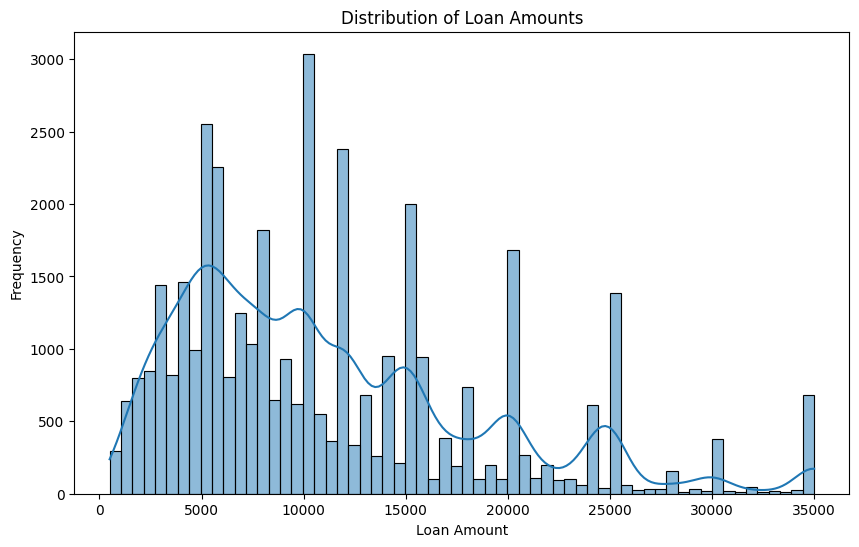

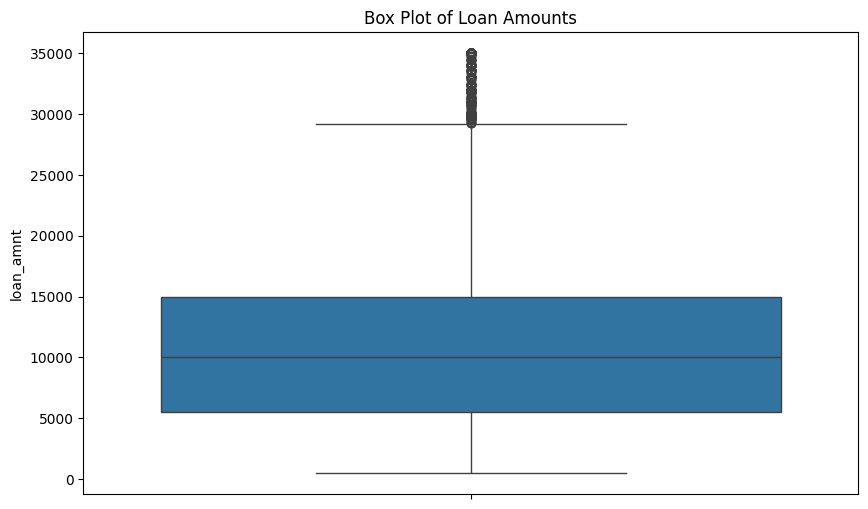

In [145]:
# Analysis for `loan amt'
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis for 'loan_amnt'
display(HTML(f"<h5>Analysis for loan_amnt</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_amnt'])
plt.title('Box Plot of Loan Amounts')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.2.1 Results: Loan_amnt univerate analysis

- The loan amounts range from 500 to 35,000, with a mean of approximately 11,248.
- The median loan amount is 10,000, indicating a balanced distribution around this value.
- The standard deviation of 7,470 suggests moderate variability in loan amounts.
- The interquartile range (IQR) is 9,500, showing a reasonable spread between the 25th and 75th percentiles.
- Both the minimum and maximum values are within the expected range for personal loans, with no extreme outliers observed.
- Conclusion: All data should be included in the analysis as the distribution appears normal and reflects the typical range of loan amounts.



#### 8.3 int_rate univerate analysis


count    38881.000000
mean         0.120438
std          0.037413
min          0.054200
25%          0.092500
50%          0.118600
75%          0.146100
max          0.245900
Name: int_rate, dtype: float64

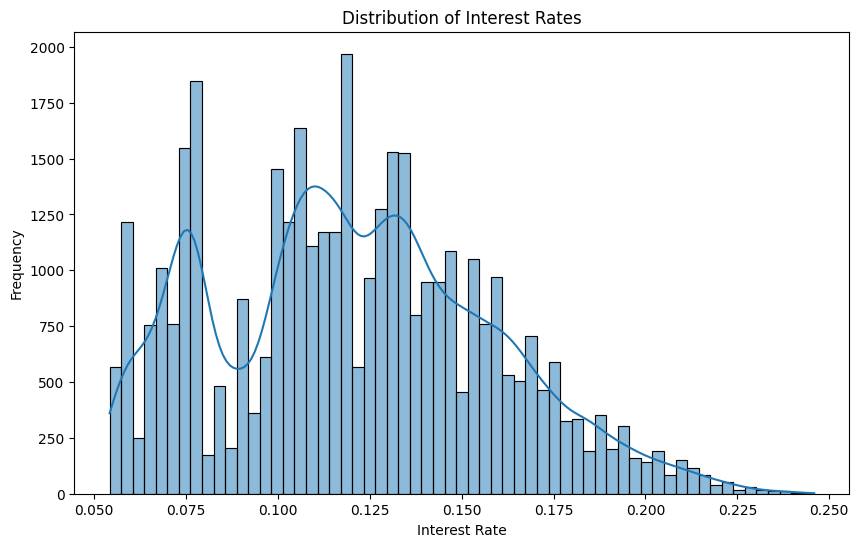

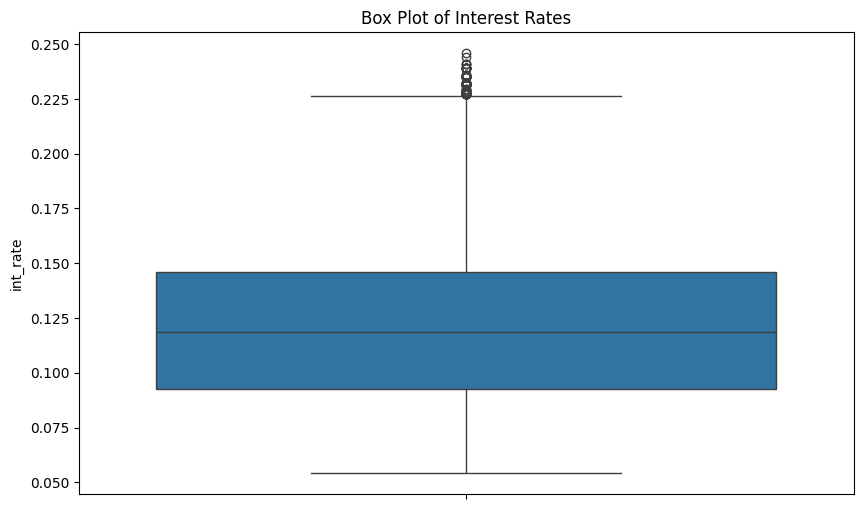

In [146]:
# Analysis for 'int_rate'
display(HTML(f"<h5>Analysis for int_rate</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['int_rate'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['int_rate'])
plt.title('Box Plot of Interest Rates')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.3.1 Results: int_rate univerate analysis

- The interest rates range from 5.42% to 24.59%, with a mean of approximately 12.04%.
- The median interest rate is 11.86%, indicating a slightly lower concentration of interest rates around this value.
- The standard deviation of 3.74% suggests a moderate variability in interest rates.
- The interquartile range (IQR) is 5.36%, with rates ranging from 9.25% (25th percentile) to 14.61% (75th percentile), showing a reasonable spread for loan interest rates.
- Both the minimum and maximum values are within the expected range for personal loans, with no extreme outliers observed.
- Conclusion: All data should be included in the analysis as the distribution appears normal and reflects the typical range of interest rates offered to borrowers.


#### 8.4 funded_amnt univerate analysis


count    38881.000000
mean     10973.825905
std       7197.851043
min        500.000000
25%       5425.000000
50%       9725.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

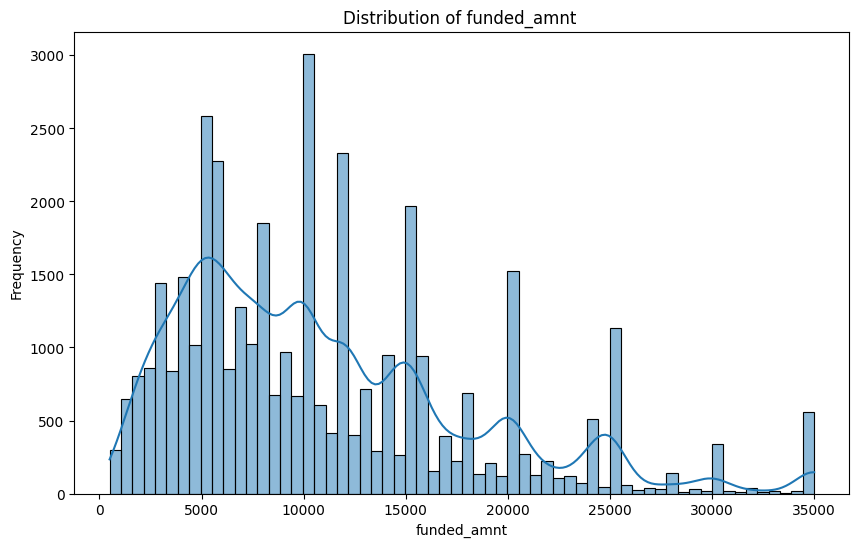

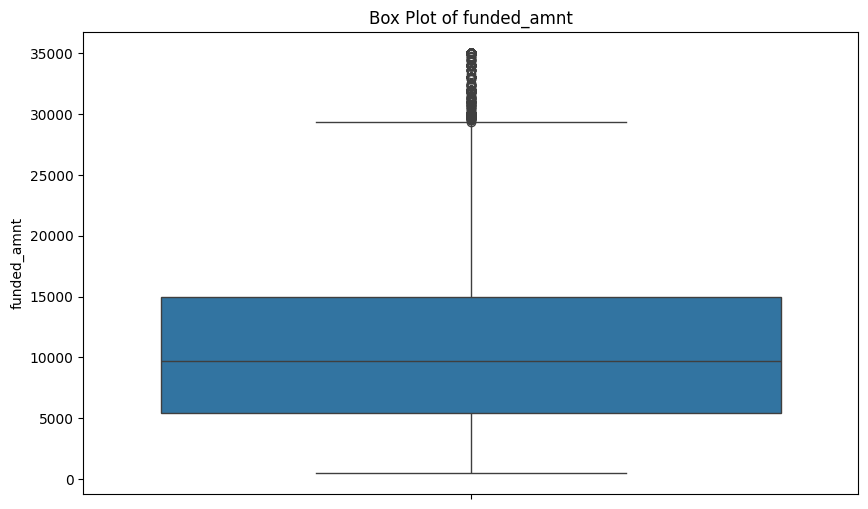

In [147]:
# Analysis for 'funded_amnt'
display(HTML(f"<h5>Analysis for funded_amnt</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'], kde=True)
plt.title('Distribution of funded_amnt ')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt'])
plt.title('Box Plot of funded_amnt')
plt.show()

# Separator
display(HTML("<hr>"))


count    38881.000000
mean     10547.573491
std       7101.391677
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14479.387340
max      35000.000000
Name: funded_amnt_inv, dtype: float64

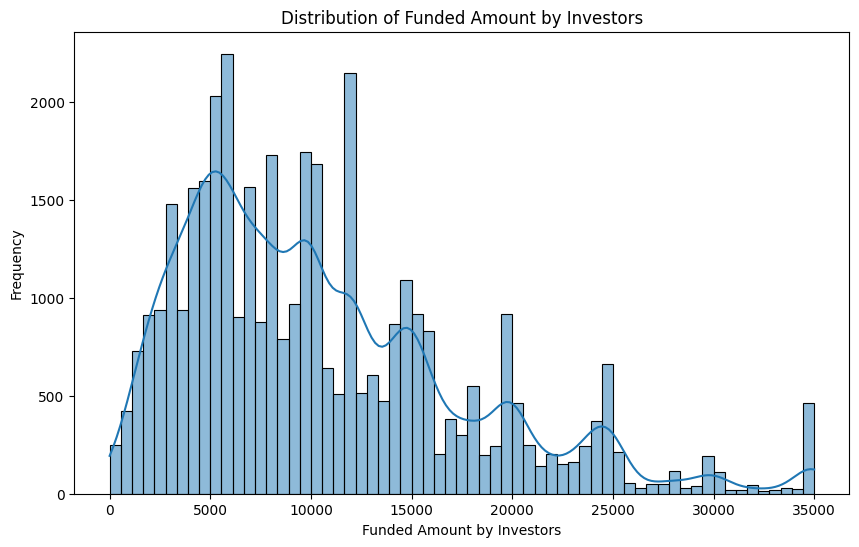

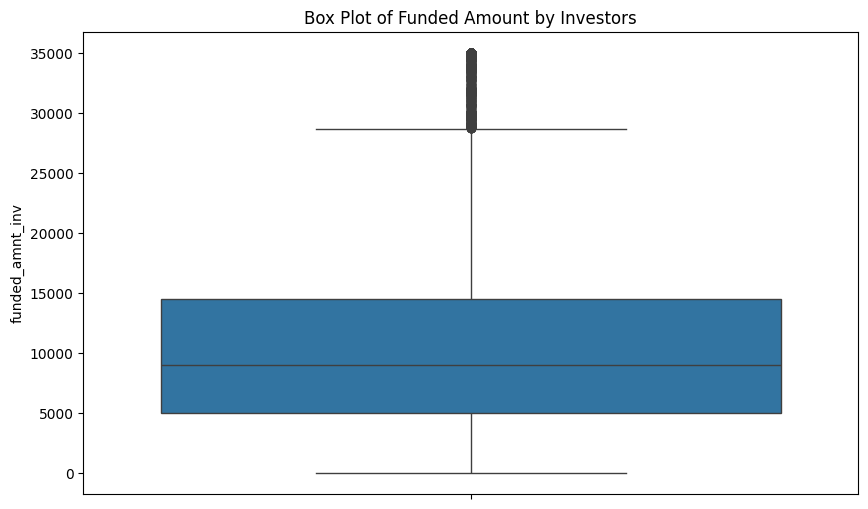

In [148]:
# Summary statistics
display(HTML(f"<h5>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'], kde=True)
plt.title('Distribution of Funded Amount by Investors')
plt.xlabel('Funded Amount by Investors')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['funded_amnt_inv'])
plt.title('Box Plot of Funded Amount by Investors')
plt.show()

# Separator
display(HTML("<hr>"))

##### 8.4.1 Results :
- same as loan_amt; outliers are not so far from IQR range
 

#### 8.5 Installment Univerate analysis


count    38881.000000
mean       324.789180
std        208.829963
min         16.080000
25%        167.340000
50%        280.390000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

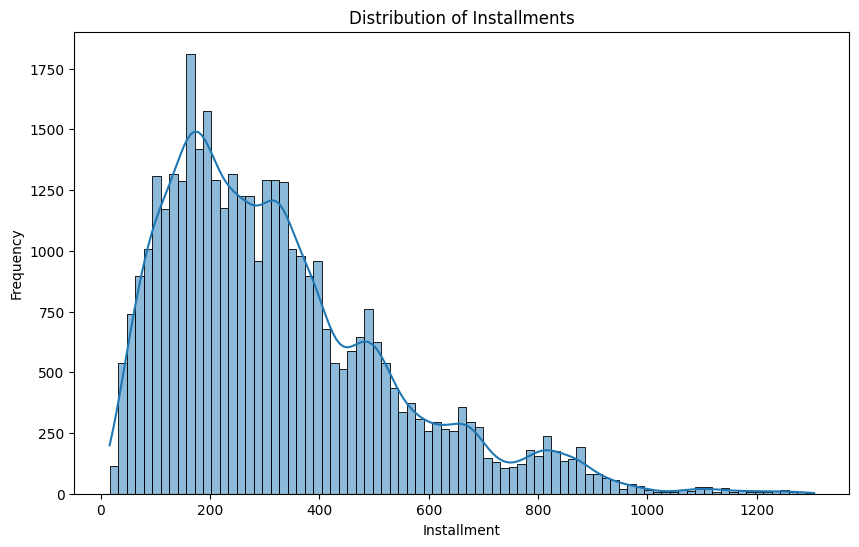

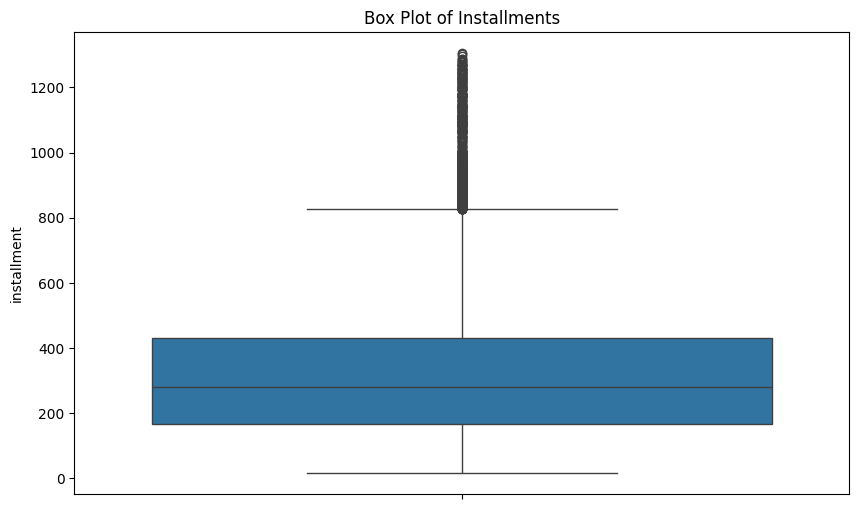

In [149]:

# Analysis for 'installment'
display(HTML(f"<h5>Analysis for installment</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['installment'].describe()
display(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['installment'], kde=True)
plt.title('Distribution of Installments')
plt.xlabel('Installment')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['installment'])
plt.title('Box Plot of Installments')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.5.1 Results: 
- The installment is a derived metric based on the loan_amnt and int_rate, calculated using the loan's principal, interest rate, and term. Given that we've already determined that there are no significant outliers in loan_amnt and int_rate, and that these variables are within expected ranges, the same reasoning applies to installment.
- We can also see this with the above histo and box plot.

#### 8.6 annual_inc univerate analysis

count    3.888100e+04
mean     6.897030e+04
std      6.316489e+04
min      4.000000e+03
25%      4.080000e+04
50%      5.902051e+04
75%      8.240400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

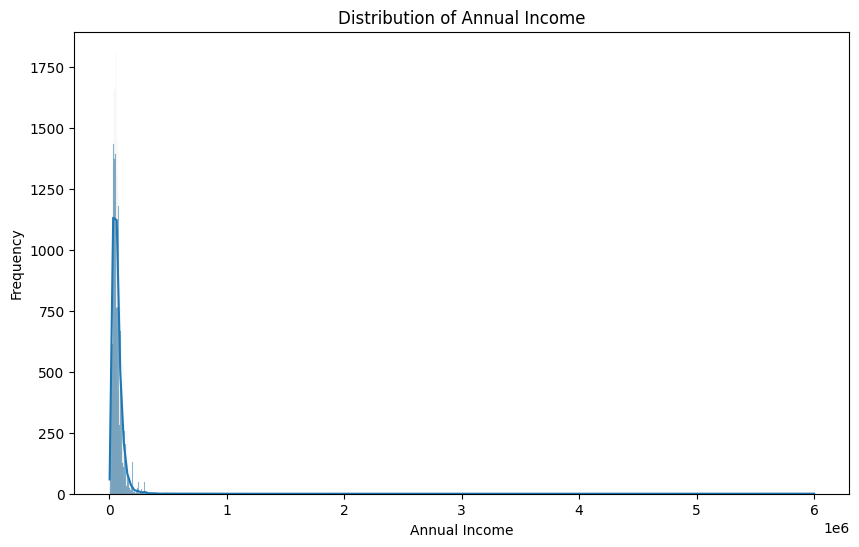

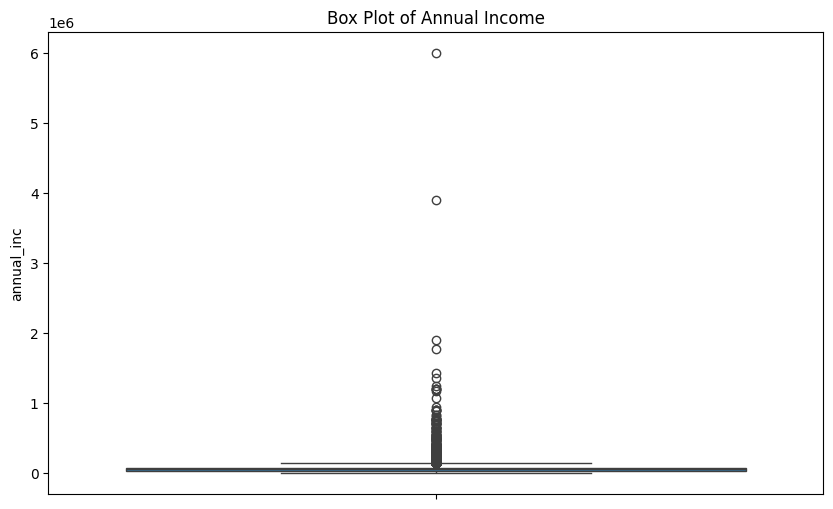

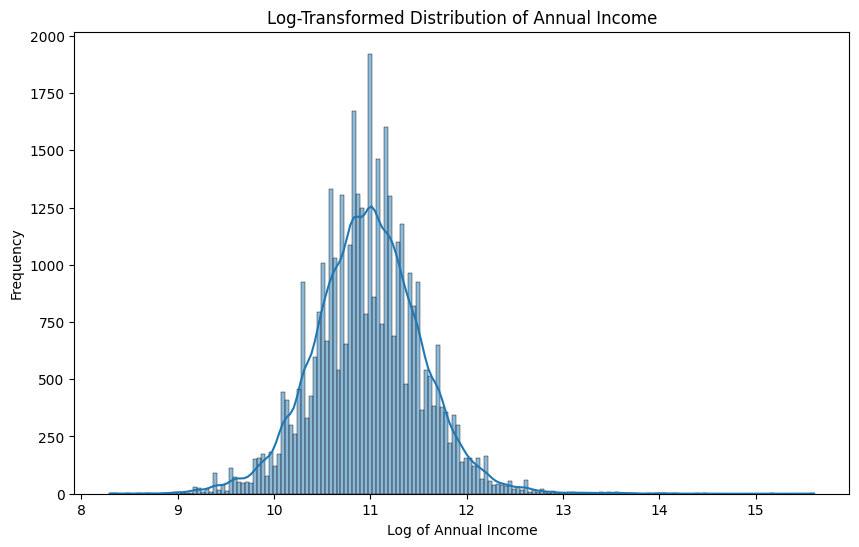

In [150]:


# Analysis for 'annual_inc'
display(HTML(f"<h5>Analysis for annual_inc</h5>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h6>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc'])
plt.title('Box Plot of Annual Income')
plt.show()

# Log Transformation as distribution is highly skewed
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(lendingCaseStudyDataFrameCleanedWithTypesCorrected['annual_inc']), kde=True)
plt.title('Log-Transformed Distribution of Annual Income')
plt.xlabel('Log of Annual Income')
plt.ylabel('Frequency')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.6.1 Results:
- The annual incomes range from $4,000 to $6,000,000, with a mean of approximately $68,970.
- The median income is $59,020, indicating a slight skew toward higher incomes.
- The standard deviation of $63,165 suggests significant variability in income levels.
- The distribution is right-skewed, with high-income outliers notably impacting the mean.
- Conclusion: While outliers exist, all data should be included in the analysis. Special handling, such as log transformation, may be needed in bivariate or multivariate analyses involving annual_inc.


#### 8.7  dti univerate analysis

count    38881.000000
mean        13.360985
std          6.666922
min          0.000000
25%          8.230000
50%         13.450000
75%         18.630000
max         29.990000
Name: dti, dtype: float64

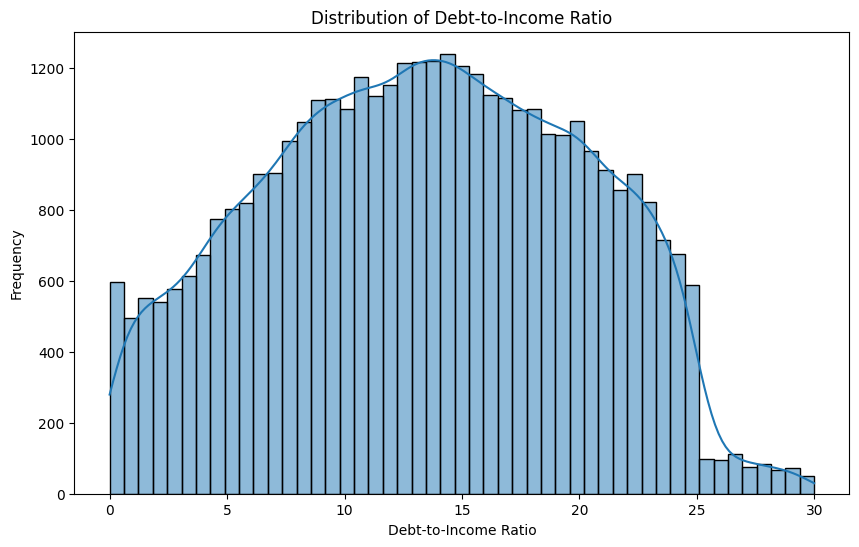

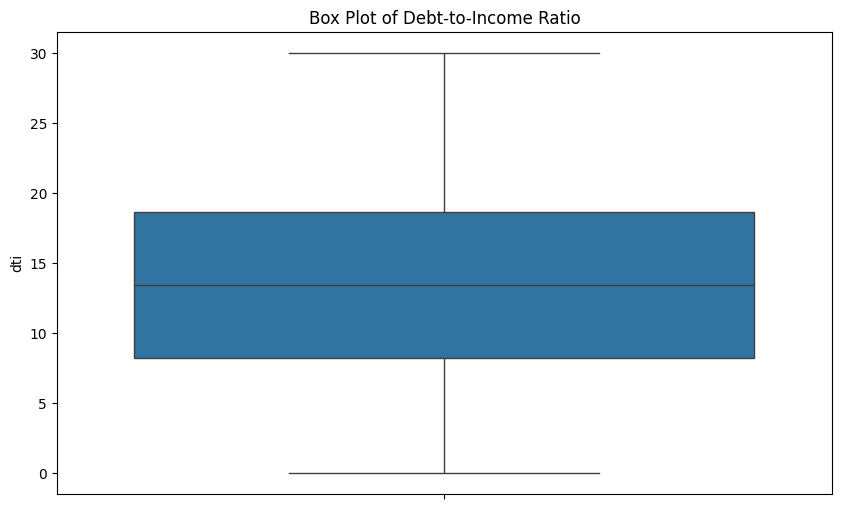

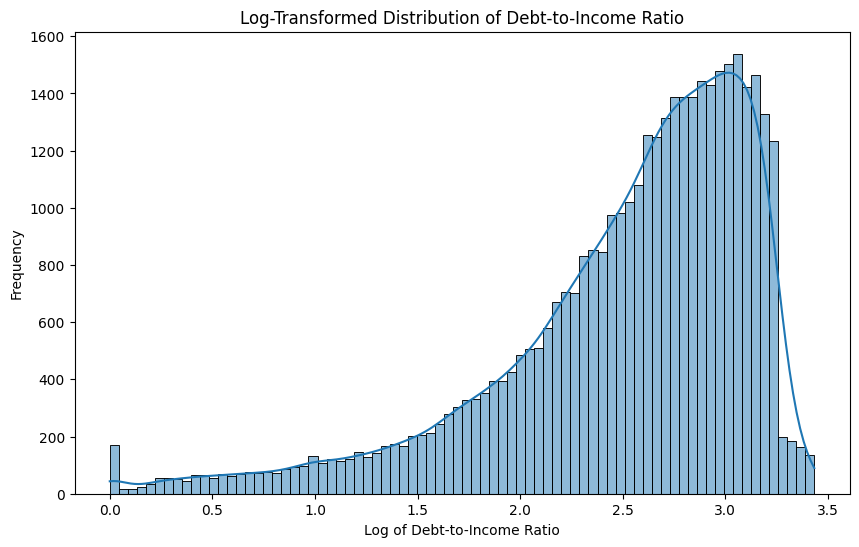

In [151]:


# Analysis for 'dti'
display(HTML(f"<h5>Analysis for dti</h5>"))

# Summary statistics
display(HTML(f"<h5>Summary Statistics:</h5>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti'], kde=True)
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti'])
plt.title('Box Plot of Debt-to-Income Ratio')
plt.show()

# Optional: Log Transformation if distribution is highly skewed
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(lendingCaseStudyDataFrameCleanedWithTypesCorrected['dti']), kde=True)
plt.title('Log-Transformed Distribution of Debt-to-Income Ratio')
plt.xlabel('Log of Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.7.1 Results
- The debt-to-income ratios range from 0% to 29.99%, with a mean of approximately 13.36%.
- The median DTI is 13.45%, indicating a balanced distribution around this value.
- The standard deviation of 6.67% suggests moderate variability in DTI among borrowers.
- The distribution is normal, with no extreme outliers, as the maximum value is within expected limits.
- Conclusion: All data should be included in the analysis as the distribution of DTI values is within the expected range and shows no significant outliers.



#### 8.8 delinq_2yrs Univerate analysis

count    38881.000000
mean         0.145752
std          0.490418
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

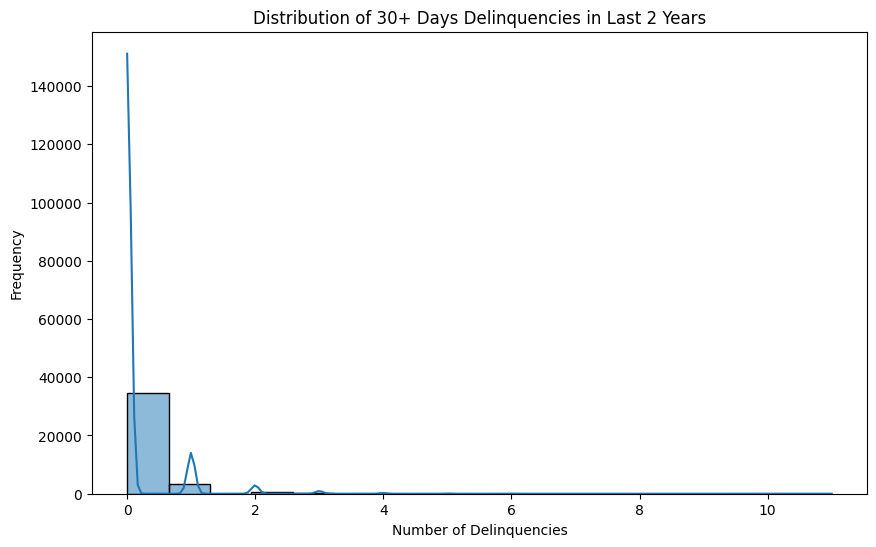

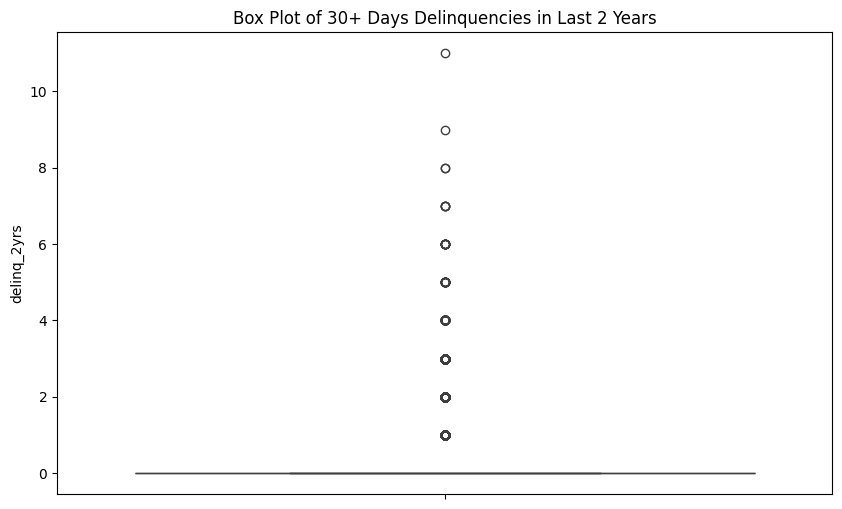

In [152]:


# Analysis for 'delinq_2yrs'
display(HTML(f"<h5>Analysis for delinq_2yrs</h5>"))

# Summary statistics
display(HTML(f"<h5>Summary Statistics:</h5>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'], kde=True)
plt.title('Distribution of 30+ Days Delinquencies in Last 2 Years')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'])
plt.title('Box Plot of 30+ Days Delinquencies in Last 2 Years')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.8.1 Results of delinq_2yrs Univerate analysis
The summary statistics for delinq_2yrs indicate that the majority of borrowers have had no 30+ days delinquencies in the past 2 years. Given that the data is skewed but expected (many borrowers with no delinquencies), we should include all data in  analysis when we move to bivariate analysis, particularly examining the relationship between delinq_2yrs and loan performance, we will consider the outliers more carefully.

#### 8.9 inq_last_6mths Univerate analysis


count    38881.000000
mean         0.867159
std          1.067535
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

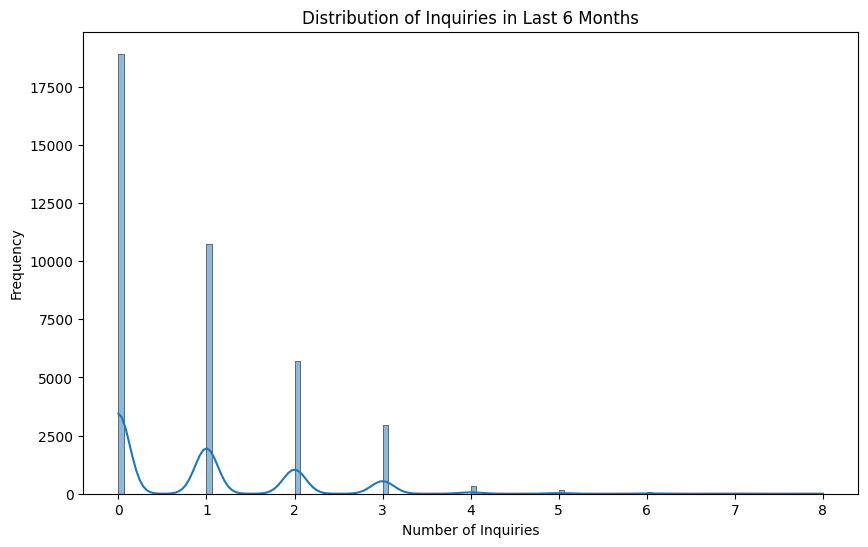

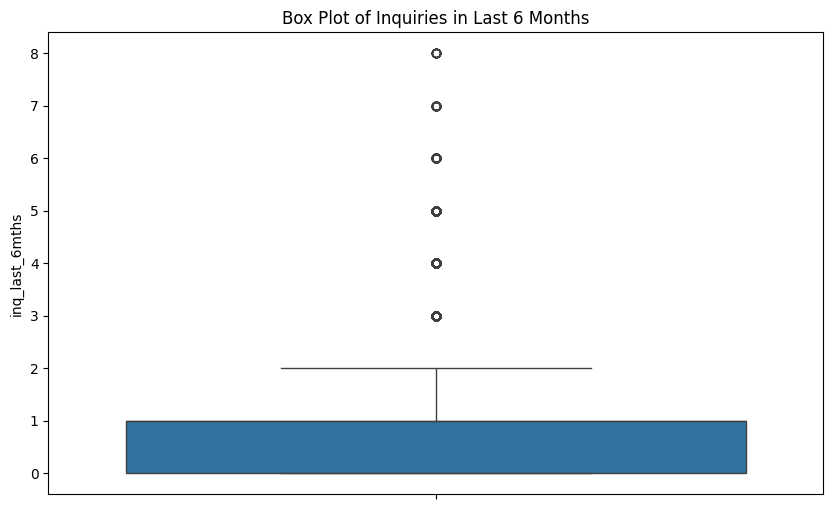

In [153]:


# Analysis for 'inq_last_6mths'
display(HTML(f"<h5>Analysis for inq_last_6mths</h5>"))

# Summary statistics
display(HTML(f"<h5>Summary Statistics:</h5>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'], kde=True)
plt.title('Distribution of Inquiries in Last 6 Months')
plt.xlabel('Number of Inquiries')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'])
plt.title('Box Plot of Inquiries in Last 6 Months')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.9.1 Results : inq_last_6mths Univerate analysis

- The number of inquiries in the last 6 months ranges from 0 to 8, with a mean of approximately 0.87.
- The median number of inquiries is 1, indicating that most borrowers had one or fewer inquiries in the last 6 months.
- The standard deviation of 1.07 suggests that the number of inquiries varies, but most values are close to the mean.
- The 25th and 75th percentiles are both 0 and 1, respectively, showing that the majority of borrowers had either 0 or 1 inquiry.
- Conclusion: The distribution is right-skewed, with no extreme outliers. All data should be included in the analysis as it represents typical borrower behavior.


#### 8.10 mths_since_last_delinq Univerate analysis


count    13300.000000
mean        37.053308
std         21.400895
min          0.000000
25%         20.000000
50%         35.000000
75%         53.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

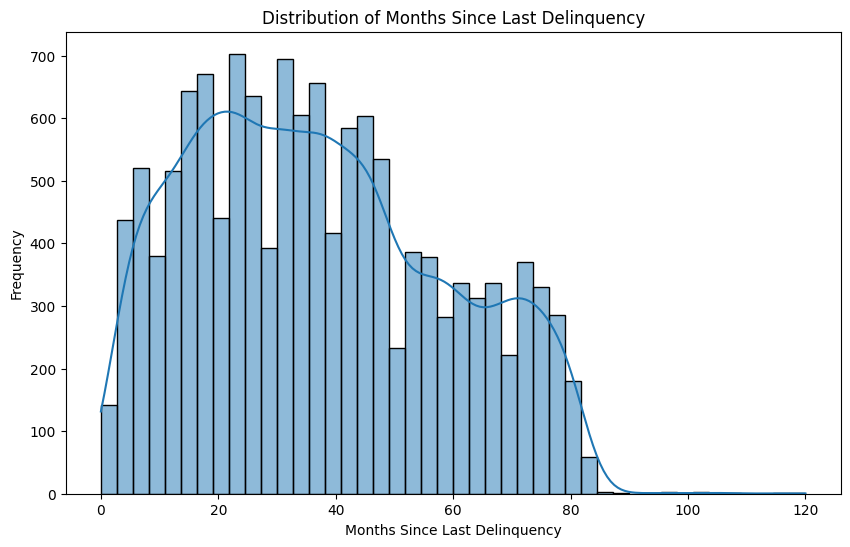

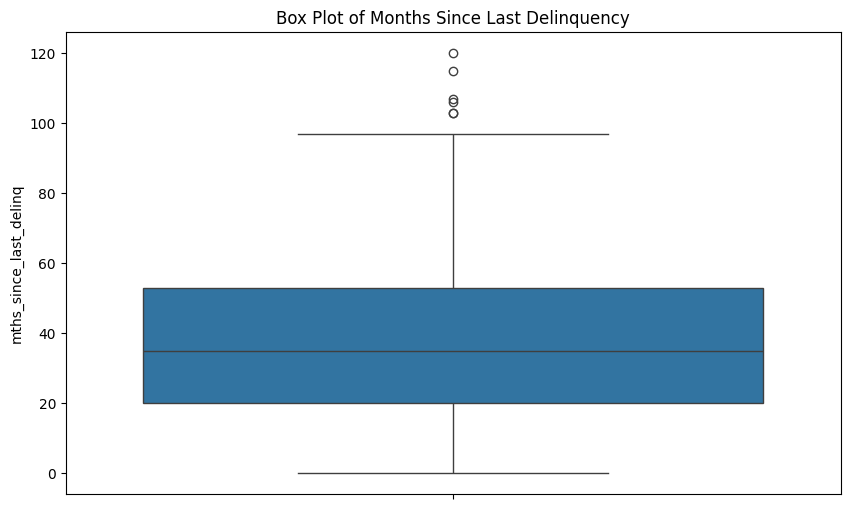

In [154]:


# Analysis for 'mths_since_last_delinq'
display(HTML(f"<h6>Analysis for mths_since_last_delinq</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'], kde=True)
plt.title('Distribution of Months Since Last Delinquency')
plt.xlabel('Months Since Last Delinquency')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_delinq'])
plt.title('Box Plot of Months Since Last Delinquency')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.10.1 Results: mths_since_last_delinq Univerate analysis
- The number of months since the last delinquency has a mean of approximately 37 months.
- The standard deviation is fine at 21 months, indicating significant variability in the data.
- The minimum value is 0 months, representing recent delinquencies.
- The 25th percentile is at 20 months, while the 50th and 75th percentiles are at 35 and 53 months.
- This data is only for members who have delinq in previous loans. We should do biverate analysis to check if it has any relation to defaulters.


#### 8.11 mths_since_last_record Univerate analysis


count    2085.000000
mean       92.075779
std        22.157654
min         6.000000
25%        87.000000
50%        97.000000
75%       108.000000
max       120.000000
Name: mths_since_last_record, dtype: float64

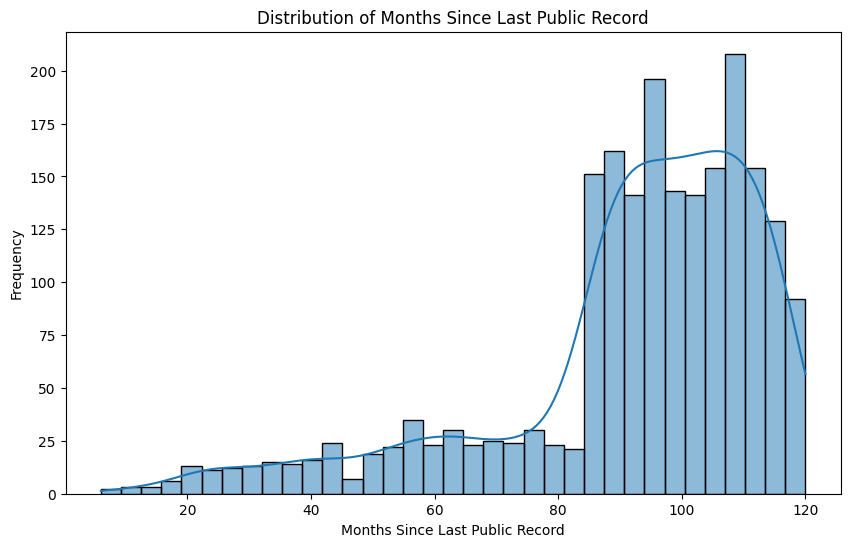

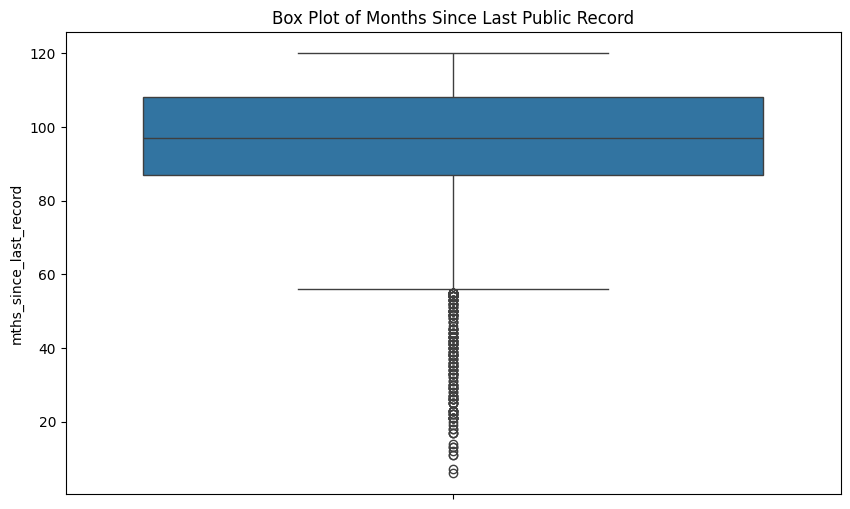

In [155]:


# Analysis for 'mths_since_last_record'
display(HTML(f"<h6>Analysis for mths_since_last_record</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'], kde=True)
plt.title('Distribution of Months Since Last Public Record')
plt.xlabel('Months Since Last Public Record')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['mths_since_last_record'])
plt.title('Box Plot of Months Since Last Public Record')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.11.1 mths_since_last_record Univerate analysis

- The average time since the last public record is approximately 92 months, indicating that most records occurred over seven years ago.
- The standard deviation is around 22 months, reflecting some variability in the timing of public records.
- The most recent public record in the dataset occurred 6 months ago.
- The distribution of data shows that 25% of the records are from 87 months ago or less, the median is 97 months, and 75% are from 108 months ago or less.
- The maximum value is 120 months, suggesting that the data primarily includes public records from within the past 10 years.
- This data is only for members who have public record from previous loans. We should do biverate analysis to check if it has any relation to defaulters.



#### 8.12 open_acc Univerate analysis


count    38881.000000
mean         9.294360
std          4.379503
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

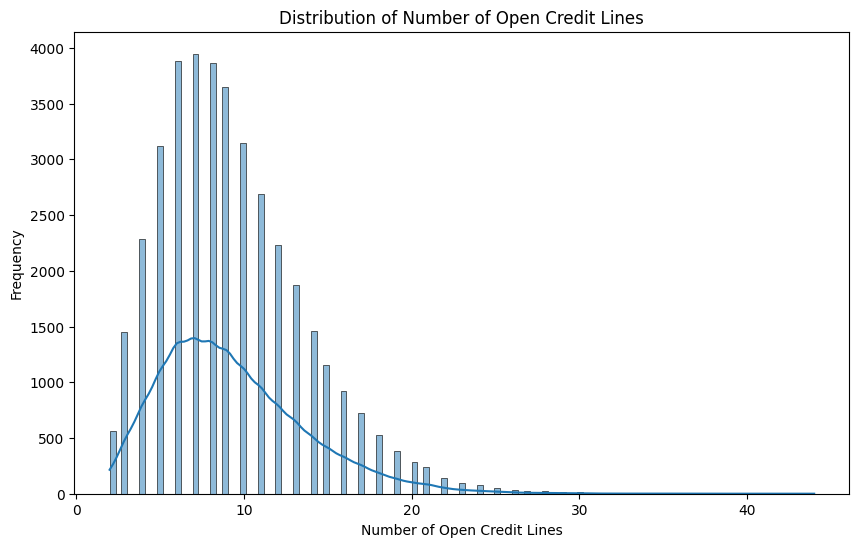

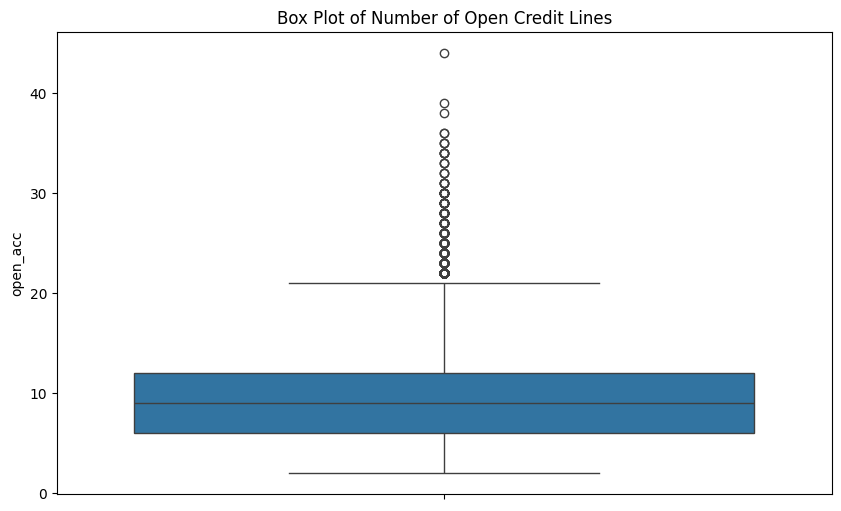

In [156]:


# Analysis for 'open_acc'
display(HTML(f"<h6>Analysis for open_acc</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'], kde=True)
plt.title('Distribution of Number of Open Credit Lines')
plt.xlabel('Number of Open Credit Lines')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['open_acc'])
plt.title('Box Plot of Number of Open Credit Lines')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.12.1 Results: open_acc Univerate analysis

- The number of open credit lines ranges from 2 to 44, with a mean of approximately 9.29.
- The median number of open accounts is 9, indicating a balanced distribution around this value.
- The standard deviation of 4.38 suggests moderate variability in the number of open credit lines among borrowers.
- The 25th percentile is at 6 open accounts, while the 75th percentile is at 12, showing a reasonable spread in the data.
- Conclusion: The distribution appears normal, with no extreme outliers. All data should be included in the analysis as it represents typical borrower credit profiles.



#### 8.13 pub_rec Univerate analysis


count    38881.000000
mean         0.055400
std          0.237803
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

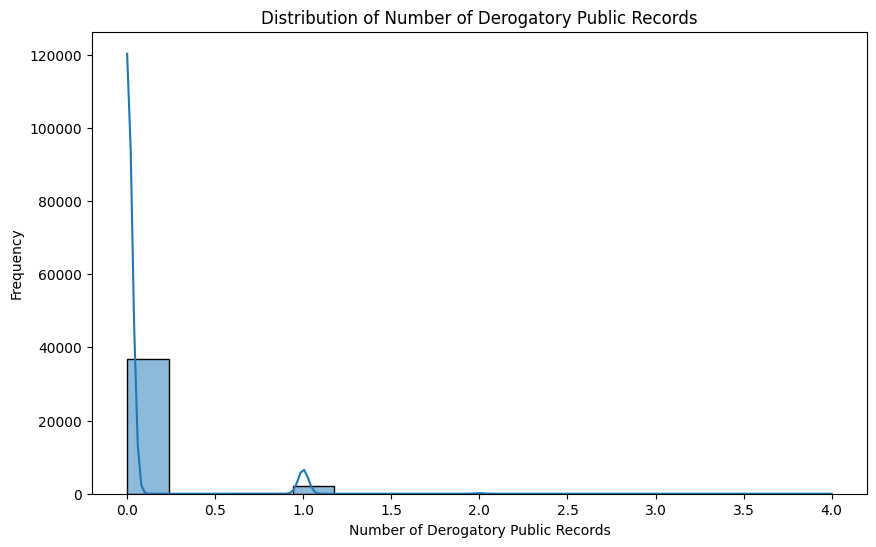

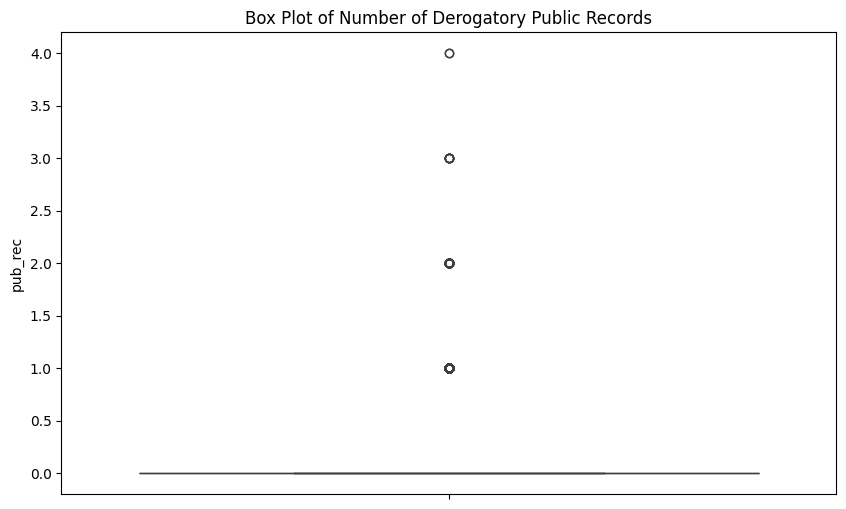

In [157]:


# Analysis for 'pub_rec'
display(HTML(f"<h6>Analysis for pub_rec</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'], kde=True)
plt.title('Distribution of Number of Derogatory Public Records')
plt.xlabel('Number of Derogatory Public Records')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['pub_rec'])
plt.title('Box Plot of Number of Derogatory Public Records')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.13.1 pub_rec Univerate analysis


- The number of derogatory public records ranges from 0 to 4, with a mean of approximately 0.055.
- The median value is 0, indicating that the majority of borrowers have no derogatory public records.
- The standard deviation of 0.238 suggests very low variability, with most values close to 0.
- The 25th, 50th, and 75th percentiles are all 0, showing that derogatory public records are rare in this dataset.
- Conclusion: The distribution is heavily skewed towards 0, with no extreme outliers. All data should be included in the analysis, as it accurately reflects the rarity of derogatory public records among borrowers.
- This data is only for members who have public record from previous loans. We should do biverate analysis to check if it has any relation to defaulters.


#### 8.14 revol_bal Univerate analysis


count     38881.000000
mean      13381.032175
std       15829.296861
min           0.000000
25%        3734.000000
50%        8868.000000
75%       17063.000000
max      149588.000000
Name: revol_bal, dtype: float64

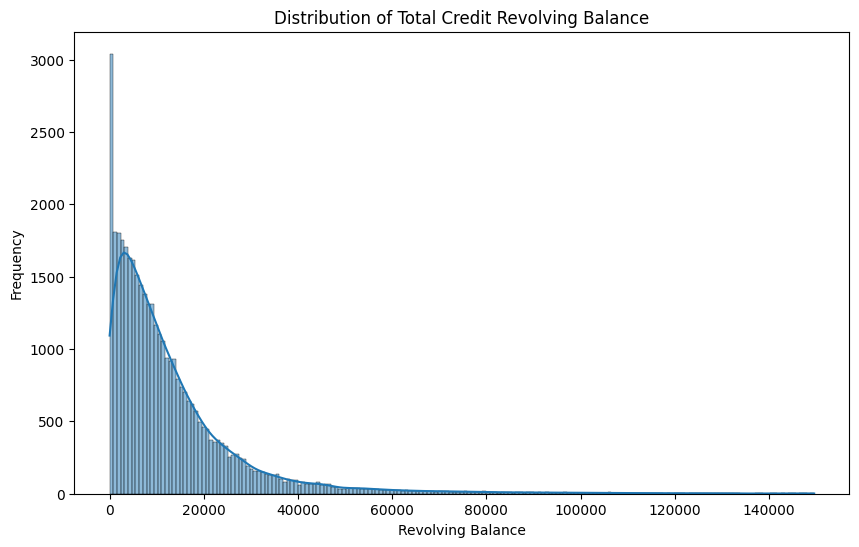

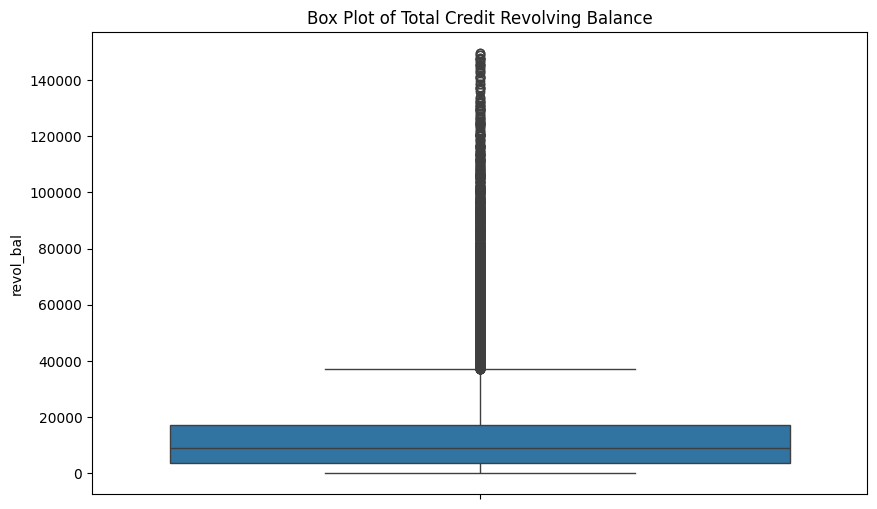

In [158]:
# Analysis for 'revol_bal'
display(HTML(f"<h5>Analysis for revol_bal</h3>"))

# Summary statistics
display(HTML(f"<h5>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_bal'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_bal'], kde=True)
plt.title('Distribution of Total Credit Revolving Balance')
plt.xlabel('Revolving Balance')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_bal'])
plt.title('Box Plot of Total Credit Revolving Balance')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.14.1 revol_bal Univerate analysis


- The total credit revolving balance ranges from $0 to $149,588, with a mean of approximately $13,381.
- The median revolving balance is $8,868, indicating that half of the borrowers have a balance below this amount.
- The standard deviation of $15,829 suggests significant variability in revolving balances among borrowers.
- The 25th percentile is $3,734, while the 75th percentile is $17,063, showing a wide range in the distribution of revolving balances.
- Conclusion: The distribution shows a reasonable spread of revolving balances with no extreme outliers. All data should be included in the analysis as it reflects the typical distribution of credit revolving balances.



#### 8.15 revol_util Univerate analysis


count    38881.000000
mean         0.489760
std          0.283003
min          0.000000
25%          0.256000
50%          0.495000
75%          0.725000
max          0.999000
Name: revol_util, dtype: float64

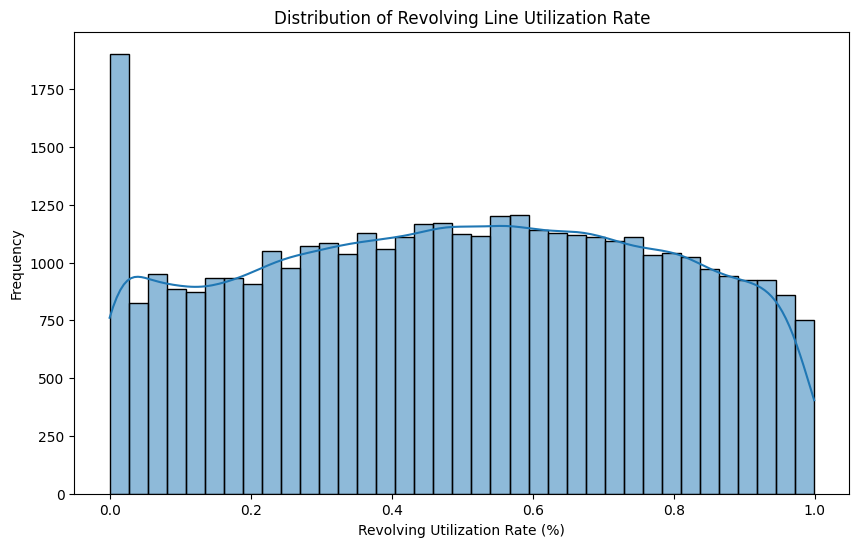

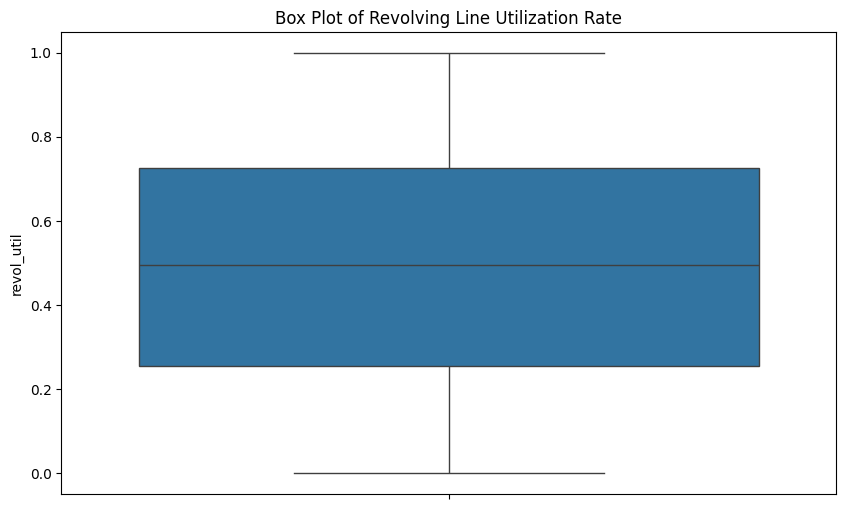

In [159]:


# Analysis for 'revol_util'
display(HTML(f"<h5>Analysis for revol_util</h3>"))

# Summary statistics
display(HTML(f"<h5>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'], kde=True)
plt.title('Distribution of Revolving Line Utilization Rate')
plt.xlabel('Revolving Utilization Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util'])
plt.title('Box Plot of Revolving Line Utilization Rate')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.15.1 Results revol_util Univerate analysis


- The revolving line utilization rate ranges from 0% to 99.9%, with a mean of approximately 48.98%.
- The median utilization rate is 49.5%, indicating that half of the borrowers are using nearly half of their available revolving credit.
- The standard deviation of 28.30% suggests a wide variability in utilization rates among borrowers.
- The 25th percentile is at 25.6%, and the 75th percentile is at 72.5%, showing a significant spread in how borrowers use their revolving credit.
- Conclusion: The distribution shows a reasonable spread with no extreme outliers. All data should be included in the analysis as it reflects the typical usage of revolving credit by borrowers.



#### 8.16 total_acc Univerate analysis


count    38881.000000
mean        22.141612
std         11.387959
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

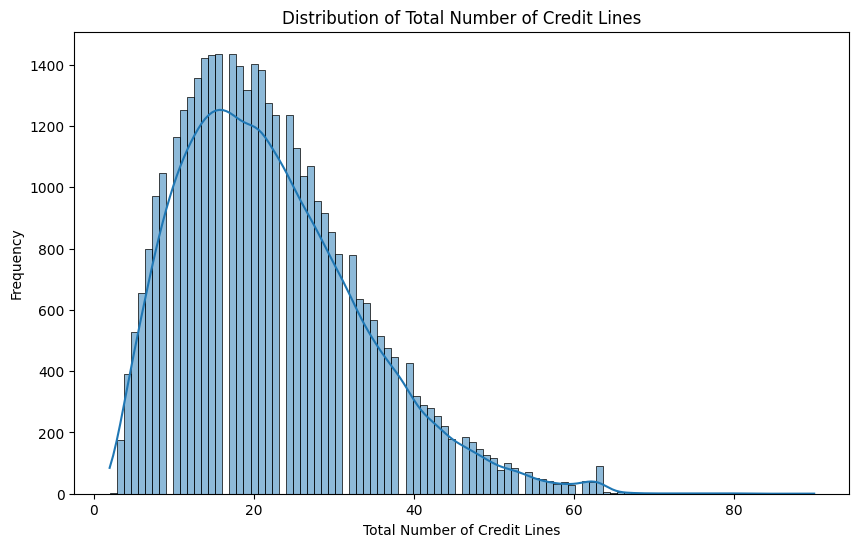

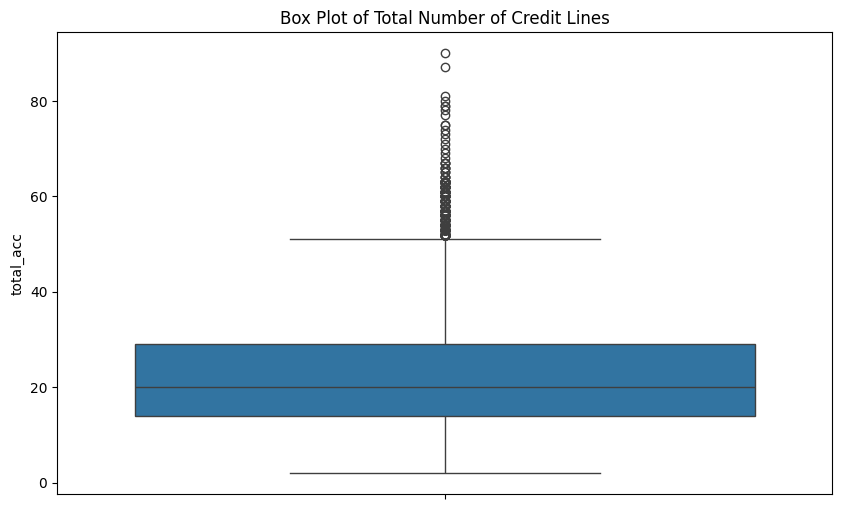

In [160]:


# Analysis for 'total_acc'
display(HTML(f"<h6>Analysis for total_acc</h3>"))

# Summary statistics
display(HTML(f"<h6>Summary Statistics:</h4>"))
summary_stats = lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc'].describe()
display(summary_stats)

# Histogram and KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
sns.histplot(lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc'], kde=True)
plt.title('Distribution of Total Number of Credit Lines')
plt.xlabel('Total Number of Credit Lines')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['total_acc'])
plt.title('Box Plot of Total Number of Credit Lines')
plt.show()

# Separator
display(HTML("<hr>"))


##### 8.16.1 Results: total_acc Univerate analysis


- The total number of credit lines ranges from 2 to 90, with a mean of approximately 22.14.
- The median value is 20 credit lines, indicating a balanced distribution around this value.
- The standard deviation of 11.39 suggests significant variability in the total number of credit lines among borrowers.
- The 25th percentile is at 14 credit lines, and the 75th percentile is at 29 credit lines, showing a broad range in the data.
- Conclusion: The distribution shows a wide spread with no extreme outliers. All data should be included in the analysis as it reflects the typical number of credit lines in borrowers' credit files.


#### 8.17 Ordered Categorical Variables Categorization
These categorical variables have a natural order or ranking.

- `term`: Number of payments on the loan (e.g., 36 months, 60 months).
   - Encoded as an integer type to preserve the order in the analysis.
- `grade`: Loan grade (e.g., A, B, C, D, E, F, G).
  - Will be encoded as an ordered categorical variable.
- `sub_grade`: Loan sub-grade (e.g., A1, A2, B1, B2, etc.).
  - Will be encoded as an ordered categorical variable.
- `emp_length`: Length of employment (e.g., <1 year, 1-2 years, 10+ years).
  - Will be encoded as an ordered categorical variable.



In [161]:
# Define the correct order of categories for 'emp_length'
emp_length_order = ['<1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 
                    '8 years', '9 years', '10+ years']

# Encode 'emp_length' as an ordered categorical variable
lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'] = pd.Categorical(lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'], categories=emp_length_order, ordered=True)

# Display the DataFrame and the data type of 'emp_length'
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'])
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'].dtype)

0        10+ years
1              NaN
2        10+ years
3        10+ years
4           1 year
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 38881, dtype: category
Categories (11, object): ['<1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' < '9 years' < '10+ years']
category


In [162]:
# Define the correct order for 'grade'
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Encode 'grade' as an ordered categorical variable
lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'] = pd.Categorical(lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'], categories=grade_order, ordered=True)

# Display the DataFrame and the data type of 'grade'
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'])
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'].dtype)


0        B
1        C
2        C
3        C
4        B
        ..
39562    C
39573    C
39623    D
39666    C
39680    D
Name: grade, Length: 38881, dtype: category
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']
category


In [163]:
# Define the correct order for 'sub_grade'
sub_grade_order = [
    'A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5'
]

# Encode 'sub_grade' as an ordered categorical variable
lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'] = pd.Categorical(lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'], categories=sub_grade_order, ordered=True)

# Display the DataFrame and the data type of 'sub_grade'
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'])
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'].dtype)

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
39562    C1
39573    C2
39623    D3
39666    C4
39680    D1
Name: sub_grade, Length: 38881, dtype: category
Categories (35, object): ['A1' < 'A2' < 'A3' < 'A4' ... 'G2' < 'G3' < 'G4' < 'G5']
category


#### 8.18 term Univerate analysis


term
36    28289
60    10592
Name: count, dtype: int64


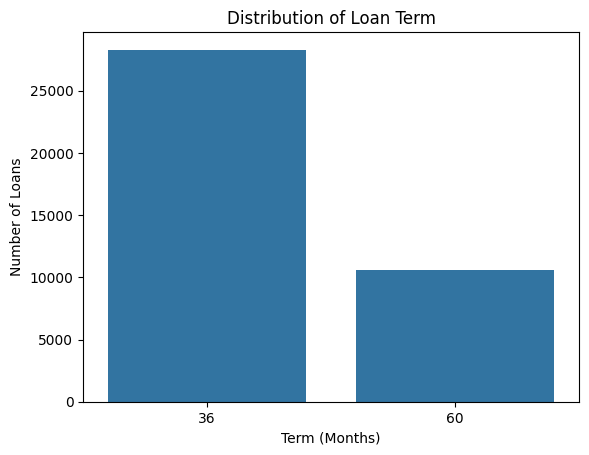

In [164]:
term_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['term'].value_counts().sort_index()
print(term_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['term'])
plt.title('Distribution of Loan Term')
plt.xlabel('Term (Months)')
plt.ylabel('Number of Loans')
plt.show()


##### 8.18.1 Results: term Univerate analysis

- Dominance of 36-Month Term: The majority of loans (28,289) have a 36-month term, indicating that this is the most common loan duration in your dataset.
- 60-Month Term: A significant number of loans (10,592) have a 60-month term, but it is less common compared to the 36-month term.

#### 8.19 grade Univerate analysis


grade
B    11783
A     9911
C     7885
D     5172
E     2791
F     1027
G      312
Name: count, dtype: int64


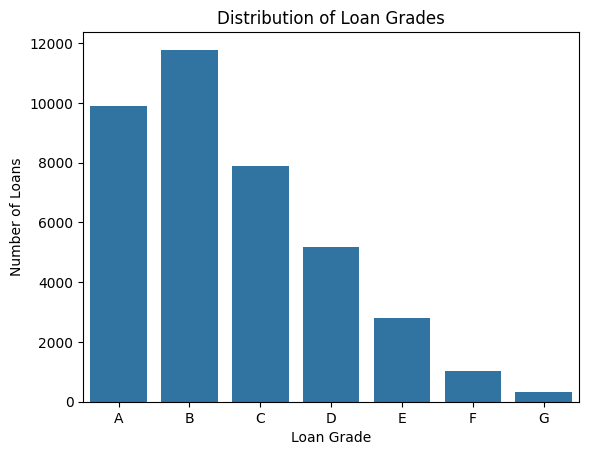

In [165]:
grade_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'].value_counts()
print(grade_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'])
plt.title('Distribution of Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.show()



##### 8.19.1 Results
- Observation: The distribution shows a skew towards the higher grades (A, B), with fewer loans in the lower grades (E, F, G).
- Interpretation: This skew reflects a typical risk management strategy, where lenders prefer to offer more loans to borrowers with better credit profiles.

#### 8.20 Loan Sub-Grade Univerate analysis


sub_grade
B3    2873
A4    2855
A5    2705
B5    2656
B4    2467
C1    2079
B2    2005
C2    1968
B1    1782
A3    1765
C3    1488
A2    1472
D2    1319
C4    1199
C5    1151
D3    1145
A1    1114
D4     956
D1     896
D5     856
E1     751
E2     644
E3     547
E4     444
E5     405
F1     325
F2     242
F3     182
F4     162
F5     116
G1     102
G2      77
G4      56
G3      48
G5      29
Name: count, dtype: int64


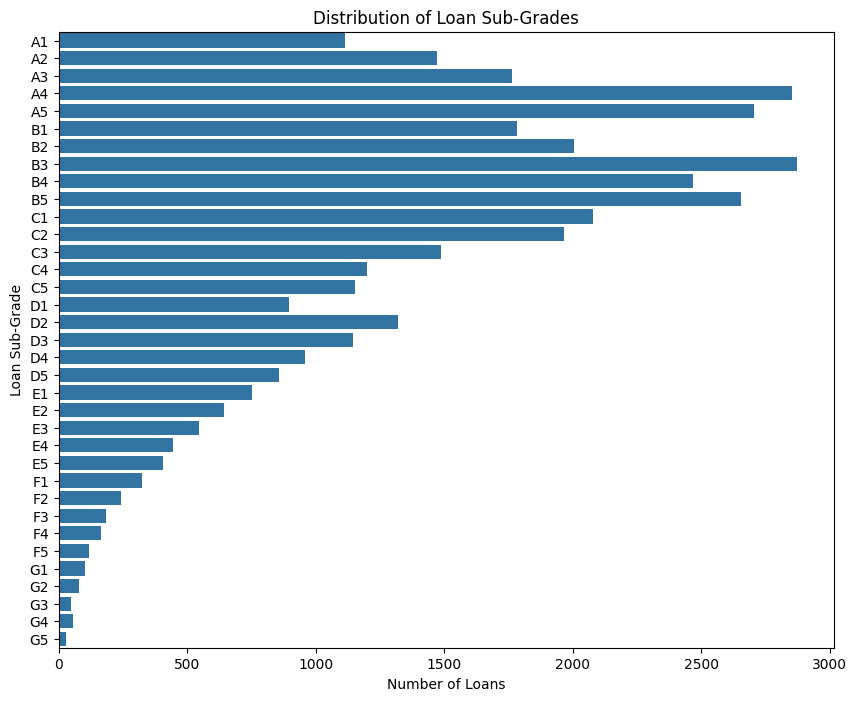

In [166]:
sub_grade_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'].value_counts()
print(sub_grade_counts)
plt.figure(figsize=(10, 8))
sns.countplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['sub_grade'])
plt.title('Distribution of Loan Sub-Grades')
plt.xlabel('Number of Loans')
plt.ylabel('Loan Sub-Grade')
plt.show()

##### 8.20.1 Results
- Observation: The distribution shows a skew towards the higher grades (A, B), with fewer loans in the lower grades (E, F, G).
- Interpretation: This skew reflects a typical risk management strategy, where lenders prefer to offer more loans to borrowers with better credit profiles.

#### 8.21 emp_length Univerate analysis


emp_length
10+ years    8739
2 years      4294
3 years      4028
4 years      3379
5 years      3239
1 year       3139
6 years      2189
7 years      1747
8 years      1451
9 years      1240
<1 year         0
Name: count, dtype: int64


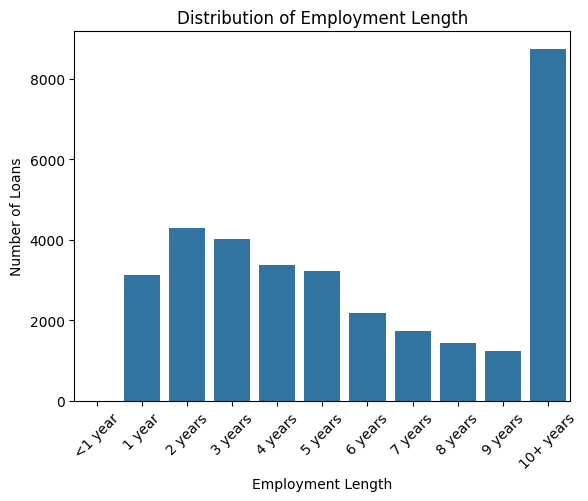

In [167]:
emp_length_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'].value_counts()
print(emp_length_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['emp_length'])
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
plt.show()

##### 8.21.1 Results:
- The data shows that most borrowers have been employed for 10+ years, which might correlate with higher creditworthiness.
- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

#### 8.22. Unordered Categorical Variables
These categorical variables do not have a natural order or ranking.

- `id`: Loan ID.
   - Converted to string data type.
- `member_id`: Member ID.
   - Converted to string data type.
- `emp_title`: Job title of the borrower.
   -Converted to string data type.
- `home_ownership`: Home ownership status (e.g., Rent, Own, Mortgage).
   - Converted to enum data type.
- `verification_status`: Income verification status (e.g., Verified, Not Verified).
   - Converted to enum data type.
- `loan_status`: Current status of the loan (e.g., Fully Paid, Charged Off, Current).
   - Converted to enum data type.
- `desc`: Loan description.
   - Converted to string data type.
- `purpose`: Purpose of the loan (e.g., Debt consolidation, Credit card).
   - Converted to string data type.
- `title`: Loan title.
   - Converted to string data type.
- `zip_code`: First 3 digits of the borrower's zip code.
   - Converted to string data type.
- `addr_state`: State of the address provided by the borrower.
   - Converted to string data type.


#### 8.23 home_ownership Univerate analysis


home_ownership
RENT        18465
MORTGAGE    17348
OWN          2973
OTHER          95
Name: count, dtype: int64


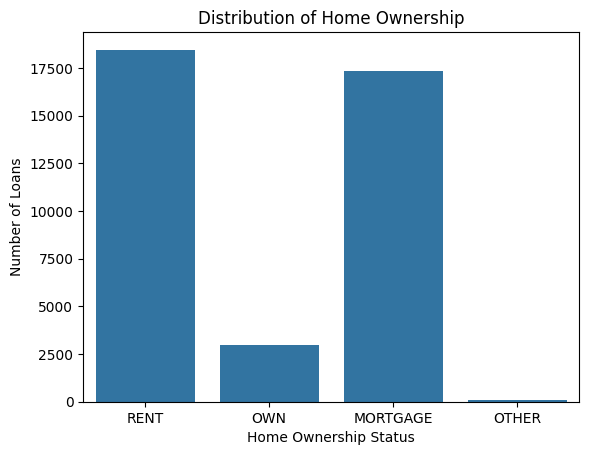

In [168]:
home_ownership_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['home_ownership'].value_counts()
print(home_ownership_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['home_ownership'])
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Loans')
plt.show()

##### 8.23.1 Results: home_ownership Univerate analysis

- The distribution of home ownership status shows a heavy skew towards renters and mortgage holders, with fewer borrowers owning their homes outright.
- Negligible OTHER Category: The OTHER category will have a very small bar, showing that this is a rare home ownership status among borrowers.

#### 8.24 verification_status Univerate analysis


verification_status
Not Verified       16163
Verified           12764
Source Verified     9954
Name: count, dtype: int64


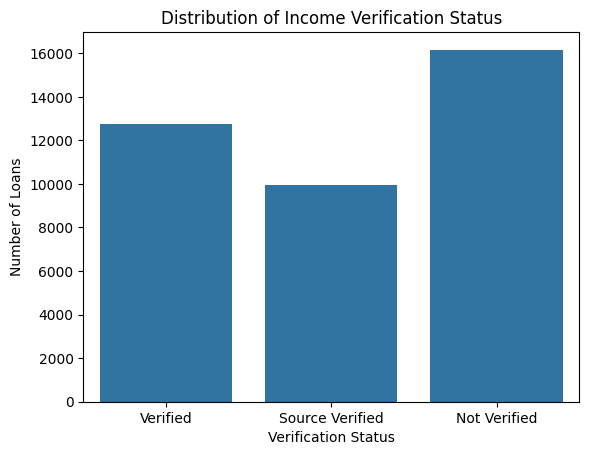

In [169]:
verification_status_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['verification_status'].value_counts()
print(verification_status_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['verification_status'], order=['Verified', 'Source Verified', 'Not Verified'])
plt.title('Distribution of Income Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Number of Loans')
plt.show()

##### 8.24.1 Results: verification_status Univerate analysis
- The high number of Not Verified loans could suggest a higher risk profile for the loan portfolio. Loans that have not undergone full verification may have a higher likelihood of default, which is important to consider in risk assessments.


#### 8.25 loan_status Univerate analysis


loan_status
Fully Paid     32270
Charged Off     5476
Current         1135
Name: count, dtype: int64


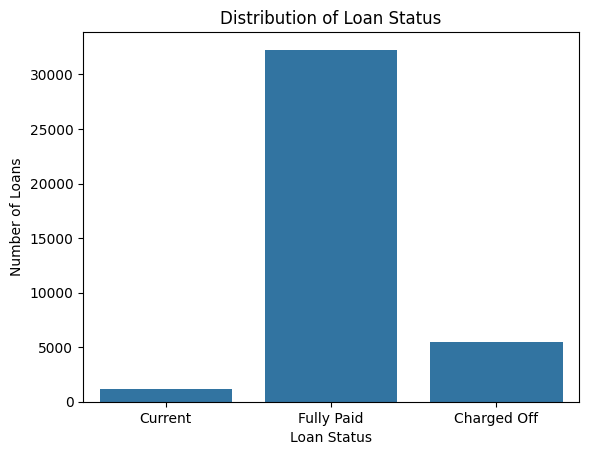

In [170]:
loan_status_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_status'].value_counts()
print(loan_status_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_status'], order=['Current', 'Fully Paid', 'Charged Off'])
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

##### 8.25.1 Results: loan_status Univerate analysis
- Majority of Loans Fully Paid Off: The analysis shows that the majority of loans in the dataset have been fully paid off.
- Charged Off Loans: There are 5,476 loans in the dataset that have been charged off, representing cases where borrowers have defaulted on their obligations. 

#### 8.26 purpose Univerate analysis

purpose
debt_consolidation    18311
credit_card            5018
other                  3867
home_improvement       2910
major_purchase         2154
small_business         1767
car                    1523
wedding                 927
medical                 681
moving                  572
house                   376
vacation                369
educational             304
renewable_energy        102
Name: count, dtype: int64


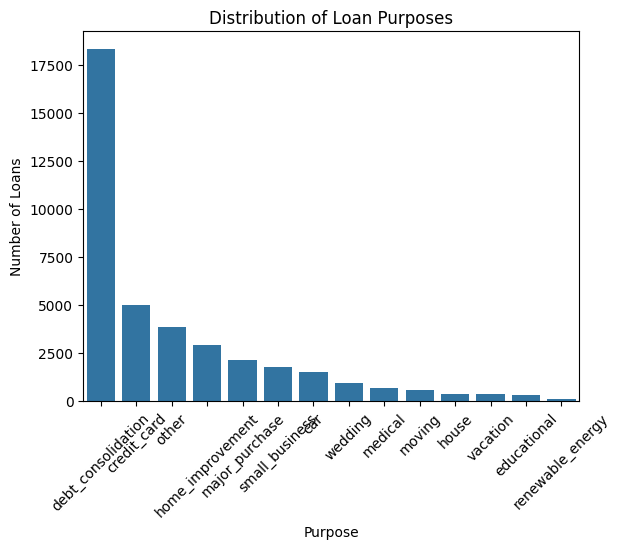

In [171]:
purpose_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['purpose'].value_counts()
print(purpose_counts)
sns.countplot(x=lendingCaseStudyDataFrameCleanedWithTypesCorrected['purpose'], order=purpose_counts.index)
plt.title('Distribution of Loan Purposes')
plt.xlabel('Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.show()

##### 8.26.1 Results: purpose univerate analysis
- The dominance of Debt Consolidation and Credit Card loan purposes suggests that many borrowers are focused on managing and consolidating existing debt.
- The range of other loan purposes, from Home Improvement to Small Business, reflects the diverse financial needs that personal loans help fulfill.
- Niche Categories: Although less common, loan purposes like Educational, Renewable Energy, and Vacation show that some borrowers seek loans for more specific, and sometimes non-essential, purposes.

#### 8.27 addr_state univerate analysis

addr_state
CA    6987
NY    3717
FL    2804
TX    2671
NJ    1811
IL    1510
PA    1496
GA    1372
VA    1371
MA    1300
OH    1201
MD    1021
AZ     864
WA     814
CO     767
NC     754
CT     741
MI     708
MO     670
MN     606
NV     493
SC     463
AL     444
OR     444
WI     440
LA     427
KY     322
OK     298
KS     268
UT     251
AR     239
DC     209
RI     196
NM     183
WV     176
HI     172
NH     166
DE     110
MT      84
WY      82
AK      79
SD      62
VT      52
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: count, dtype: int64


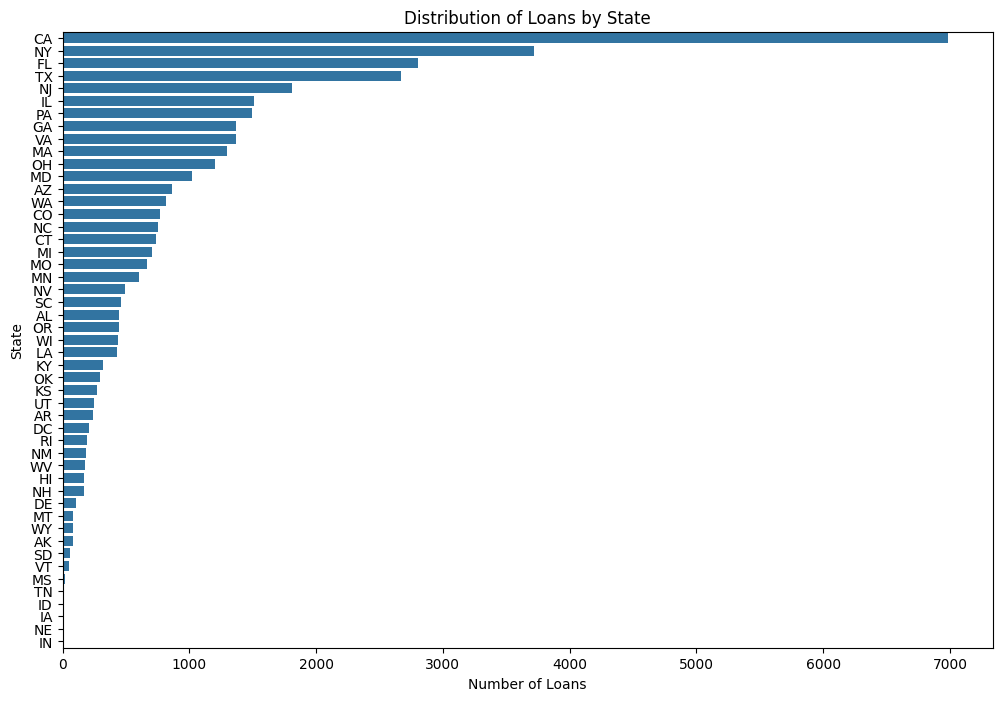

In [172]:
addr_state_counts = lendingCaseStudyDataFrameCleanedWithTypesCorrected['addr_state'].value_counts()
print(addr_state_counts)
plt.figure(figsize=(12, 8))
sns.countplot(y=lendingCaseStudyDataFrameCleanedWithTypesCorrected['addr_state'], order=addr_state_counts.index)
plt.title('Distribution of Loans by State')
plt.xlabel('Number of Loans')
plt.ylabel('State')
plt.show()

##### 8.27.1 Results: addr_state univerate analysis
- High Concentration in California (CA)
- New York (3,717), Florida (2,804), and Texas (2,671) also have a large number of loans.
- States like New Jersey (1,811), Illinois (1,510), and Pennsylvania (1,496) have moderate numbers of loans.
- Some states like Iowa (1), Nebraska (1), and Indiana (1) have almost negligible loan counts.

### 9. Biverate analysis


#### 9.1 Loan Amount and Funded Amount by Loan Status
Understand how loan amounts and the amount funded by investors vary with the loan status (e.g., Fully Paid, Charged Off).

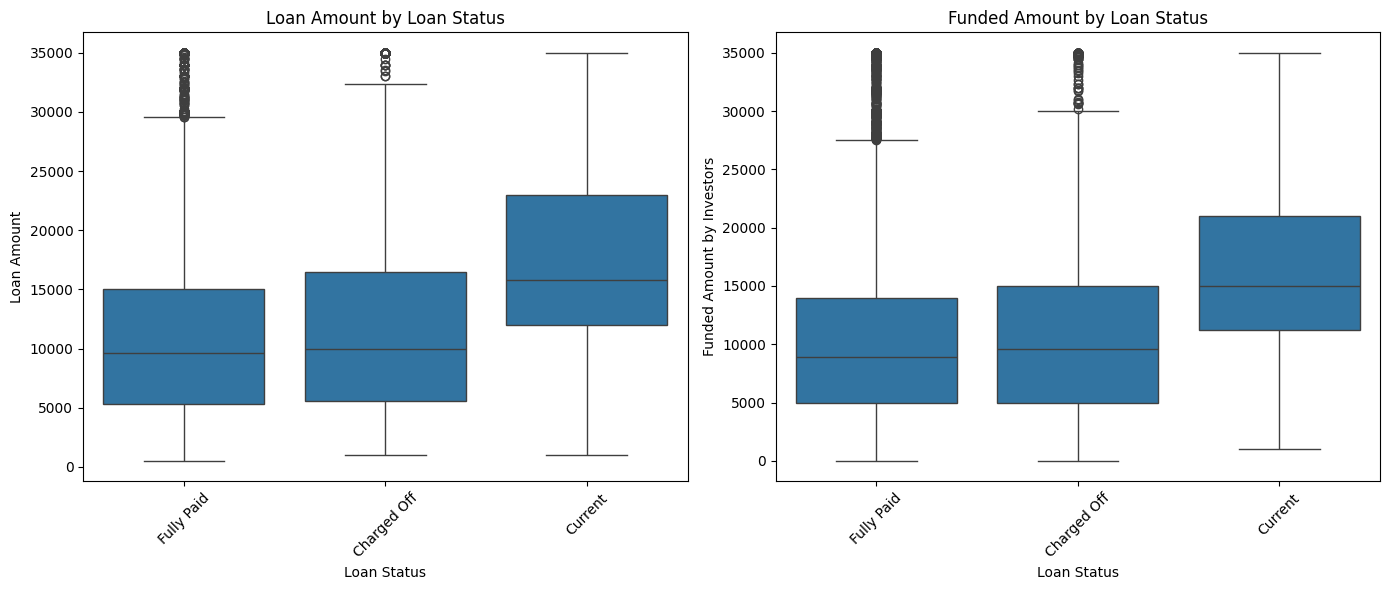

In [173]:
# Create a figure with subplots to compare loan amount and funded amount by loan status
plt.figure(figsize=(14, 6))

# Subplot 1: Loan Amount by Loan Status
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=lendingCaseStudyDataFrameCleanedWithTypesCorrected)
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Subplot 2: Funded Amount by Loan Status
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=lendingCaseStudyDataFrameCleanedWithTypesCorrected)
plt.title('Funded Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount by Investors')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Display the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

##### 9.1.1 Results of Loan Amount and Funded Amount by Loan Status

Graphs show similar distributions across all loan statuses (Fully Paid, Charged Off, Current, etc.), it suggests that the size of the loan or the amount funded by investors is not a key driver of default risk in this dataset.

#### 9.2 Grade and Sub-Grade by Loan Status.


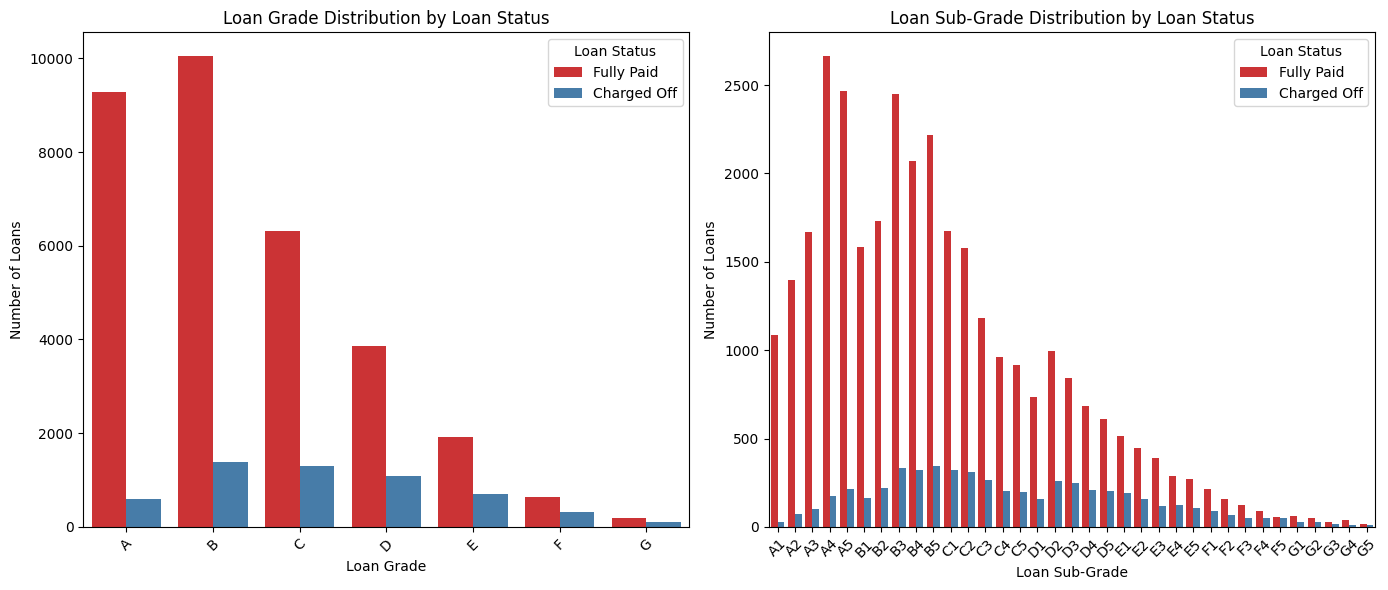

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called `lendingCaseStudyDataFrameCleanedWithTypesCorrected`
# Exclude loans with 'Current' status
df_filtered = lendingCaseStudyDataFrameCleanedWithTypesCorrected[
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_status'] != 'Current']

# Create a figure with subplots to compare grade and sub-grade by loan status
plt.figure(figsize=(14, 6))

# Subplot 1: Grade by Loan Status (Count Plot)
plt.subplot(1, 2, 1)
sns.countplot(x='grade', hue='loan_status', data=df_filtered, palette='Set1')
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Subplot 2: Sub-Grade by Loan Status (Count Plot)
plt.subplot(1, 2, 2)
sns.countplot(x='sub_grade', hue='loan_status', data=df_filtered, palette='Set1')
plt.title('Loan Sub-Grade Distribution by Loan Status')
plt.xlabel('Loan Sub-Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Display the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()



In [175]:
# Calculate the total number of loans and charged off loans for each grade
loan_counts_by_grade = df_filtered.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()

loan_counts_by_grades_proportion = loan_counts_by_grade['Charged Off']

print(loan_counts_by_grades_proportion)

grade
A    0.060069
B    0.121329
C    0.171324
D    0.218182
E    0.267994
F    0.324948
G    0.335593
Name: Charged Off, dtype: float64


/var/folders/kl/lhs7mp5s1ml8g684db055ckm0000gq/T/ipykernel_46429/3889696774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_counts_by_grade = df_filtered.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()


##### 9.2.1 Grade and Sub-Grade by Loan Status.

* The plots indicate that lower loan grades (D, E, F, and G) have a significantly higher proportion of "Charged Off" loans compared to higher grades (A, B, C), which are mostly "Fully Paid." Similarly, within each grade, lower sub-grades (e.g., C5, D5) show a higher likelihood of default. This suggests that both lower grades and sub-grades are strong indicators of increased default risk, highlighting the importance of these factors in assessing loan risk.
* For risk management, loans in the lower grades (D and below) and lower sub-grades (e.g., C5, D5, etc.) should be treated with greater caution, possibly requiring higher interest rates or stricter approval criteria to mitigate the increased risk of default.

#### 9.3 Home Ownership by Loan Status.


<function matplotlib.pyplot.show(close=None, block=None)>

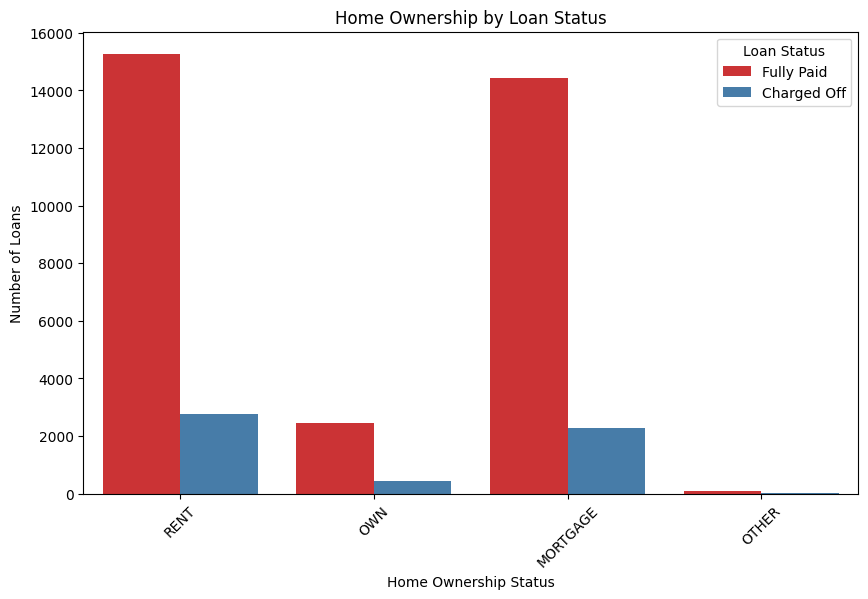

In [176]:
# Create a count plot to visualize the relationship between home ownership and loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_filtered, palette='Set1')
plt.title('Home Ownership by Loan Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show



In [177]:
# Calculate the total number of loans and charged off loans for each home ownership category
loan_counts = df_filtered.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack()

# Calculate the proportion of Charged Off loans for each home ownership category
loan_counts_proportion = loan_counts['Charged Off']

loan_counts_proportion

home_ownership
MORTGAGE    0.135643
OTHER       0.189474
OWN         0.146662
RENT        0.153322
Name: Charged Off, dtype: float64

##### 9.3.1 Results of Home Ownership with default status

When looking proportionally, the data seems consistent across different home ownership statuses. There doesn't appear to be a stark difference in default rates when considering the total number of loans within each category.

    Rent: There is a significant number of "Charged Off" loans, but given the large total number of loans, the proportion of defaults might not be disproportionately high compared to "Fully Paid."
    Mortgage: Similarly, while there are many "Charged Off" loans, the large volume of "Fully Paid" loans suggests that the proportion of defaults might be similar to other categories.
    Own: Even though there are fewer loans in the "Own" category, the proportion of defaults seems to be relatively small, aligning with the overall lower number of loans.

#### 9.4 Annual income by Loan Status.


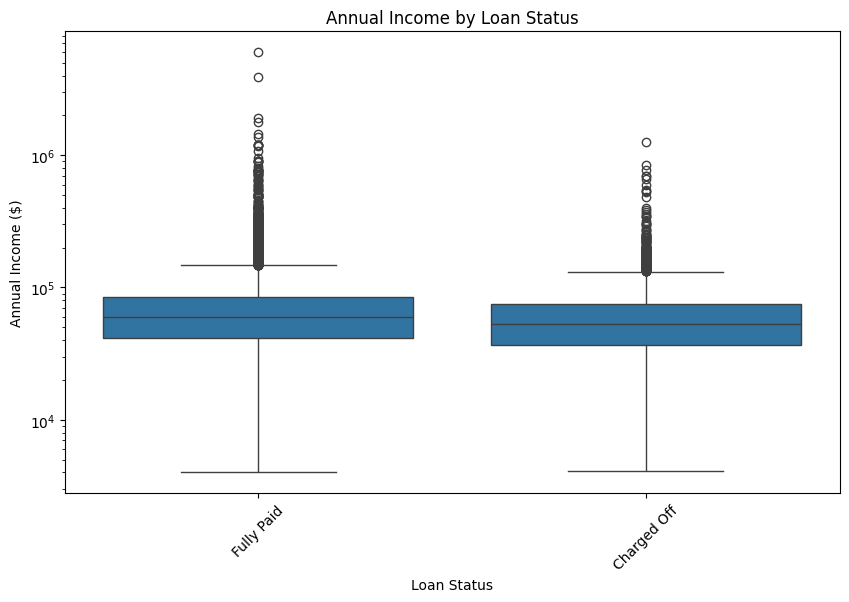

In [178]:
# Create a box plot to visualize the distribution of annual income by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df_filtered)
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yscale('log')  # Use log scale as there are large variations in income
plt.show()

##### 9.4.1 Annual income, loan amount by Loan Status.


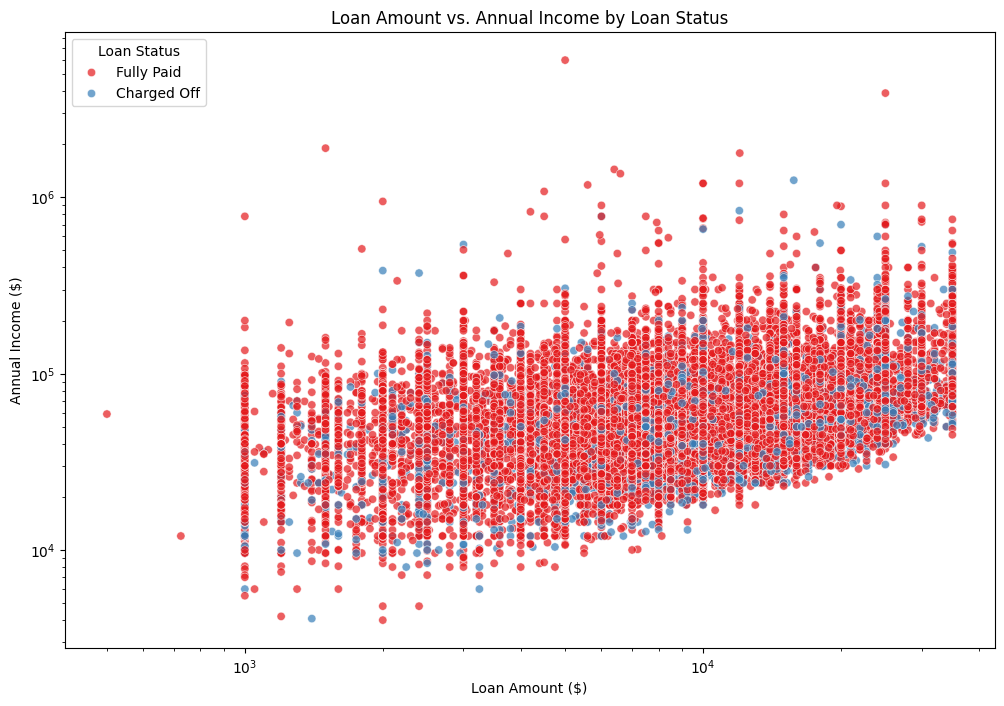

In [179]:
plt.figure(figsize=(12, 8))

# Create a scatter plot to visualize the relationship between loan amount, annual income, and loan status
sns.scatterplot(x='loan_amnt', y='annual_inc', hue='loan_status', data=df_filtered, palette='Set1', alpha=0.7)

plt.title('Loan Amount vs. Annual Income by Loan Status')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')  # Use log scale for income to manage wide range of values
plt.xscale('log')  # Use log scale for loan amount if there's a wide range
plt.legend(title='Loan Status')
plt.show()

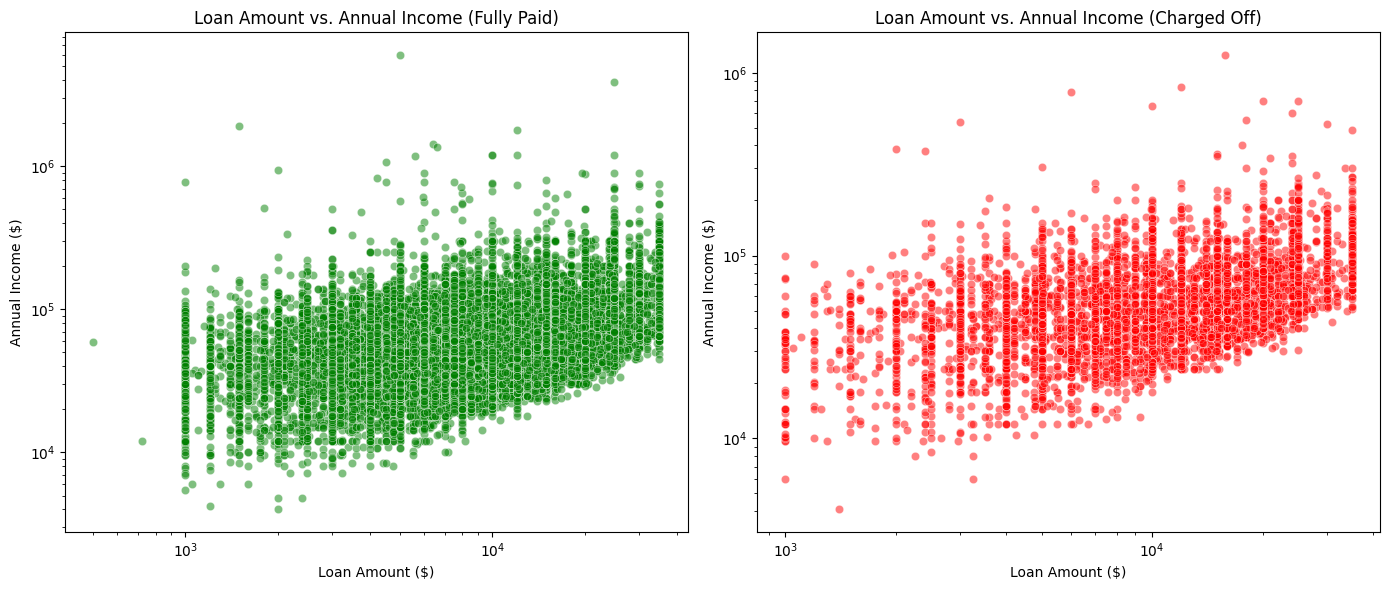

In [180]:
# Separate the data by loan status
fully_paid_df = df_filtered[df_filtered['loan_status'] == 'Fully Paid']
charged_off_df = df_filtered[df_filtered['loan_status'] == 'Charged Off']

# Create a figure with subplots for side-by-side comparison
plt.figure(figsize=(14, 6))

# Subplot 1: Fully Paid Loans
plt.subplot(1, 2, 1)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=fully_paid_df, color='green', alpha=0.5)
plt.title('Loan Amount vs. Annual Income (Fully Paid)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.xscale('log')

# Subplot 2: Charged Off Loans
plt.subplot(1, 2, 2)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=charged_off_df, color='red', alpha=0.5)
plt.title('Loan Amount vs. Annual Income (Charged Off)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.xscale('log')

# Display the plots
plt.tight_layout()
plt.show()

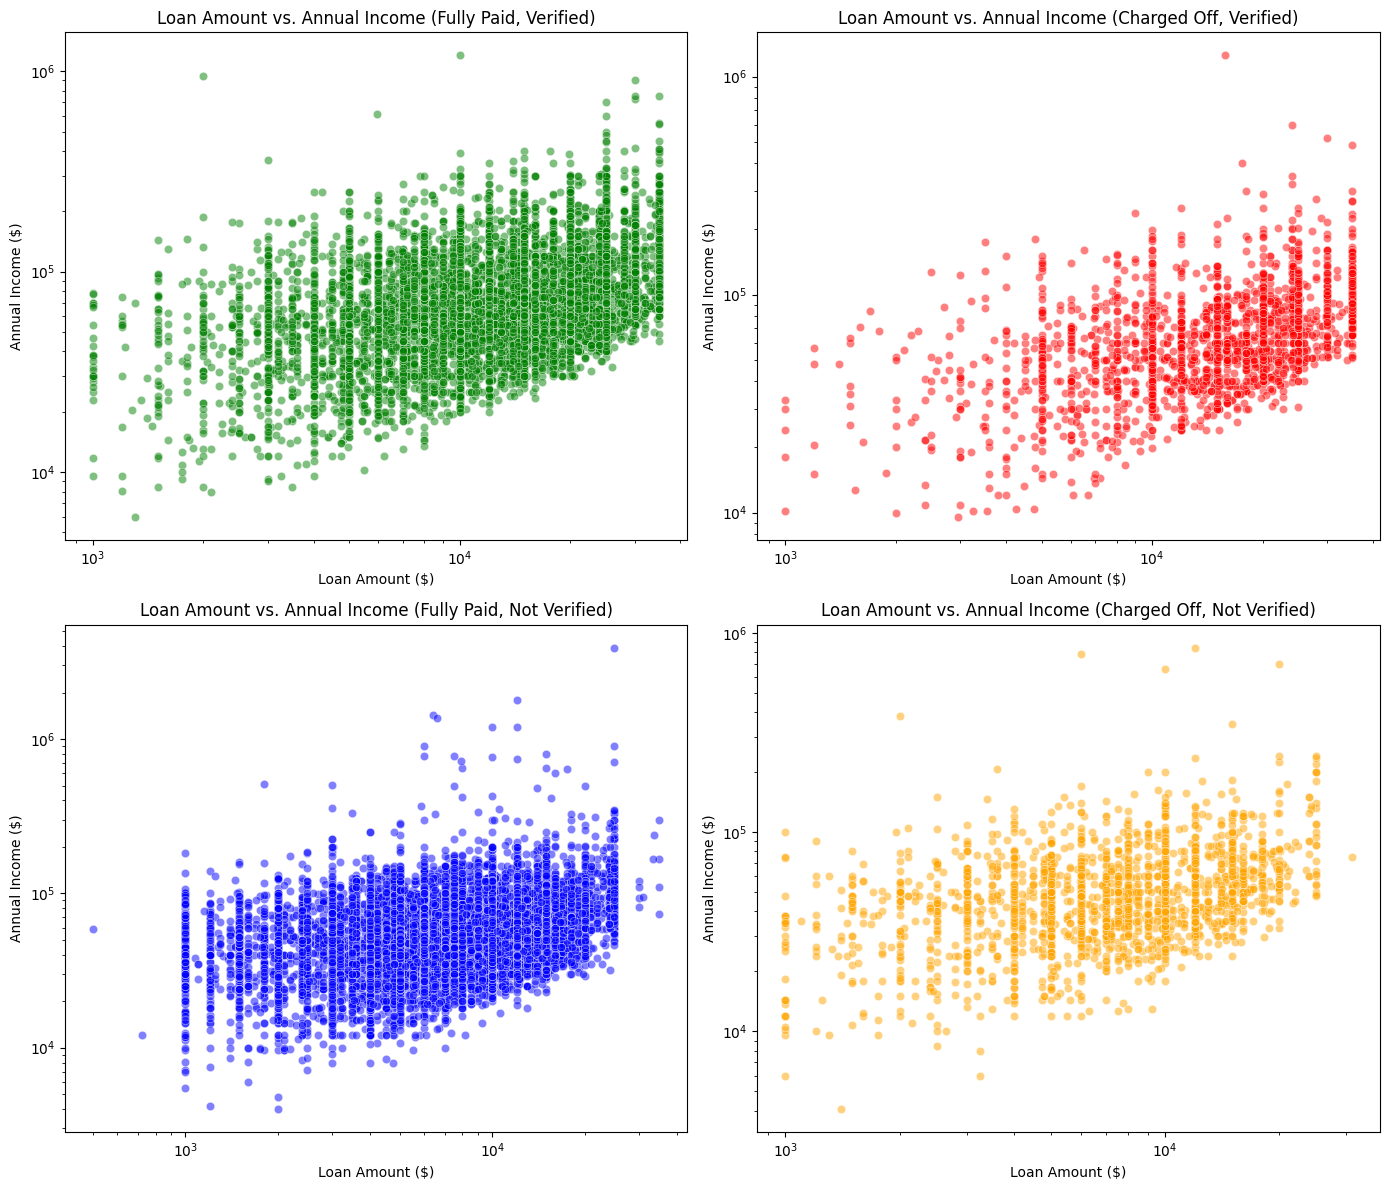

In [181]:
##### 9.4.2 [Segmented analysis] Annual income, loan amount by Loan Status with segmentation of verified and non-verified incomes


# Segment 1: Fully Paid Loans with Verified Income
fully_paid_verified_df = df_filtered[(df_filtered['loan_status'] == 'Fully Paid') & 
                                     (df_filtered['verification_status'] == 'Verified')]

# Segment 2: Charged Off Loans with Verified Income
charged_off_verified_df = df_filtered[(df_filtered['loan_status'] == 'Charged Off') & 
                                      (df_filtered['verification_status'] == 'Verified')]

# Segment 3: Fully Paid Loans with Non-Verified Income
fully_paid_non_verified_df = df_filtered[(df_filtered['loan_status'] == 'Fully Paid') & 
                                         (df_filtered['verification_status'] == 'Not Verified')]

# Segment 4: Charged Off Loans with Non-Verified Income
charged_off_non_verified_df = df_filtered[(df_filtered['loan_status'] == 'Charged Off') & 
                                          (df_filtered['verification_status'] == 'Not Verified')]

# Create a figure with subplots for side-by-side comparison
plt.figure(figsize=(14, 12))

# Subplot 1: Fully Paid Loans with Verified Income
plt.subplot(2, 2, 1)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=fully_paid_verified_df, color='green', alpha=0.5)
plt.title('Loan Amount vs. Annual Income (Fully Paid, Verified)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.xscale('log')

# Subplot 2: Charged Off Loans with Verified Income
plt.subplot(2, 2, 2)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=charged_off_verified_df, color='red', alpha=0.5)
plt.title('Loan Amount vs. Annual Income (Charged Off, Verified)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.xscale('log')

# Subplot 3: Fully Paid Loans with Non-Verified Income
plt.subplot(2, 2, 3)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=fully_paid_non_verified_df, color='blue', alpha=0.5)
plt.title('Loan Amount vs. Annual Income (Fully Paid, Not Verified)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.xscale('log')

# Subplot 4: Charged Off Loans with Non-Verified Income
plt.subplot(2, 2, 4)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=charged_off_non_verified_df, color='orange', alpha=0.5)
plt.title('Loan Amount vs. Annual Income (Charged Off, Not Verified)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Annual Income ($)')
plt.yscale('log')
plt.xscale('log')

# Display the plots
plt.tight_layout()
plt.show()


##### 9.4.3 Results of  Annual income, loan amount by Loan Status.
The plot shows a dense concentration of data points across a wide range of loan amounts and annual incomes, with both "Fully Paid" and "Charged Off" loans spread throughout. This suggests that neither loan amount nor annual income alone is a strong predictor of loan default when visualized together like this

#### 9.5 Debt-to-Income Ratio (DTI) by Loan Status.

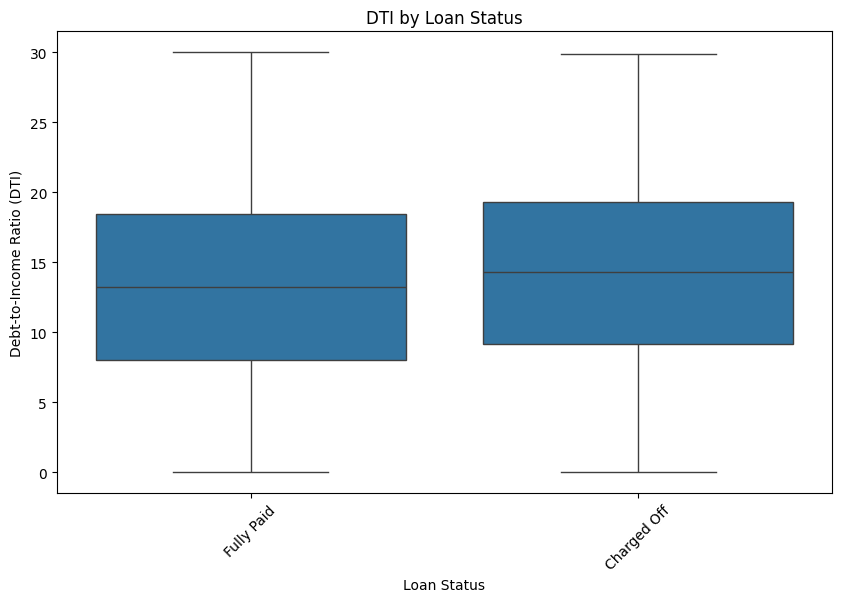

In [182]:
# Create a box plot to visualize the distribution of DTI by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df_filtered)
plt.title('DTI by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

##### 9.5.1 Results of Debt-to-Income Ratio (DTI) by Loan Status.
The box plots show that the Debt-to-Income (DTI) ratios for both "Fully Paid" and "Charged Off" loans are quite similar.
Both distributions have a similar median and interquartile range (IQR), with no significant differences observed between the two groups.

#### 9.6 Number of Inquiries in the Last 6 Months by Loan Status.

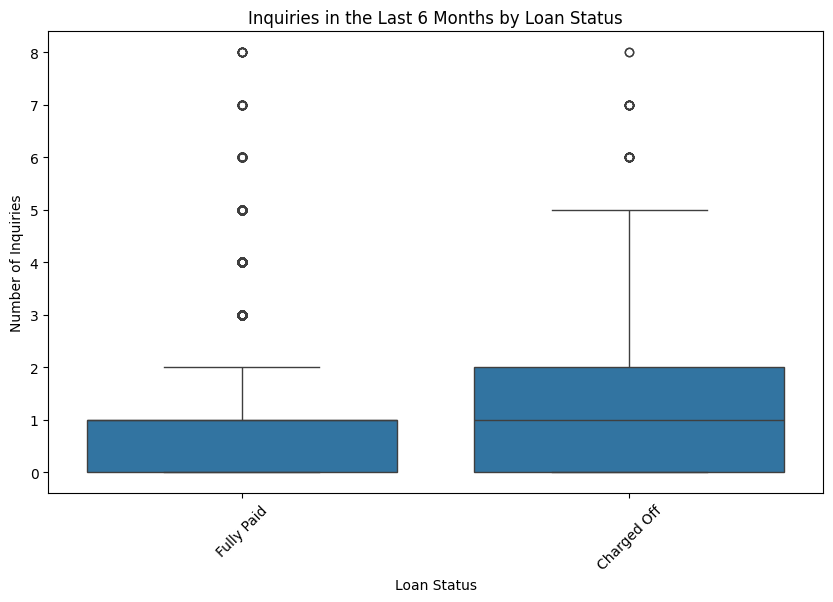

In [183]:
# Create a box plot to visualize the distribution of inquiries in the last 6 months by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='inq_last_6mths', data=df_filtered)
plt.title('Inquiries in the Last 6 Months by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Inquiries')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

##### 9.6.1 Results of Number of Inquiries in the Last 6 Months by Loan Status.
The box plot shows that the number of credit inquiries in the last 6 months tends to be slightly higher for borrowers who "Charged Off" compared to those who "Fully Paid" their loans.

Let's combine this with other variables to do more detailed analysis in multi-variate analysis to figure out the comprehensive risk profile.

#### 9.7 Public Records and Bankruptcies by Loan Status.

Public Records by Loan Status stats:
              count      mean       std  min  25%  50%  75%  max
loan_status                                                     
Charged Off   459.0  1.021786  0.146145  1.0  1.0  1.0  1.0  2.0
Fully Paid   1580.0  1.035443  0.225110  1.0  1.0  1.0  1.0  4.0


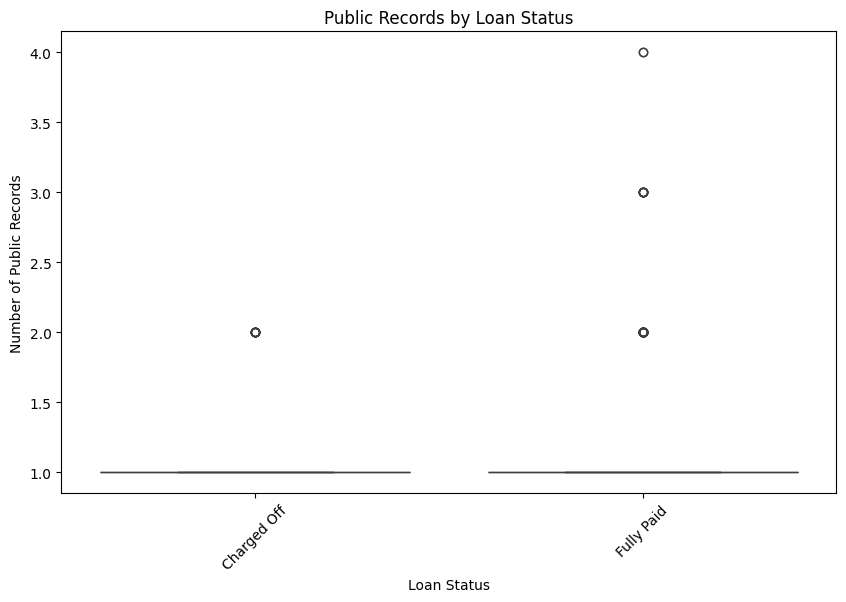

pub_rec_bankruptcies by Loan Status stats:
              count      mean       std  min  25%  50%  75%  max
loan_status                                                     
Charged Off   366.0  1.005464  0.073821  1.0  1.0  1.0  1.0  2.0
Fully Paid   1267.0  1.002368  0.048622  1.0  1.0  1.0  1.0  2.0


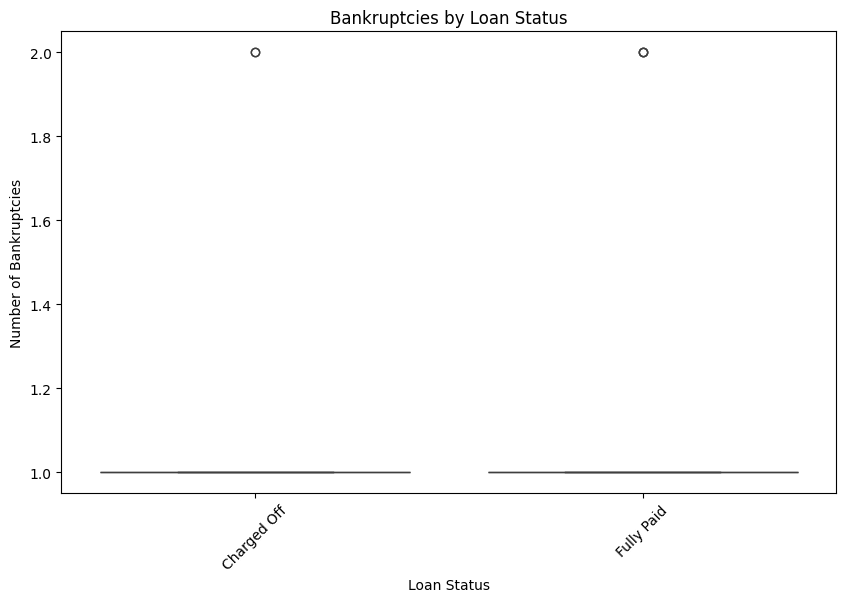

In [184]:
df_pub_rec = df_filtered[df_filtered['pub_rec'] > 0]
df_pub_rec_description = df_pub_rec.groupby('loan_status')['pub_rec'].describe()
print('Public Records by Loan Status stats:')
print(df_pub_rec_description)

# Create a box plot to visualize the distribution of public records by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='pub_rec', data=df_pub_rec)
plt.title('Public Records by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Public Records')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

df_bankruptcies = df_filtered[df_filtered['pub_rec_bankruptcies'] > 0]
df_bankruptcies_description = df_bankruptcies.groupby('loan_status')['pub_rec_bankruptcies'].describe() 
print('pub_rec_bankruptcies by Loan Status stats:')
print(df_bankruptcies_description)
#Create a box plot to visualize the distribution of bankruptcies by loan status

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=df_bankruptcies)
plt.title('Bankruptcies by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Bankruptcies')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()



##### 9.7 Results of Public Records and Bankruptcies by Loan Status.
The fact that both "Fully Paid" and "Charged Off" loans are represented equally among those with multiple bankruptcies suggests that having more than one bankruptcy might not be a strong predictor of loan default in this dataset.

#### 9.7 Employment Length by Loan Status.


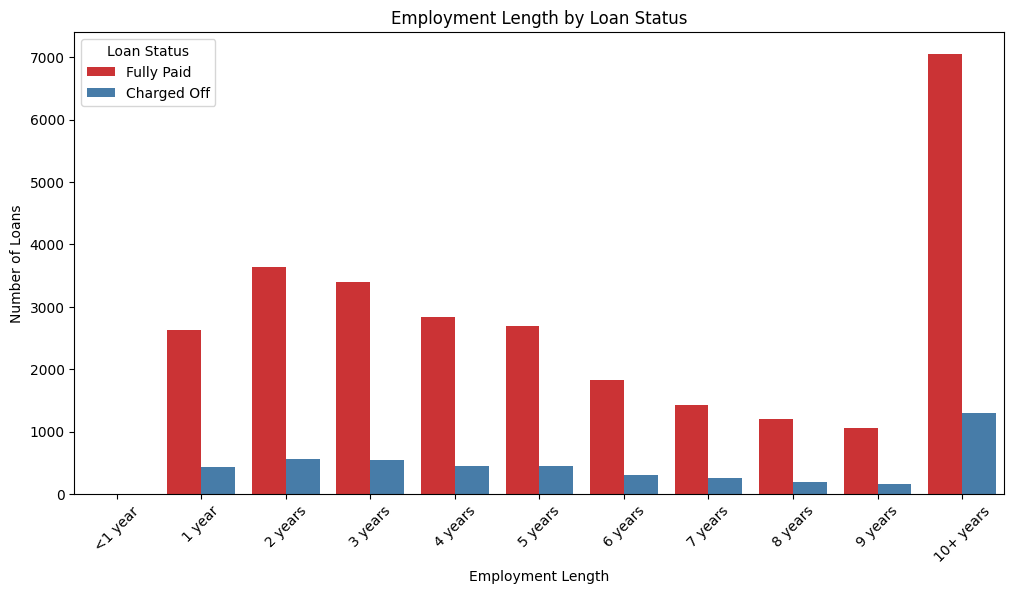

In [185]:
# Create a count plot to visualize the distribution of employment length by loan status
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', hue='loan_status', data=df_filtered, palette='Set1')
plt.title('Employment Length by Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Loan Status')
plt.show()


/var/folders/kl/lhs7mp5s1ml8g684db055ckm0000gq/T/ipykernel_46429/1360943017.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_status_proportion = df_filtered.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()


<Figure size 1200x600 with 0 Axes>

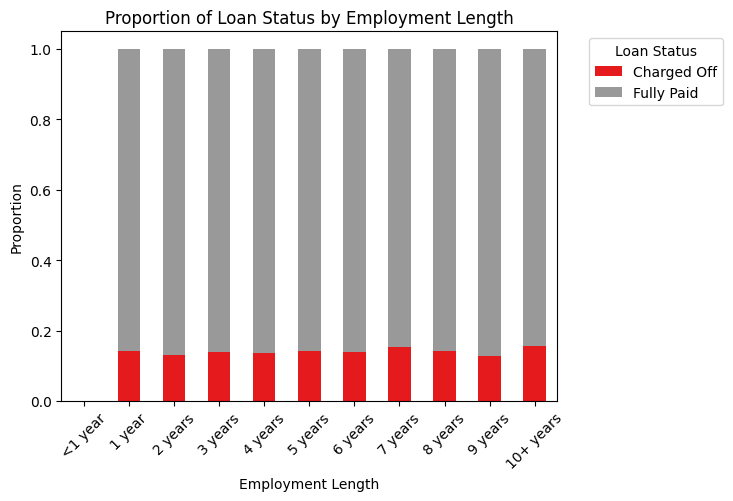

In [186]:
# Plot the proportions
loan_status_proportion = df_filtered.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()
plt.figure(figsize=(12, 6))
loan_status_proportion.plot(kind='bar', stacked=True, colormap='Set1')

plt.title('Proportion of Loan Status by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 9.7.1 Results of Employment Length by Loan Status.

Employment length does not appear to be a strong predictor of loan default. The similar proportions across categories indicate that other factors may be more influential in determining whether a borrower will default. In other words, borrowers with different lengths of employment history seem to have similar probabilities of defaulting on their loans.

#### 9.8 [Segmented Analysis] : To explore the relationship between income and loan status, segmented by whether the borrower's income was verified or not. 


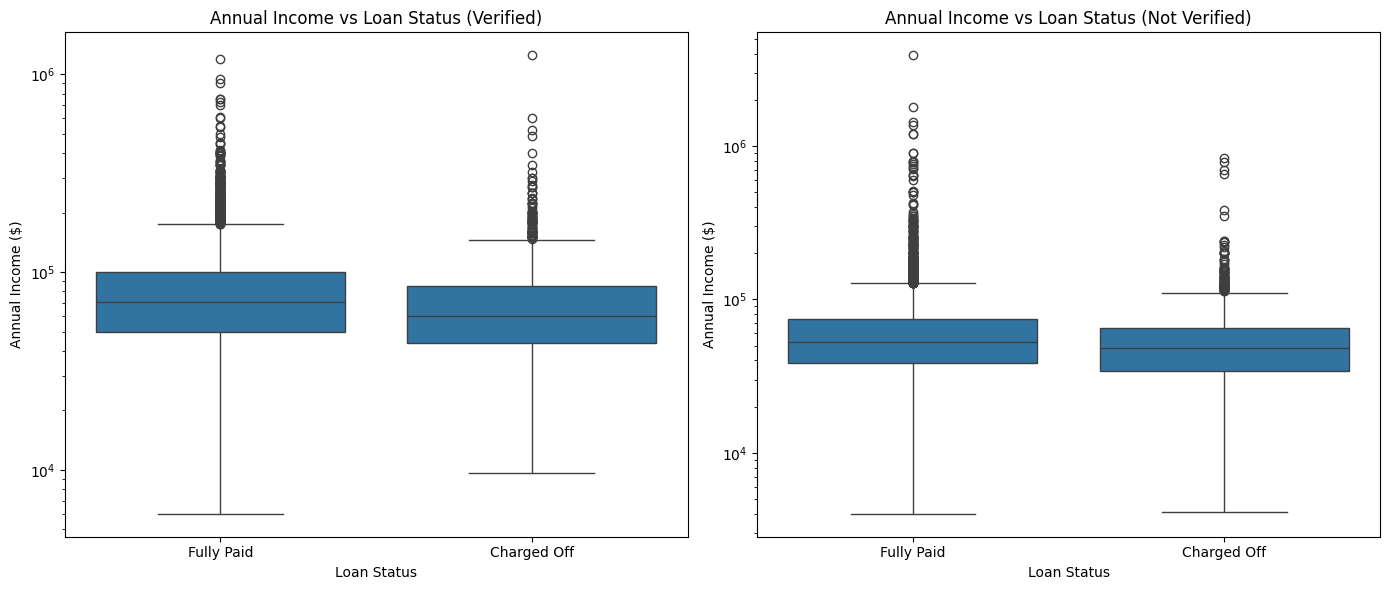

In [187]:
# Segment 1: Verified Income
verified_data = df_filtered[df_filtered['verification_status'] == 'Verified']

# Segment 2: Not Verified Income
not_verified_data = df_filtered[df_filtered['verification_status'] == 'Not Verified']

# Plot 1: Income vs Loan Status for Verified Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='annual_inc', data=verified_data)
plt.title('Annual Income vs Loan Status (Verified)')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.yscale('log')

# Plot 2: Income vs Loan Status for Not Verified Income
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='annual_inc', data=not_verified_data)
plt.title('Annual Income vs Loan Status (Not Verified)')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income ($)')
plt.yscale('log')

plt.tight_layout()
plt.show()

#### 9.9  Delinquency (delinq_2yrs) by Loan Status


<Figure size 1200x800 with 0 Axes>

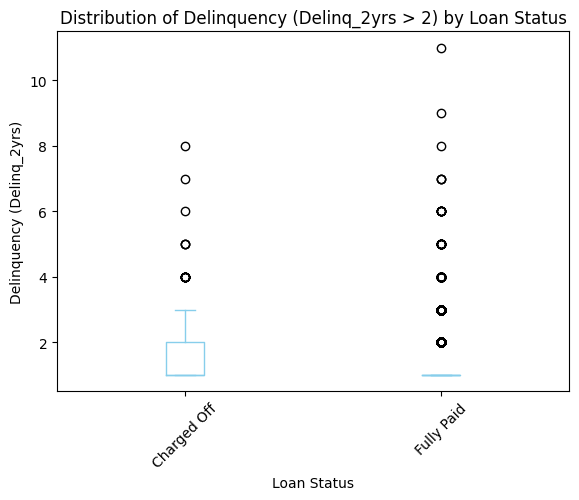

In [188]:
# Create a box plot
# Filter data where delinq_2yrs > 0
df_filtered_high_delinquency = df_filtered[df_filtered['delinq_2yrs'] > 0]

# Create a box plot
plt.figure(figsize=(12, 8))
df_filtered_high_delinquency.boxplot(column='delinq_2yrs', by='loan_status', grid=False, color='skyblue')

plt.title('Distribution of Delinquency (Delinq_2yrs > 2) by Loan Status')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Loan Status')
plt.ylabel('Delinquency (Delinq_2yrs)')
plt.xticks(rotation=45)
plt.show()

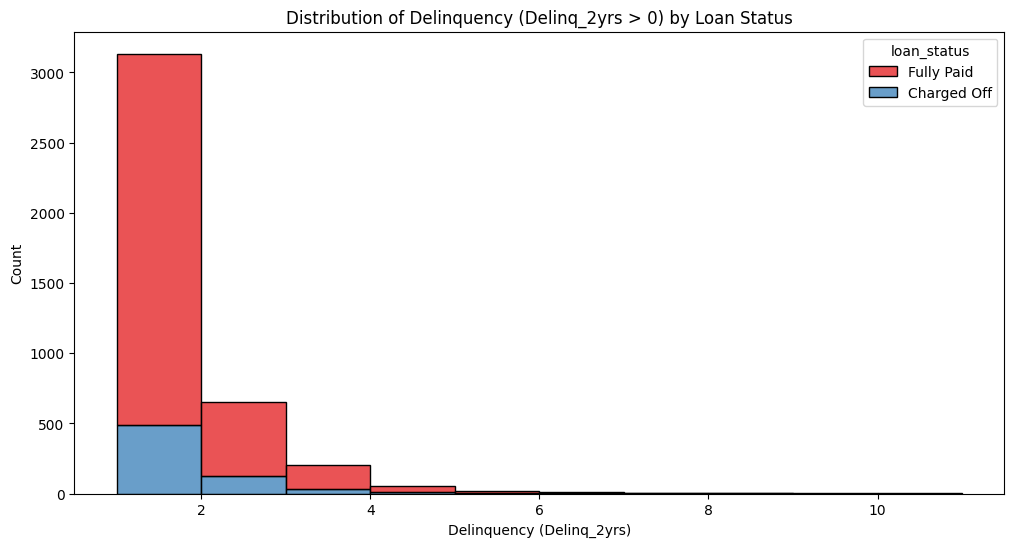

In [189]:
# Filter data where delinq_2yrs > 0
df_nonzero_delinquency = df_filtered[df_filtered['delinq_2yrs'] > 0]

# Create a histogram of delinq_2yrs by loan status
plt.figure(figsize=(12, 6))
sns.histplot(data=df_nonzero_delinquency, x='delinq_2yrs', hue='loan_status', multiple='stack', binwidth=1, palette='Set1')

plt.title('Distribution of Delinquency (Delinq_2yrs > 0) by Loan Status')
plt.xlabel('Delinquency (Delinq_2yrs)')
plt.ylabel('Count')
plt.show()

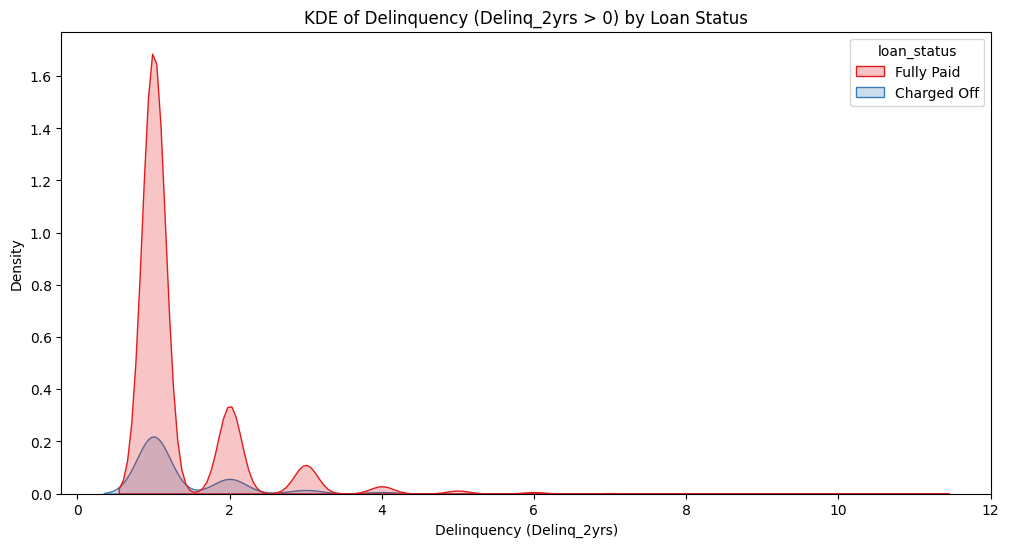

In [190]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_nonzero_delinquency, x='delinq_2yrs', hue='loan_status', fill=True, palette='Set1')

plt.title('KDE of Delinquency (Delinq_2yrs > 0) by Loan Status')
plt.xlabel('Delinquency (Delinq_2yrs)')
plt.ylabel('Density')
plt.show()

##### 9.9.1  Delinquency (delinq_2yrs) by Loan Status with delinquency > 0
* This view focuses on loans that have experienced some level of delinquency, providing a clearer comparison between delinquent loans in different statuses.
* Higher Delinquency in Charged-Off Loans: 75th Percentile of Charged-Off Loans: A value of 2 means that 75% of charged-off loans have 2 or fewer delinquencies, but a significant portion may have more.

* Lower Delinquency in Fully Paid Loans: 75th Percentile of Fully Paid Loans: A value of 1 means that 75% of fully paid loans have 1 or fewer delinquencies.

#### 9.10 earliest credit line by Loan Status


/var/folders/kl/lhs7mp5s1ml8g684db055ckm0000gq/T/ipykernel_46429/2177979446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['earliest_cr_line_age'] = (df_filtered['issue_d'] - df_filtered['earliest_cr_line']).dt.days / 365


<Figure size 1200x800 with 0 Axes>

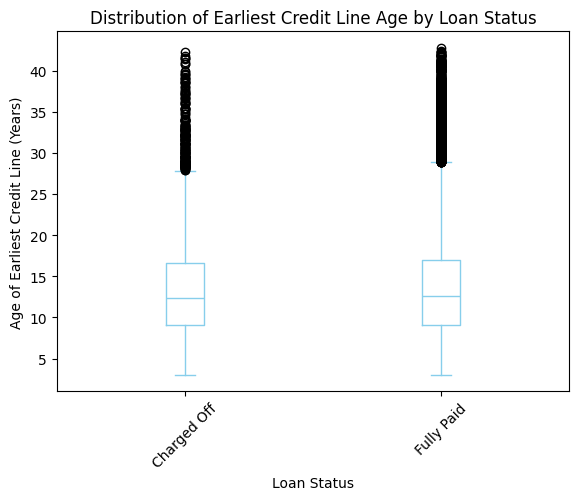

In [191]:
# Calculate the age of the earliest credit line
df_filtered['earliest_cr_line_age'] = (df_filtered['issue_d'] - df_filtered['earliest_cr_line']).dt.days / 365

# Create a box plot
plt.figure(figsize=(12, 8))
df_filtered.boxplot(column='earliest_cr_line_age', by='loan_status', grid=False, color='skyblue')

plt.title('Distribution of Earliest Credit Line Age by Loan Status')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Loan Status')
plt.ylabel('Age of Earliest Credit Line (Years)')
plt.xticks(rotation=45)
plt.show()

##### 9.10.1 Results of earliest credit line by Loan Status

analysis shows that the age of the earliest credit line is similar across different loan statuses and does not reveal any significant patterns

#### 9.11 Revolving Utilization Rate by Loan Status


<Figure size 1200x800 with 0 Axes>

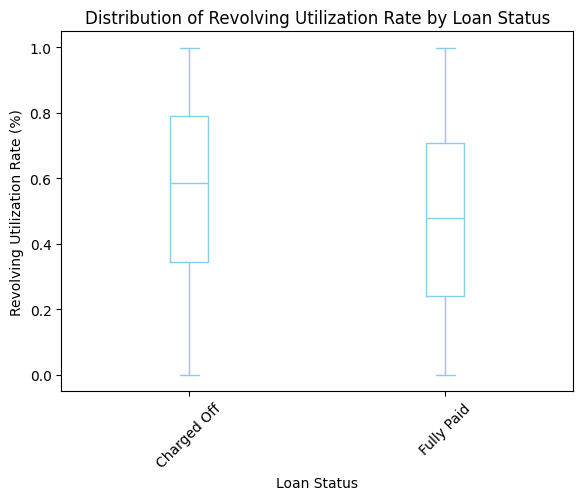

In [192]:
# Create a box plot
plt.figure(figsize=(12, 8))
df_filtered.boxplot(column='revol_util', by='loan_status', grid=False, color='skyblue')

plt.title('Distribution of Revolving Utilization Rate by Loan Status')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Loan Status')
plt.ylabel('Revolving Utilization Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [193]:
# Calculate summary statistics for revol_util by loan status
summary_stats = df_filtered.groupby('loan_status')['revol_util'].describe()
print(summary_stats)

               count      mean       std  min    25%    50%    75%    max
loan_status                                                              
Charged Off   5476.0  0.557225  0.278605  0.0  0.345  0.587  0.791  0.999
Fully Paid   32270.0  0.476777  0.282479  0.0  0.241  0.478  0.709  0.999


##### 9.11.1 Results of Revolving Utilization Rate by Loan Status

* Charged-off loans have a higher average revolving utilization rate (0.557) compared to fully paid loans (0.477). This suggests that borrowers with higher utilization rates are more likely to have their loans charged off.
* Percentiles:
    25th Percentile: Charged-off loans have a higher 25th percentile (0.345) compared to fully paid loans (0.241), indicating that even at lower utilization rates, charged-off loans tend to have higher values.
    50th Percentile (Median): Charged-off loans have a median of 0.587 compared to 0.478 for fully paid loans, reinforcing that higher utilization rates are associated with charged-off loans.
    75th Percentile: Charged-off loans have a higher 75th percentile (0.791) compared to fully paid loans (0.709), further indicating that high utilization rates are more common in charged-off loans.

The analysis suggests that borrowers with higher revolving utilization rates are more likely to have their loans charged off. This insight can be useful for credit risk assessment and management. If you need any additional analysis or visualizations, just let me know!

#### 9.12 Loan Term by Loan Status


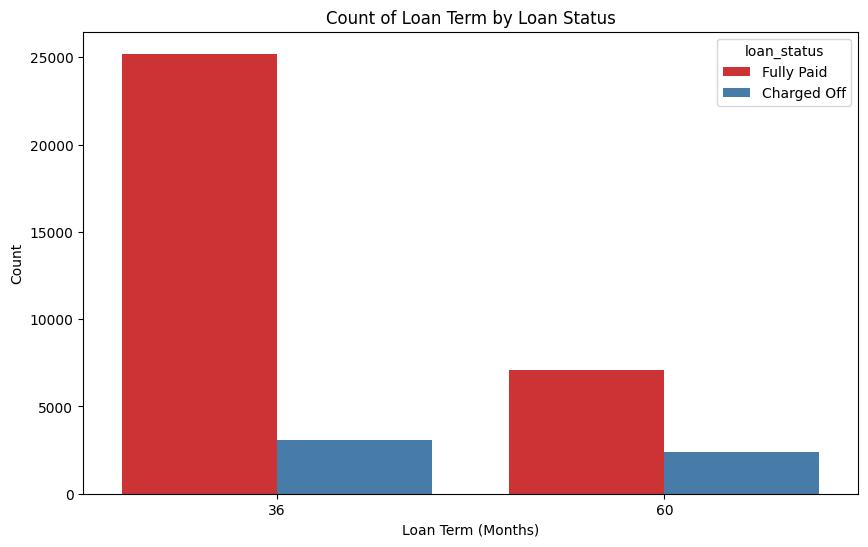

In [194]:
# Create a bar plot for loan term by loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='term', hue='loan_status', palette='Set1')

plt.title('Count of Loan Term by Loan Status')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.show()

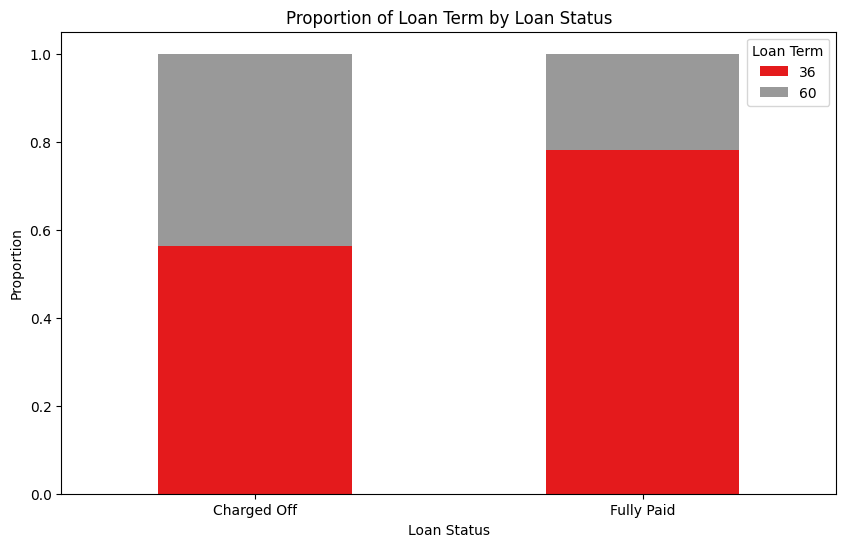

In [195]:
# Calculate proportions
term_proportions = df_filtered.groupby(['loan_status', 'term']).size().unstack().fillna(0)
term_proportions = term_proportions.div(term_proportions.sum(axis=1), axis=0)

# Create a bar plot for loan term proportions by loan status
plt.figure(figsize=(10, 6))
term_proportions.plot(kind='bar', stacked=True, colormap='Set1', ax=plt.gca())

plt.title('Proportion of Loan Term by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Loan Term')
plt.show()

In [196]:
# Summary statistics for loan term by loan status
summary_stats = df_filtered.groupby('loan_status')['term'].value_counts(normalize=True).unstack().fillna(0)
summary_stats = summary_stats.rename_axis(None).reset_index()
print(summary_stats)

term        index        36        60
0     Charged Off  0.563733  0.436267
1      Fully Paid  0.780973  0.219027


##### 9.12.1 Result of Loan Term by Loan Status

The analysis reveals that fully paid loans are more likely to have a 36-month term compared to charged-off loans, which are more evenly distributed between the two terms. This might suggest that shorter loan terms are less risky or more manageable, leading to a higher rate of full repayment.

#### 9.13 mths_since_last_delinq by loan status

<Figure size 1200x800 with 0 Axes>

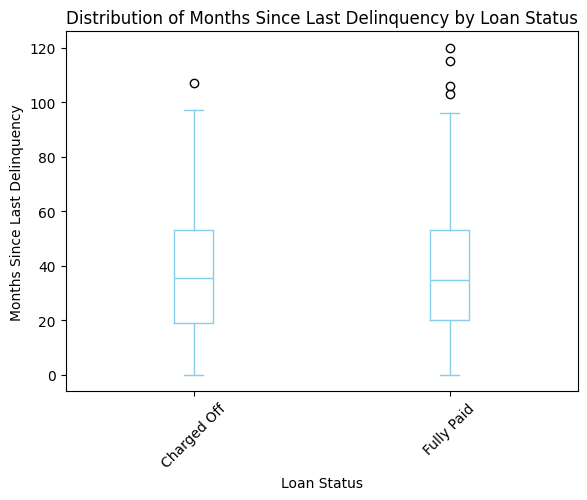

In [197]:
# Filter out entries where mths_since_last_delinq is 99999 since it represents no delinq for a customer
df_filtered_no_delinq = df_filtered[df_filtered['mths_since_last_delinq'] != 99999]

# Create a box plot for mths_since_last_delinq
plt.figure(figsize=(12, 8))
df_filtered_no_delinq.boxplot(column='mths_since_last_delinq', by='loan_status', grid=False, color='skyblue')

plt.title('Distribution of Months Since Last Delinquency by Loan Status')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Loan Status')
plt.ylabel('Months Since Last Delinquency')
plt.xticks(rotation=45)
plt.show()

In [198]:


# Calculate summary statistics for mths_since_last_delinq by loan status
summary_stats = df_filtered_no_delinq.groupby('loan_status')['mths_since_last_delinq'].describe()
print(summary_stats)

               count       mean        std  min   25%   50%   75%    max
loan_status                                                             
Charged Off   2016.0  37.350198  22.123932  0.0  19.0  35.5  53.0  107.0
Fully Paid   10922.0  37.016847  21.256495  0.0  20.0  35.0  53.0  120.0


##### 9.13.1 Result of mths_since_last_delinq by Loan Status

The similar statistical profiles suggest that the timing of the last delinquency does not significantly differentiate between charged-off and fully paid loans. This means that, based on this feature alone, there isn't a strong distinction between the two loan statuses.

#### 9.14 Open Accounts and Total Accounts by Loan Status

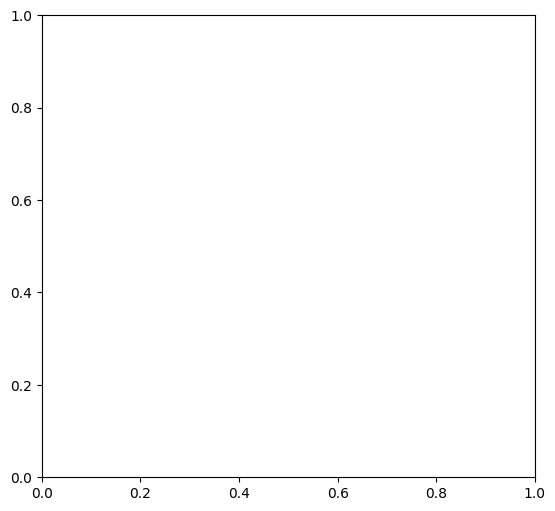

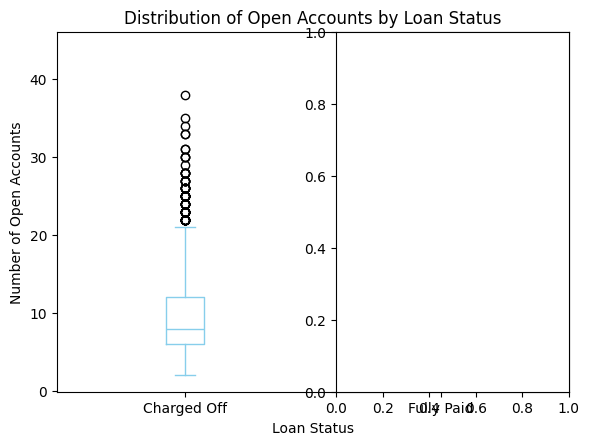

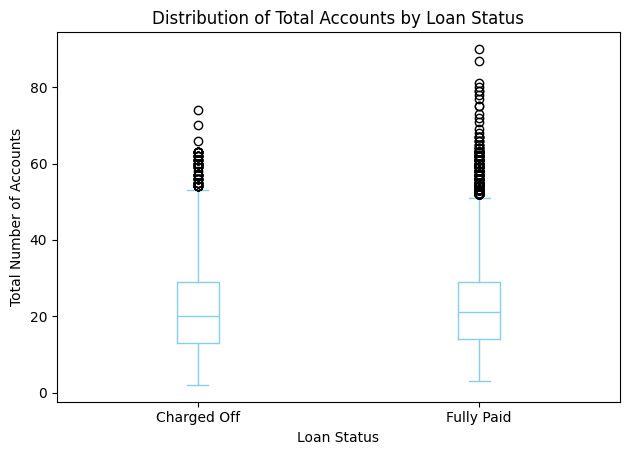

In [199]:
# Create a box plot for open_acc
plt.figure(figsize=(14, 6))

# Open Accounts
plt.subplot(1, 2, 1)
df_filtered.boxplot(column='open_acc', by='loan_status', grid=False, color='skyblue')
plt.title('Distribution of Open Accounts by Loan Status')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Loan Status')
plt.ylabel('Number of Open Accounts')

# Total Accounts
plt.subplot(1, 2, 2)
df_filtered.boxplot(column='total_acc', by='loan_status', grid=False, color='skyblue')
plt.title('Distribution of Total Accounts by Loan Status')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Loan Status')
plt.ylabel('Total Number of Accounts')

plt.tight_layout()
plt.show()

In [200]:
# Statistical summary for open_acc and total_acc by loan status
summary_stats_open_acc = df_filtered.groupby('loan_status')['open_acc'].describe()
summary_stats_total_acc = df_filtered.groupby('loan_status')['total_acc'].describe()

print("Summary Statistics for Open Accounts:")
print(summary_stats_open_acc)

print("\nSummary Statistics for Total Accounts:")
print(summary_stats_total_acc)

Summary Statistics for Open Accounts:
               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   5476.0  9.183346  4.497710  2.0  6.0  8.0  12.0  38.0
Fully Paid   32270.0  9.291261  4.360628  2.0  6.0  9.0  12.0  44.0

Summary Statistics for Total Accounts:
               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   5476.0  21.496530  11.431215  2.0  13.0  20.0  29.0  74.0
Fully Paid   32270.0  22.210908  11.406489  3.0  14.0  21.0  29.0  90.0


##### 9.14.1 Results of Open Accounts and Total Accounts by Loan Status
Overall, the statistics for both open_acc and total_acc are comparable between charged-off and fully paid loans. The slight differences in mean values and maximum ranges do not suggest a significant distinction in terms of the number of accounts between the two loan statuses.

#### 9.15 Verification status biverate analysis with loan status

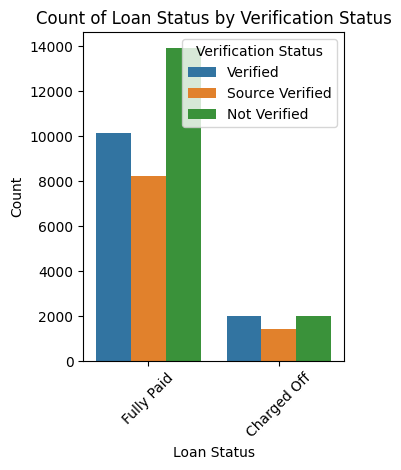

                     count unique         top   freq
verification_status                                 
Not Verified         15936      2  Fully Paid  13924
Source Verified       9648      2  Fully Paid   8220
Verified             12162      2  Fully Paid  10126


In [201]:
# Count Plot: Count of Loan Status by Verification Status
plt.subplot(1, 2, 2)
sns.countplot(x='loan_status', data=df_filtered, hue='verification_status')
plt.title('Count of Loan Status by Verification Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Verification Status', loc='upper right')
plt.tight_layout()
plt.show()

# Calculate descriptive statistics grouped by loan status and verification status
desc_stats = df_filtered.groupby(['verification_status'])['loan_status'].describe()
print(desc_stats)

##### 9.15.1 Results: Verification status biverate analysis with loan status
Across all verification_status categories, "Fully Paid" loans dominate, indicating that verification status does not drastically alter the likelihood of a loan being fully paid compared to other loan statuses.

#### 9.16 purpose biverate analysis with loan status

loan_status         Charged Off  Fully Paid
purpose                                    
car                         154        1319
credit_card                 532        4384
debt_consolidation         2705       15020
educational                  53         251
home_improvement            332        2479
house                        58         304
major_purchase              217        1901
medical                     104         565
moving                       89         476
other                       614        3125
renewable_energy             19          82
small_business              454        1239
vacation                     52         312
wedding                      93         813


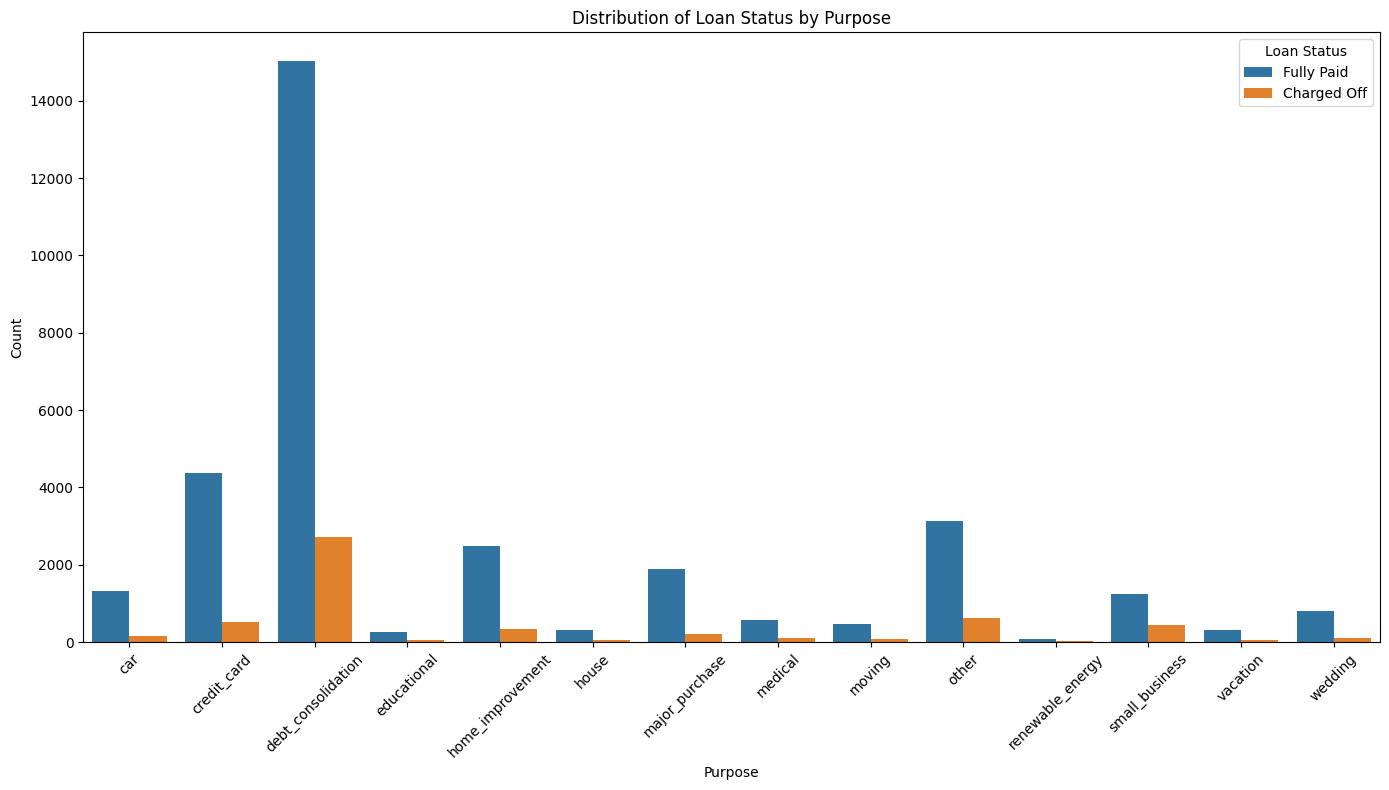

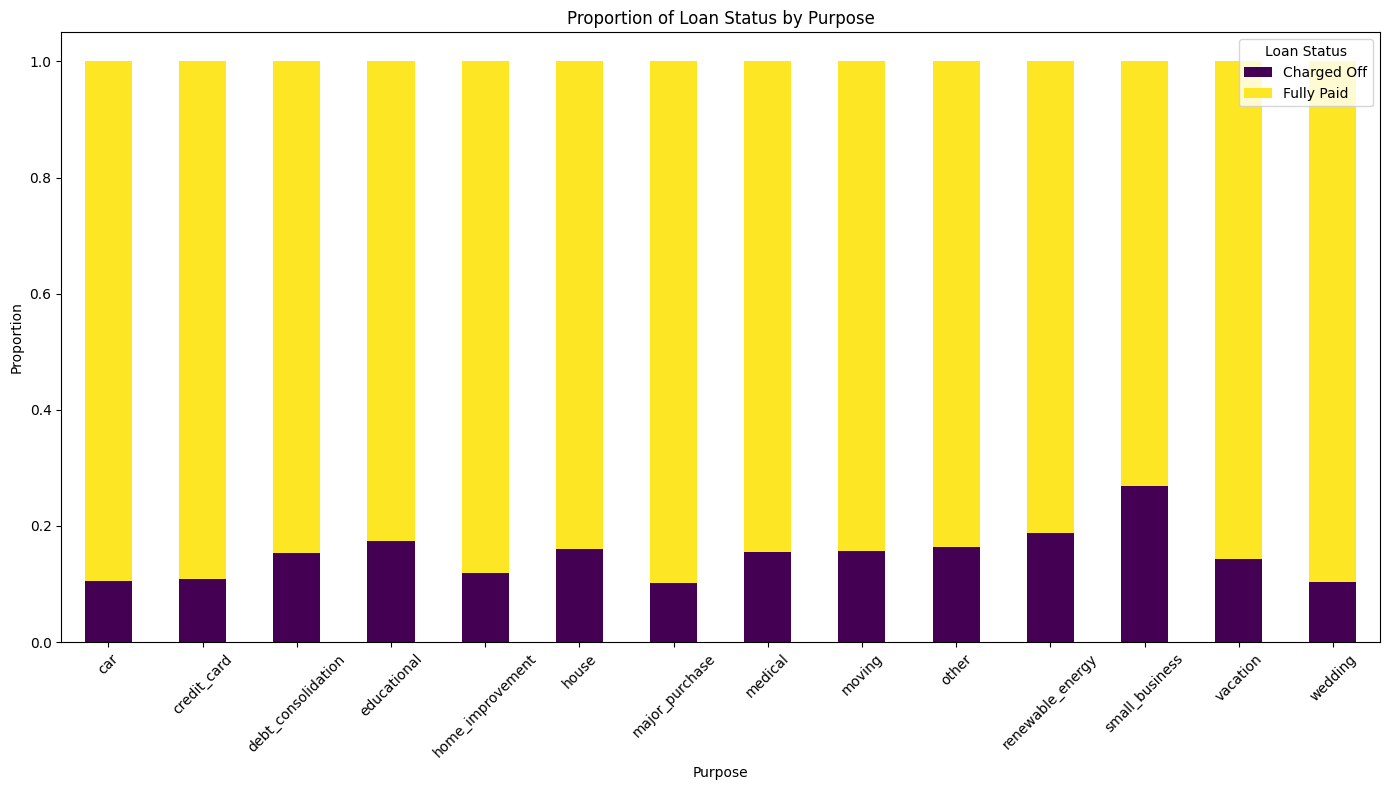

In [202]:
loan_status_counts = df_filtered.groupby('purpose')['loan_status'].value_counts().unstack().fillna(0)

# Print descriptive statistics of loan status counts grouped by purpose
print(loan_status_counts)

# Visualization 1: Count Plot - Distribution of Loan Status by Purpose
plt.figure(figsize=(14, 8))
sns.countplot(x='purpose', data=df_filtered, hue='loan_status', order=loan_status_counts.index)
plt.title('Distribution of Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

# Visualization 2: Proportion Plot - Proportions of Loan Status by Purpose
# Calculate the proportion of each loan status within each purpose
loan_status_proportions = loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0)

# Plot the proportions as a stacked bar chart
loan_status_proportions.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Proportion of Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

##### 9.16.1 Results: Purpose biverate analysis with loan status

The plot highlights that while most loans are paid in full regardless of purpose, certain categories like "Small Business" and "Renewable Energy" stand out as higher-risk investments. 

##### 9.17 addr_state biverate analysis with loan status


loan_status  Charged Off  Fully Paid
addr_state                          
AK                  15.0        62.0
AL                  53.0       374.0
AR                  27.0       202.0
AZ                 122.0       712.0
CA                1094.0      5744.0
CO                  94.0       648.0
CT                  92.0       624.0
DC                  14.0       192.0
DE                  11.0        98.0
FL                 482.0      2237.0
GA                 207.0      1126.0
HI                  28.0       136.0
IA                   0.0         1.0
ID                   0.0         4.0
IL                 194.0      1269.0
IN                   0.0         1.0
KS                  31.0       221.0
KY                  45.0       263.0
LA                  53.0       365.0
MA                 156.0      1101.0
MD                 155.0       840.0
MI                 101.0       591.0
MN                  78.0       518.0
MO                 111.0       543.0
MS                   2.0        17.0
M

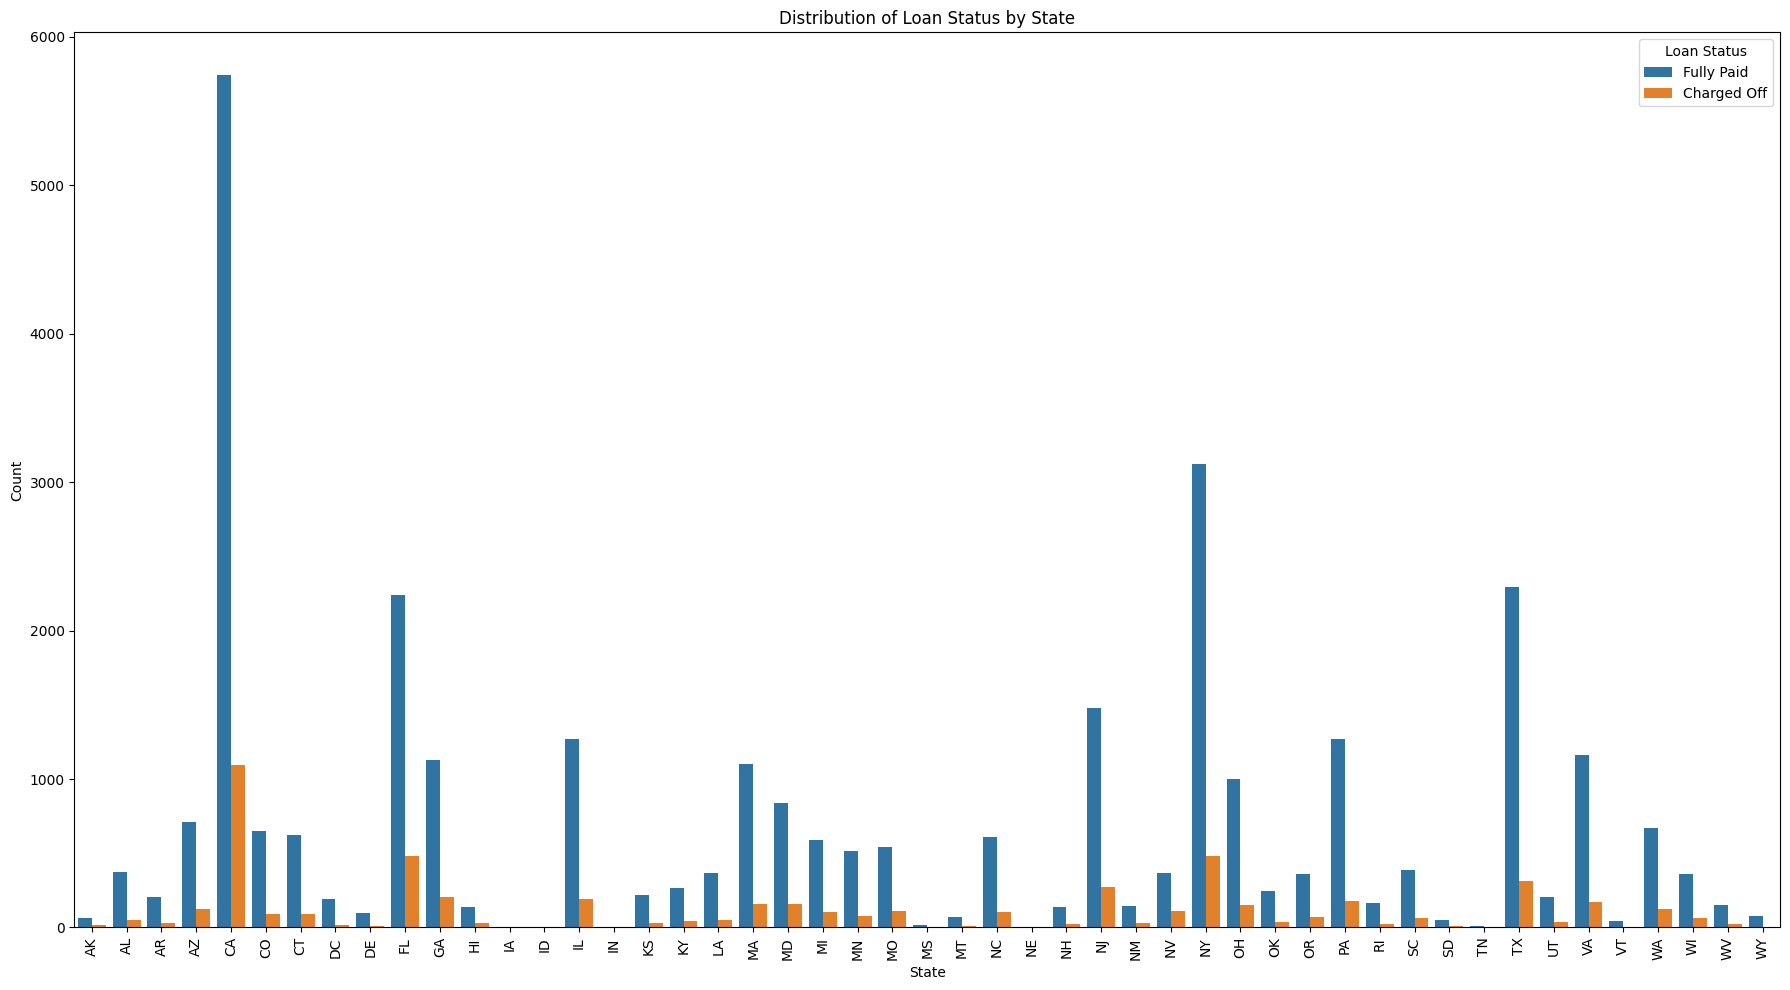

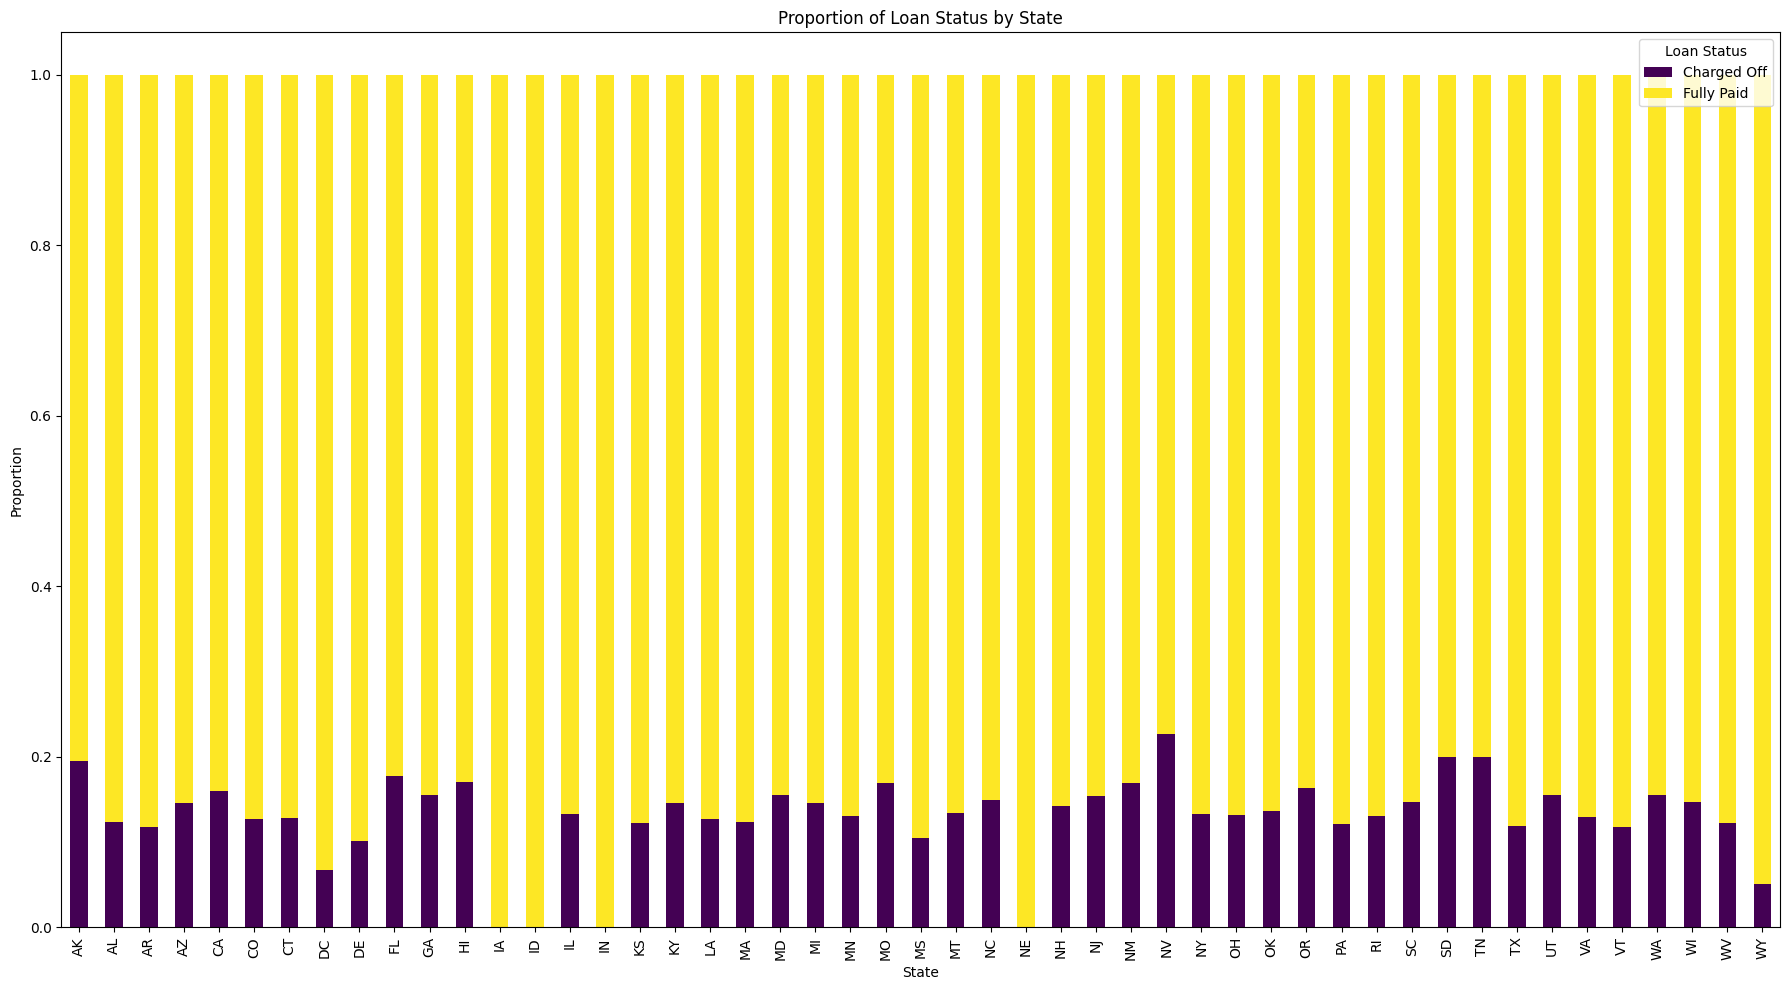

In [203]:
loan_status_counts_state = df_filtered.groupby('addr_state')['loan_status'].value_counts().unstack().fillna(0)

# Print descriptive statistics of loan status counts grouped by state
print(loan_status_counts_state)

# Visualization 1: Count Plot - Distribution of Loan Status by State
plt.figure(figsize=(18, 10))
sns.countplot(x='addr_state', data=df_filtered, hue='loan_status', order=loan_status_counts_state.index)
plt.title('Distribution of Loan Status by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

# Visualization 2: Proportion Plot - Proportions of Loan Status by State
# Calculate the proportion of each loan status within each state
loan_status_proportions_state = loan_status_counts_state.div(loan_status_counts_state.sum(axis=1), axis=0)

# Plot the proportions as a stacked bar chart
loan_status_proportions_state.plot(kind='bar', stacked=True, figsize=(18, 10), colormap='viridis')
plt.title('Proportion of Loan Status by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

##### 9.17.1 Results: addr_state biverate analysis with loan status
- California (CA), Florida (FL), and New York (NY) have higher counts of charged-off loans, but due to their large populations and economies, they also have high counts of fully paid loans.
- Nevada (NV) and Georgia (GA) show higher proportions of charged-off loans, making them higher-risk states relative to others.
- North Dakota (ND), South Dakota (SD), and Vermont (VT) have very low proportions of charged-off loans, suggesting a safer lending environment.

### 10. Derived metrics

#### 10.1 Credit score by following metrics:
The biverate analysis reveals key risk factors associated with loan defaults. Lower loan grades (D, E, F, and G) and sub-grades (e.g., C5, D5) significantly correlate with higher default rates, highlighting the importance of these factors in assessing loan risk. Borrowers with more credit inquiries in the last 6 months and higher revolving utilization rates (average 0.557 for charged-off loans vs. 0.477 for fully paid loans) are more likely to default, underscoring the need to monitor these metrics closely. Delinquency history also plays a critical role, with charged-off loans showing higher delinquency counts. Shorter loan terms (36 months) are generally safer, as longer terms are more evenly distributed between fully paid and charged-off loans. Purpose-based analysis identifies "Small Business" and "Renewable Energy" loans as higher-risk categories, while geographical analysis points to certain states (e.g., NV, GA) as having higher proportions of defaults, indicating a higher risk lending environment in these regions.

Next steps is to create a credit score by combining these factors with following code:

In [204]:
lendingCaseStudyDataFrameCleanedWithTypesCorrected['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [205]:


lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Grade'] = (
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['grade'].astype(str).map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}) - 1
) / 6
lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Inquiries'] = (
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'] / 
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['inq_last_6mths'].max()
)

lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Delinquencies'] = (
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'] / 
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['delinq_2yrs'].max()
)

lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Utilization'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['revol_util']  

lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Loan_Term'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['term'].map({36: 0, 60: 1})

purpose_risk_mapping = {
    'credit_card': 0.2,           # Low risk
    'car': 0.3,                   # Low to moderate risk
    'small_business': 1.0,        # High risk
    'other': 0.5,                 # Moderate risk
    'wedding': 0.3,               # Low to moderate risk
    'debt_consolidation': 0.3,    # Low risk
    'home_improvement': 0.2,      # Low risk
    'major_purchase': 0.3,        # Low to moderate risk
    'medical': 0.6,               # Moderate to high risk
    'moving': 0.4,                # Moderate risk
    'vacation': 0.4,              # Moderate risk
    'house': 0.5,                 # Moderate risk
    'renewable_energy': 0.8,      # High risk
    'educational': 0.6            # Moderate to high risk
}
lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Purpose_Risk'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['purpose'].map(purpose_risk_mapping).fillna(0.3)

# Map states to risk factors based on historical charge-off rates
state_risk_mapping = {
    'CA': 0.8,
    'FL': 0.7,
    'NY': 0.6,
    'NV': 0.9,
    'GA': 0.75,
    'ND': 0.2,
    'SD': 0.2,
    'VT': 0.2,
}
lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_State_Risk'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['addr_state'].map(state_risk_mapping).fillna(0.2)

# Weights 1: Assign weights and calculate the Credit Risk Score
# weights = {
#     'Standardized_Grade': 0.20,
#     'Standardized_Inquiries': 0.20,
#     'Standardized_Delinquencies': 0.15,
#     'Standardized_Utilization': 0.15,
#     'Standardized_Loan_Term': 0.05,
#     'Standardized_Purpose_Risk': 0.15,
#     'Standardized_State_Risk': 0.10
# }

# Weights2: Fine-tuned weights for Credit Risk Score calculation
# weights = {
#     'Standardized_Grade': 0.18,            # Slightly reduced to balance other factors
#     'Standardized_Inquiries': 0.15,        # Reduced to prioritize other stronger indicators
#     'Standardized_Delinquencies': 0.18,    # Increased to emphasize delinquency impact
#     'Standardized_Utilization': 0.18,      # Slightly increased due to its correlation with risk
#     'Standardized_Loan_Term': 0.06,        # Kept slightly higher to account for term differences
#     'Standardized_Purpose_Risk': 0.20,     # Increased to reflect purpose's significant impact on risk
#     'Standardized_State_Risk': 0.05        # Reduced slightly to adjust for other higher-impact factors
# }
# Weights3 : Fine-tuned weights for Credit Risk Score calculation
weights = {
    'Standardized_Grade': 0.10,            # Slightly reduced to balance with other factors
    'Standardized_Inquiries': 0.10,        # Further reduced to emphasize stronger indicators
    'Standardized_Delinquencies': 0.20,    # Increased to reflect the importance of delinquency history
    'Standardized_Utilization': 0.20,      # Maintained as it correlates with financial stress
    'Standardized_Loan_Term': 0.05,        # Kept consistent as it has some influence
    'Standardized_Purpose_Risk': 0.30,     # Increased further to emphasize purpose
    'Standardized_State_Risk': 0.05        # Reduced to minimal to focus on stronger predictors
}



lendingCaseStudyDataFrameCleanedWithTypesCorrected['Credit_Risk_Score'] = (
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Grade'] * weights['Standardized_Grade'] +
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Inquiries'] * weights['Standardized_Inquiries'] +
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Delinquencies'] * weights['Standardized_Delinquencies'] +
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Utilization'] * weights['Standardized_Utilization'] +
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Loan_Term'] * weights['Standardized_Loan_Term'] +
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_Purpose_Risk'] * weights['Standardized_Purpose_Risk'] +
    lendingCaseStudyDataFrameCleanedWithTypesCorrected['Standardized_State_Risk'] * weights['Standardized_State_Risk']
)

# Display the calculated Credit Risk Score
print(lendingCaseStudyDataFrameCleanedWithTypesCorrected[['grade', 'inq_last_6mths', 'delinq_2yrs', 'revol_util', 'term', 'purpose', 'addr_state', 'Credit_Risk_Score']])


      grade  inq_last_6mths  delinq_2yrs  revol_util  term  \
0         B               1            0       0.837    36   
1         C               5            0       0.094    60   
2         C               2            0       0.985    36   
3         C               1            0       0.210    36   
4         B               0            0       0.539    60   
...     ...             ...          ...         ...   ...   
39562     C               0            0       0.687    36   
39573     C               1            0       0.790    36   
39623     D               3            0       0.629    36   
39666     C               3            0       0.343    36   
39680     D               2            0       0.709    36   

                  purpose addr_state  Credit_Risk_Score  
0             credit_card         AZ           0.266567  
1                     car         GA           0.292133  
2          small_business         IL           0.565333  
3                   oth

/var/folders/kl/lhs7mp5s1ml8g684db055ckm0000gq/T/ipykernel_46429/662804400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


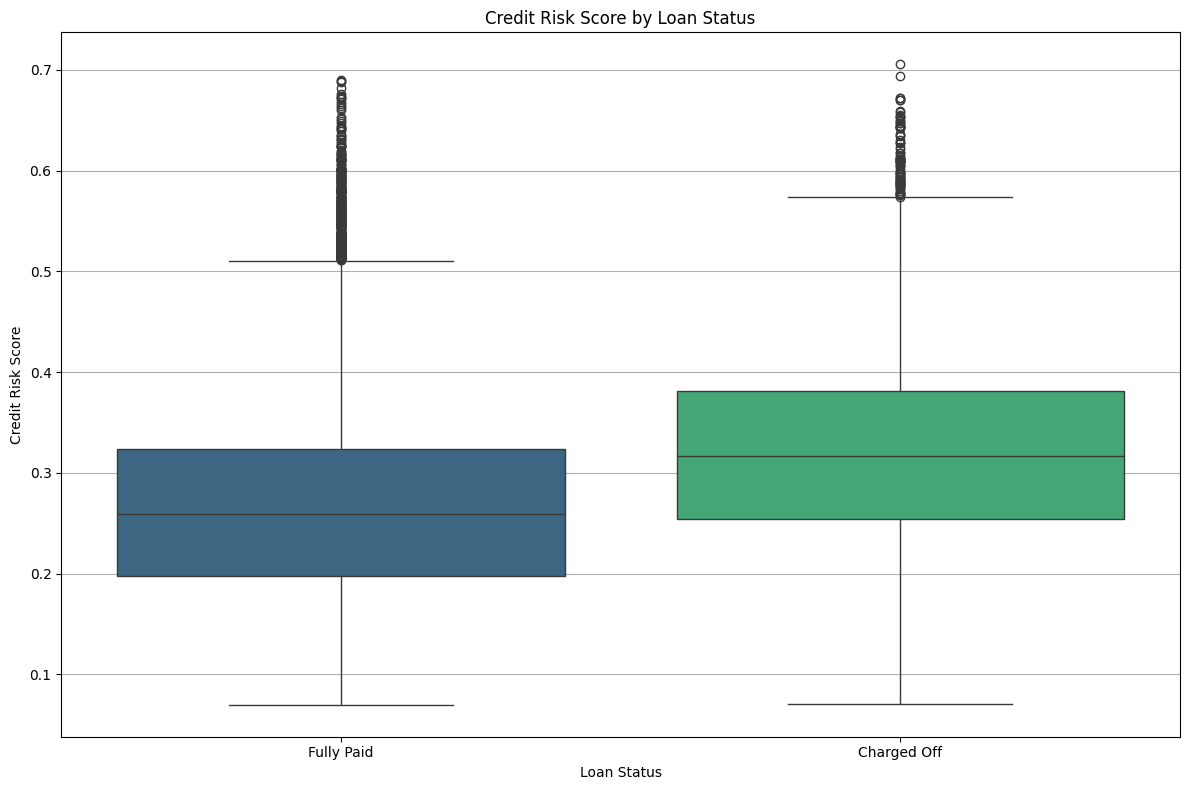

In [206]:
lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_status'] = lendingCaseStudyDataFrameCleanedWithTypesCorrected['loan_status'].astype(str)

# Plotting Credit Risk Score by Loan Status using a Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='loan_status', 
    y='Credit_Risk_Score', 
    data=lendingCaseStudyDataFrameCleanedWithTypesCorrected, 
    order=['Fully Paid', 'Charged Off'],  # Adjust if you have different categories
    palette='viridis'
)
plt.title('Credit Risk Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Risk Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



#### 10.2 RESULTS

1. The median credit risk score for "Charged Off" loans remains distinctly higher than that of "Fully Paid" loans, reinforcing the score’s effectiveness in identifying higher-risk borrowers.
2. The interquartile range (IQR) for "Charged Off" loans still sits above that for "Fully Paid" loans, which is a positive indicator that the score captures the risk gradient effectively.
2. These results indicate that the further fine-tuning of weights has improved the performance of the Credit Risk Score. The adjustments have made the score more effective at distinguishing between borrowers who are likely to pay off their loans versus those who are at higher risk of default.

### 11. Conclusion
#### 11.1. What We Did:
- We used various data points—like loan grades, borrower behavior, and loan purposes—to figure out what makes someone more likely to default on their loan. We built a Credit Risk Score that combines these factors and tells us how risky each loan is.
#### 11.2. Key Findings:
- Loan Grades Matter: Loans with lower grades (D, E, F, G) had a much higher chance of defaulting compared to higher grades (A, B, C).
- High Utilization Rates Are Risky: Borrowers using a lot of their available credit were more likely to default.
- Loan Purpose is Key: Loans for things like Small Business and Renewable Energy showed higher default rates, so they’re riskier.
- Past Behavior Predicts Future Risk: Borrowers with past delinquencies were more likely to default again, which makes sense—past behavior is a strong indicator of future actions.
- Location Matters: Some states like Nevada and Florida showed higher default rates, meaning geographical location plays a role in risk.
#### 11.3 Credit risk score
- We combined all these factors into a Credit Risk Score, fine-tuning the weights of each factor to reflect their impact on default risk.
- The score effectively separated risky loans from safer ones, helping us identify which loans need stricter approval criteria or higher interest rates
#### 11.4 Recommendations:
- Use the Score in Decision-Making: The Credit Risk Score can help the company decide which loans to approve, adjust loan terms, or set interest rates based on risk levels.
- Focus on High-Risk Areas: Be extra cautious with loans for risky purposes or in high-default states.
- Keep Updating the Score: Regularly check and adjust the Credit Risk Score to keep it accurate as market conditions change.